<a href="https://colab.research.google.com/github/gulbudakk/SpotifyDataScience/blob/main/CS210_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#1DB954"> Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System
### <font color='#191414'>**Group Members:**

### <font color= "#ffffff">
* Uğur Sezer Aşıkoğlu
* Melisa Yılmaz
* Kalender Gülbudak
</font> 


---

## <font color="#1DB954">**Introduction**</font> 

In starting of our data analysis we clear our data and show properties of our data then we point out outliers of all features of our data frames then we visualize relationships between features of the songs, how these features change within different eras, and how the genres change in itself with the time. In more detail, we try to analyze the top 10 popular songs and which kind of differences they have, and which kind of features determine the popularity of songs. Then we ask some questions to our data and try to create connections about them such as How songs’ specific features changed during World War 2, is there any difference between songs' release season, and how Indie, synth, Pop, and Classical music change with time?

---


In [ ]:
!pip install reverse_geocoder
!pip install geopy

```
# Installing Required Libraries
```

In [ ]:
from google.colab import drive
from os.path import join
import matplotlib.pyplot as plt

drive.mount('./drive')
path_prefix = "./drive/MyDrive/CS210DataSets"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
from scipy.stats import f_oneway
from scipy import special
import seaborn as sns
from os.path import join
from os import listdir
import math

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

All imports and installations are done

In [ ]:
yearsdf= pd.read_csv(join(path_prefix,"data_by_year.csv")) #Reads the dataframe
data_w_genresdf = pd.read_csv(join(path_prefix, "data_w_genres.csv"))
tracksdf = pd.read_csv(join(path_prefix, "data.csv"))
df_artist = pd.read_csv(join(path_prefix, 'data_by_artist.csv'))

## <font color="#1DB954"> Exploratory Data Analysis

###<font color="orange">Visualisations Descriptive Statistics

In [ ]:
yearsdf.describe() #Helps to see some ome basic statistical details such as mean,std,min,max etc.

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


In [ ]:
data_w_genresdf.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
tracksdf.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df_artist.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
yearsdf.var()

year                8.755000e+02
acousticness        7.347145e-02
danceability        2.456967e-03
duration_ms         8.088630e+08
energy              2.721444e-02
instrumentalness    1.191051e-02
liveness            2.853345e-04
loudness            9.293563e+00
speechiness         1.149330e-02
tempo               3.534021e+01
valence             3.473993e-03
popularity          2.815873e+02
key                 1.238294e+01
mode                0.000000e+00
dtype: float64

In [ ]:
data_w_genresdf.var()

acousticness        1.472089e-01
danceability        3.113292e-02
duration_ms         2.502118e+10
energy              7.150379e-02
instrumentalness    1.118815e-01
liveness            2.303745e-02
loudness            3.100963e+01
speechiness         1.237813e-02
tempo               5.986589e+02
valence             6.108530e-02
popularity          5.299683e+02
key                 1.206627e+01
mode                1.948267e-01
count               2.746580e+03
dtype: float64

In [ ]:
tracksdf.var()

acousticness        1.443512e-01
danceability        3.098489e-02
duration_ms         2.202131e+10
energy              7.435737e-02
explicit            6.349301e-02
instrumentalness    1.119396e-01
key                 1.237838e+01
liveness            3.257762e-02
loudness            3.239421e+01
mode                2.090420e-01
popularity          4.784167e+02
speechiness         3.321877e-02
tempo               9.153153e+02
valence             6.994798e-02
year                7.240378e+02
dtype: float64

In [ ]:
df_artist.var()

acousticness        1.472089e-01
danceability        3.113292e-02
duration_ms         2.502118e+10
energy              7.150379e-02
instrumentalness    1.118815e-01
liveness            2.303745e-02
loudness            3.100963e+01
speechiness         1.237813e-02
tempo               5.986589e+02
valence             6.108530e-02
popularity          5.299683e+02
key                 1.206627e+01
mode                1.948267e-01
count               2.746580e+03
dtype: float64

In [ ]:
yearsdf.median()

year                  1970.500000
acousticness             0.458340
danceability             0.541315
duration_ms         238300.393513
energy                   0.494563
instrumentalness         0.182022
liveness                 0.212563
loudness               -11.849556
speechiness              0.084892
tempo                  117.813859
valence                  0.541784
popularity              29.160167
key                      2.000000
mode                     1.000000
dtype: float64

In [ ]:
data_w_genresdf.median()

acousticness             0.391833
danceability             0.563000
duration_ms         221507.000000
energy                   0.537375
instrumentalness         0.009550
liveness                 0.162000
loudness                -9.887000
speechiness              0.052822
tempo                  118.779000
valence                  0.506000
popularity              22.666667
key                      6.000000
mode                     1.000000
count                    2.000000
dtype: float64

In [ ]:
tracksdf.median()

acousticness             0.517000
danceability             0.548000
duration_ms         205787.000000
energy                   0.465000
explicit                 0.000000
instrumentalness         0.000524
key                      5.000000
liveness                 0.138000
loudness               -10.836000
mode                     1.000000
popularity              25.000000
speechiness              0.045500
tempo                  115.816000
valence                  0.536000
year                  1977.000000
dtype: float64

In [ ]:
df_artist.median()

acousticness             0.391833
danceability             0.563000
duration_ms         221507.000000
energy                   0.537375
instrumentalness         0.009550
liveness                 0.162000
loudness                -9.887000
speechiness              0.052822
tempo                  118.779000
valence                  0.506000
popularity              22.666667
key                      6.000000
mode                     1.000000
count                    2.000000
dtype: float64

In [ ]:
yearsdf.skew(axis=0, skipna=True)

year                0.000000
acousticness        0.222297
danceability       -0.079621
duration_ms        -0.748601
energy             -0.087357
instrumentalness    1.047944
liveness            0.101369
loudness           -0.234616
speechiness         2.956450
tempo              -0.482199
valence            -0.284401
popularity         -0.186909
key                 0.160465
mode                0.000000
dtype: float64

In [ ]:
data_w_genresdf.skew(axis=0, skipna=True)

acousticness         0.164301
danceability        -0.303032
duration_ms         11.150819
energy              -0.077407
instrumentalness     1.096529
liveness             2.045651
loudness            -1.270287
speechiness          4.142616
tempo                0.208782
valence             -0.050987
popularity           0.399265
key                 -0.071397
mode                -1.064438
count               22.855983
dtype: float64

In [ ]:
tracksdf.skew(axis=0, skipna=True)

acousticness        -0.034518
danceability        -0.236234
duration_ms         10.159384
energy               0.144279
explicit             3.427836
instrumentalness     1.363704
key                  0.003932
liveness             2.078374
loudness            -0.989120
mode                -0.885307
popularity           0.362937
speechiness          3.750971
tempo                0.423394
valence             -0.100729
year                -0.080966
dtype: float64

In [ ]:
df_artist.skew(axis=0, skipna=True)

acousticness         0.164301
danceability        -0.303032
duration_ms         11.150819
energy              -0.077407
instrumentalness     1.096529
liveness             2.045651
loudness            -1.270287
speechiness          4.142616
tempo                0.208782
valence             -0.050987
popularity           0.399265
key                 -0.071397
mode                -1.064438
count               22.855983
dtype: float64

In [ ]:
stats.describe(df_artist["popularity"][1:])

DescribeResult(nobs=32538, minmax=(0.0, 94.0), mean=24.473029904514792, variance=529.9788105082107, skewness=0.39929541770362814, kurtosis=-1.1647127552825645)

In [ ]:
yearsdf.shape #Shape is a helpfull pandas library to conceptualize data

(102, 14)

In [ ]:
data_w_genresdf.shape

(32539, 16)

In [ ]:
tracksdf.shape

(174389, 19)

In [ ]:
df_artist.shape

(32539, 15)

In [ ]:
yearsdf.dtypes #dtypes helps to show data types of attributes 

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
data_w_genresdf.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [ ]:
tracksdf.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
df_artist.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object

Its important to check data types to confirm that they are storing correct types for instance if we hold string for duration_ms that would be wrong. In our case all data types are correct

In [ ]:
yearsdf.head() # returns the top 5 rows of the dataframe

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [ ]:
data_w_genresdf.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [ ]:
tracksdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7


Purpose of this table is to show distribution of data frame for different features in a lower scale.

In [ ]:
yearsdf.tail(5) # returns the bottom 5 rows of the dataframe

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1
101,2021,0.340253,0.652488,222760.028261,0.578896,0.356765,0.162309,-9.547752,0.108559,120.525875,0.451908,7.750543,7,1


In [ ]:
data_w_genresdf.tail()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
32534,김효근,0.939,0.1740,341821.0,0.3210,0.756000,0.6950,-13.4110,0.0422,138.300,0.0554,0.0,3,1,1,[]
32535,나율,0.717,0.5915,241281.5,0.4735,0.000000,0.1050,-6.5885,0.0537,107.599,0.5075,16.0,1,1,4,[]
32536,미스티,0.416,0.6860,216715.0,0.8220,0.000000,0.1100,-6.3000,0.0802,122.047,0.6250,0.0,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288,0.7390,242480.0,0.4750,0.000000,0.0757,-8.9200,0.3790,81.490,0.8000,8.0,2,0,2,[]
32538,조정현,0.568,0.4470,237688.0,0.2150,0.000001,0.0649,-16.4780,0.0272,71.979,0.1770,30.0,10,1,2,['classic korean pop']


In [ ]:
tracksdf.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
df_artist.tail()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
32534,김효근,0.939,0.1740,341821.0,0.3210,0.756000,0.6950,-13.4110,0.0422,138.300,0.0554,0.0,3,1,1
32535,나율,0.717,0.5915,241281.5,0.4735,0.000000,0.1050,-6.5885,0.0537,107.599,0.5075,16.0,1,1,4
32536,미스티,0.416,0.6860,216715.0,0.8220,0.000000,0.1100,-6.3000,0.0802,122.047,0.6250,0.0,5,0,2
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288,0.7390,242480.0,0.4750,0.000000,0.0757,-8.9200,0.3790,81.490,0.8000,8.0,2,0,2
32538,조정현,0.568,0.4470,237688.0,0.2150,0.000001,0.0649,-16.4780,0.0272,71.979,0.1770,30.0,10,1,2


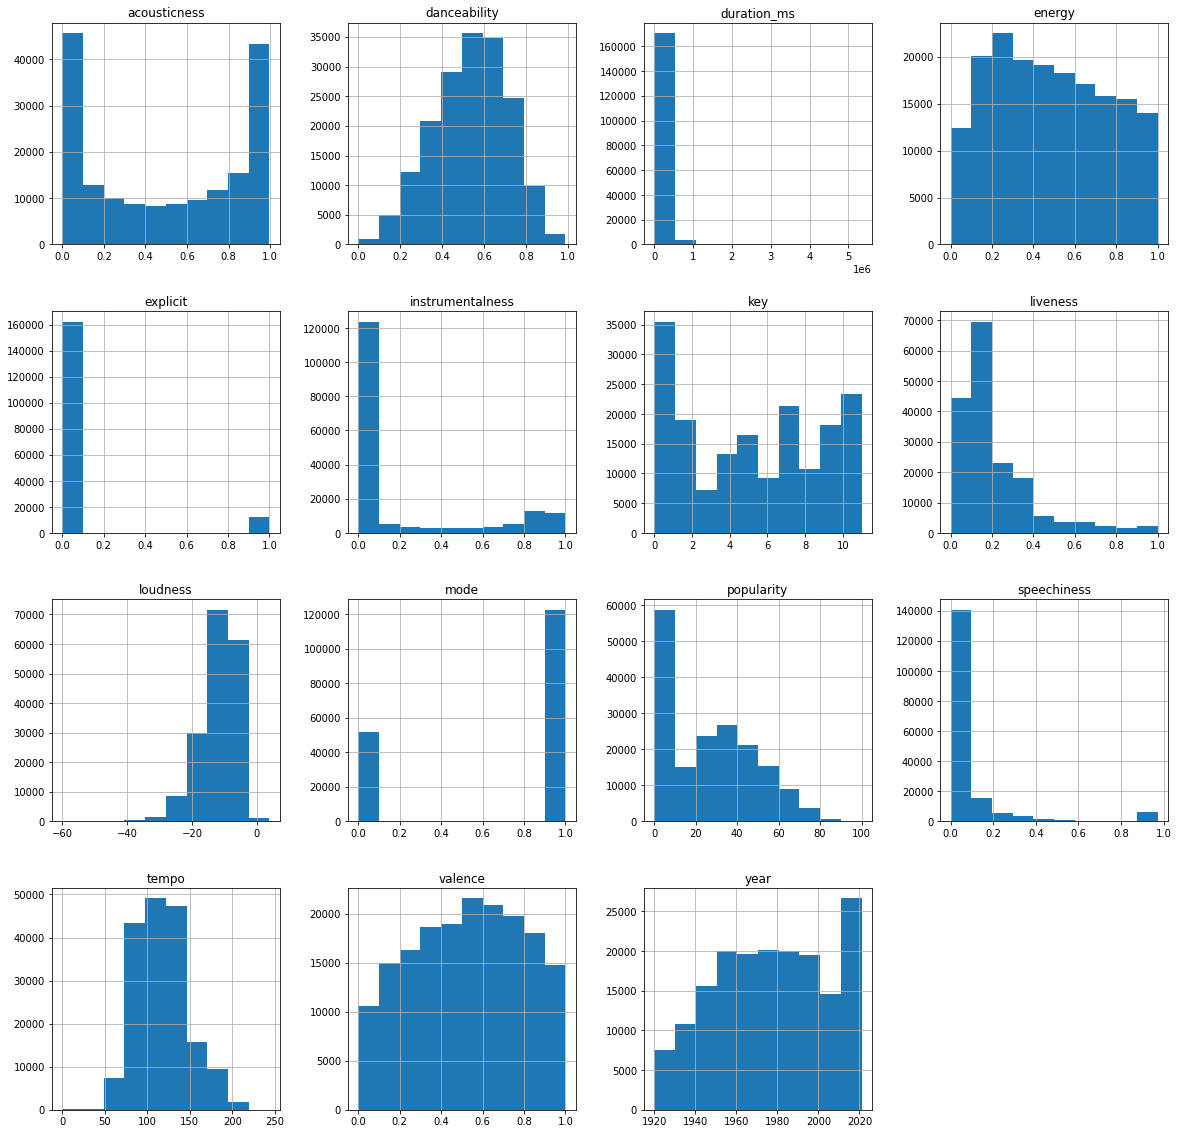

In [ ]:
tracksdf.hist(figsize=(20, 20))
plt.show()

We tried to show the visualization of the whole data to understand the distribution of the features of the data and to clarify which kind of questions could we asked under that distributions.


#### <font color='#92A8D1'>**Cleaning Data**</font> 

In [ ]:
yearsdf.isna().sum() / yearsdf.shape[0] #showing nan distribution in data

year                0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
dtype: float64

In [ ]:
data_w_genresdf.isna().sum() / data_w_genresdf.shape[0]

artists             0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
count               0.0
genres              0.0
dtype: float64

In [ ]:
tracksdf.isna().sum() / tracksdf.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64

In [ ]:
df_artist.isna().sum() / df_artist.shape[0]

artists             0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
count               0.0
dtype: float64

There exists none nan distribution in our data.

In [ ]:
yearsdf = yearsdf.drop_duplicates() #we are deleting duplicate if there exist for data cleaning
yearsdf.count()

year                102
acousticness        102
danceability        102
duration_ms         102
energy              102
instrumentalness    102
liveness            102
loudness            102
speechiness         102
tempo               102
valence             102
popularity          102
key                 102
mode                102
dtype: int64

In [ ]:
data_w_genresdf = data_w_genresdf.drop_duplicates() 
data_w_genresdf.count()

artists             32539
acousticness        32539
danceability        32539
duration_ms         32539
energy              32539
instrumentalness    32539
liveness            32539
loudness            32539
speechiness         32539
tempo               32539
valence             32539
popularity          32539
key                 32539
mode                32539
count               32539
genres              32539
dtype: int64

In [ ]:
tracksdf = tracksdf.drop_duplicates() 
tracksdf.count()

acousticness        172230
artists             172230
danceability        172230
duration_ms         172230
energy              172230
explicit            172230
id                  172230
instrumentalness    172230
key                 172230
liveness            172230
loudness            172230
mode                172230
name                172230
popularity          172230
release_date        172230
speechiness         172230
tempo               172230
valence             172230
year                172230
dtype: int64

In [ ]:
df_artist = df_artist.drop_duplicates() 
df_artist.count()

artists             32539
acousticness        32539
danceability        32539
duration_ms         32539
energy              32539
instrumentalness    32539
liveness            32539
loudness            32539
speechiness         32539
tempo               32539
valence             32539
popularity          32539
key                 32539
mode                32539
count               32539
dtype: int64

Our data was clean, there exist no duplicates.

In [ ]:
print(yearsdf.isnull().sum()) #checking if there any null data

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64


In [ ]:
print(data_w_genresdf.isnull().sum())

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64


In [ ]:
print(tracksdf.isnull().sum())

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [ ]:
print(df_artist.isnull().sum())

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64


In [ ]:
yearsdf = yearsdf.dropna() #Cleaning null data
yearsdf.count()

year                102
acousticness        102
danceability        102
duration_ms         102
energy              102
instrumentalness    102
liveness            102
loudness            102
speechiness         102
tempo               102
valence             102
popularity          102
key                 102
mode                102
dtype: int64

In [ ]:
data_w_genresdf = data_w_genresdf.dropna() 
data_w_genresdf.count()

artists             32539
acousticness        32539
danceability        32539
duration_ms         32539
energy              32539
instrumentalness    32539
liveness            32539
loudness            32539
speechiness         32539
tempo               32539
valence             32539
popularity          32539
key                 32539
mode                32539
count               32539
genres              32539
dtype: int64

In [ ]:
tracksdf = tracksdf.dropna()
tracksdf.count()

acousticness        172230
artists             172230
danceability        172230
duration_ms         172230
energy              172230
explicit            172230
id                  172230
instrumentalness    172230
key                 172230
liveness            172230
loudness            172230
mode                172230
name                172230
popularity          172230
release_date        172230
speechiness         172230
tempo               172230
valence             172230
year                172230
dtype: int64

In [ ]:
df_artist= df_artist.dropna() 
df_artist.count()

artists             32539
acousticness        32539
danceability        32539
duration_ms         32539
energy              32539
instrumentalness    32539
liveness            32539
loudness            32539
speechiness         32539
tempo               32539
valence             32539
popularity          32539
key                 32539
mode                32539
count               32539
dtype: int64

In [ ]:
dropName = df_artist[df_artist['artists'].apply(lambda x: '$' in x)].index
df_artist.drop(dropName, inplace=True)

There exist no null data in our set.

In [ ]:
data_w_genresdf = data_w_genresdf.drop(labels=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key', 'mode', 'count'], axis = 1)
#reduced data_w_genres data frame to only artists and genres
data_w_genresdf = data_w_genresdf.loc[data_w_genresdf['genres'].str.len() != 2] #cleared out the empty genre lists
data_w_genresdf.head()

,artists,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
8,"""Weird Al"" Yankovic","['comedy rock', 'comic', 'parody']"
10,$NOT,"['florida rap', 'underground hip hop', 'vapor ..."
11,$atori Zoom,"['dark trap', 'meme rap']"
13,$uicideBoy$,"['dark trap', 'new orleans rap', 'underground ..."


In [ ]:
tracksdf = tracksdf.loc[tracksdf['release_date'].str.len() != 4] #cleared out the date datas which does not contain ant date and month info but only year
tracksdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.238,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.753,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920



#### <font color='#92A8D1'>**Checking for outlier values**</font> 

 We use the box plot method for visualization and the detection of outliers.

#####<font color='#B565A7'> "Data by Years" Data Frame

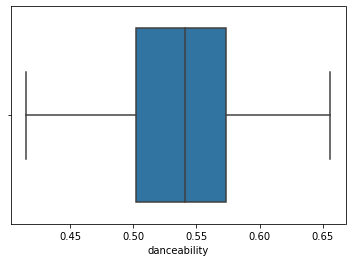

In [ ]:
sns.boxplot(x=yearsdf["danceability"]) #with drawing boxplot we are trying to identify outliers

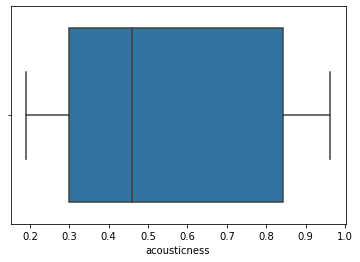

In [ ]:
sns.boxplot(x=yearsdf["acousticness"])

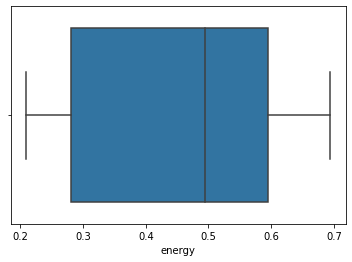

In [ ]:
sns.boxplot(x=yearsdf["energy"])

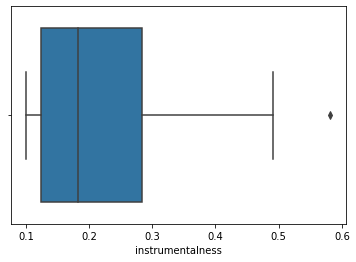

In [ ]:
sns.boxplot(x=yearsdf["instrumentalness"])

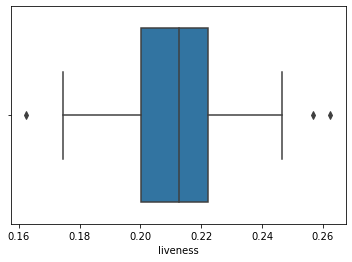

In [ ]:
sns.boxplot(x=yearsdf["liveness"])

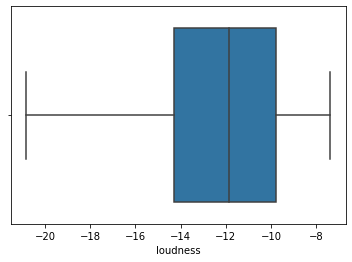

In [ ]:
sns.boxplot(x=yearsdf["loudness"])

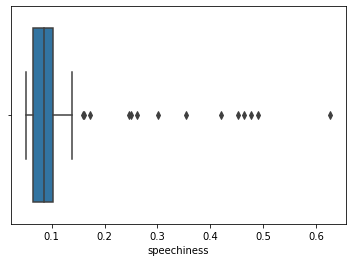

In [ ]:
sns.boxplot(x=yearsdf["speechiness"])

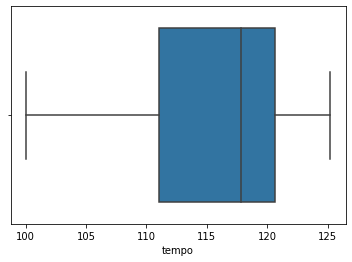

In [ ]:
sns.boxplot(x=yearsdf["tempo"])

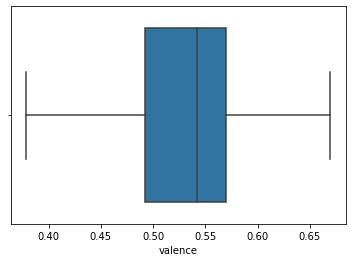

In [ ]:
sns.boxplot(x=yearsdf["valence"])

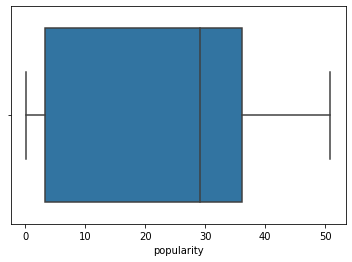

In [ ]:
sns.boxplot(x=yearsdf["popularity"])

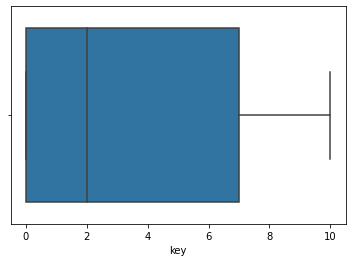

In [ ]:
sns.boxplot(x=yearsdf["key"])

There exist outliers in instrumentalness(1), liveness(2), speechiness(13) rest of the data are consist of accurate and consistent values in data_by_years data frame.

#####<font color='#B565A7'> "Data" Data Frame

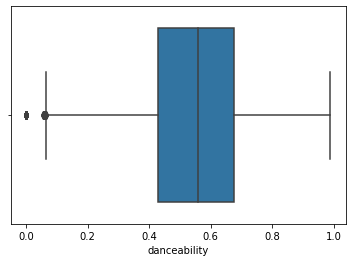

In [ ]:
sns.boxplot(x=tracksdf["danceability"])

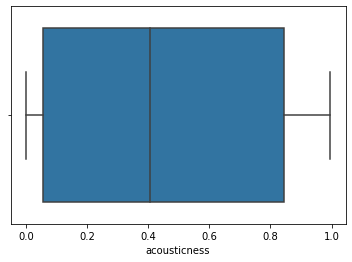

In [ ]:
sns.boxplot(x=tracksdf["acousticness"])

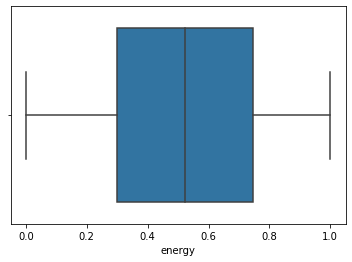

In [ ]:
sns.boxplot(x=tracksdf["energy"])

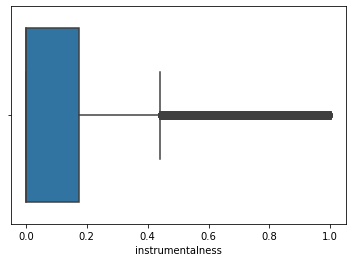

In [ ]:
sns.boxplot(x=tracksdf["instrumentalness"])

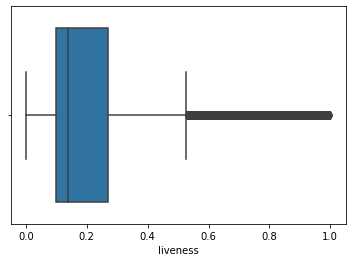

In [ ]:
sns.boxplot(x=tracksdf["liveness"])

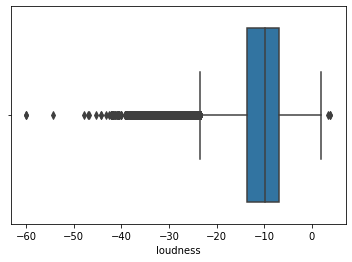

In [ ]:
sns.boxplot(x=tracksdf["loudness"])

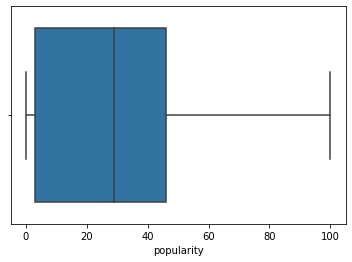

In [ ]:
sns.boxplot(x=tracksdf["popularity"])

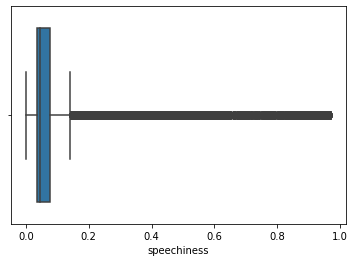

In [ ]:
sns.boxplot(x=tracksdf["speechiness"])

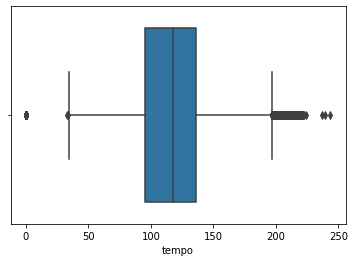

In [ ]:
sns.boxplot(x=tracksdf["tempo"])

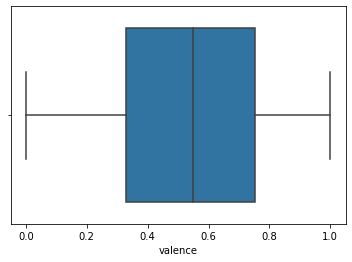

In [ ]:
sns.boxplot(x=tracksdf["valence"])

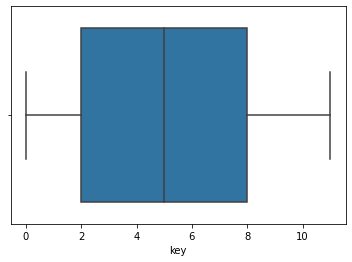

In [ ]:
sns.boxplot(x=tracksdf["key"])

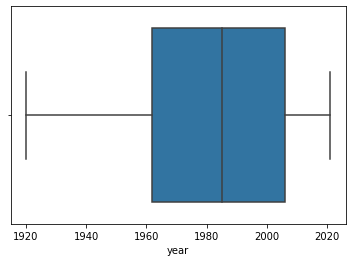

In [ ]:
sns.boxplot(x=tracksdf["year"])

There exist outliers in danceability(1), instrumentalness(4), liveness(5), loudness6, speechiness(8) and tempo(9). Rest of the data are consist of accurate and consistent values in data_by_years data frame.

###<font color="orange">Visualisations of Aggregated Forms Based on Features

In [ ]:
tracksdf['artists'] = tracksdf['artists'].str.slice(start = 2)
tracksdf['artists'] = tracksdf['artists'].str.slice(stop = -2)
tracksdf = pd.merge(tracksdf, data_w_genresdf, on='artists')
tracksdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.0264,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,"['blues', 'traditional blues']"
1,0.583000,Screamin' Jay Hawkins,0.744,144360,0.434,0,1YwoYPfhuZlLDbJUH1cKSi,0.0151,5,0.0715,-10.807,0,I Put a Spell on You,44,1999-10-08,0.0845,173.871,0.9390,1999,"['blues', 'traditional blues']"
2,0.639000,Screamin' Jay Hawkins,0.717,145867,0.442,0,7rCchsJktyFH0MB5SIpnbN,0.0233,5,0.1060,-11.594,0,I Put a Spell On You,38,1991-08-13,0.0715,174.060,0.9440,1991,"['blues', 'traditional blues']"
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.8010,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,['circuit']
4,0.000012,Oscar Velazquez,0.568,386287,0.729,0,0TIfXVGqyiOTuWkuxEzQzc,0.9120,2,0.0613,-8.293,1,True House Music - Original Massive Mix,3,1920-01-01,0.0312,129.987,0.1750,1920,['circuit']


>Merged "tracks" dataframe and genres together on artist column, to get the genres of each tracks.

#### <font color='#92A8D1'> **How songs' energy, liveness, and danceability changed during World War 2?** 


>For this purpose we need to restrict our data year information then check correlation with rates.

In [ ]:
df = yearsdf[(yearsdf["year"] >=1939) & (yearsdf["year"] <= 1945)]

We would like to check the transformation of songs during the World War 2 era. For this purpose, this is the table for that period and shows average values of different features of songs.

##### <font color='#00cc00'> **Danceability of songs change with time during WW2 (1939-1945)**

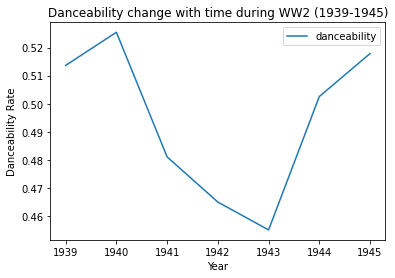

In [ ]:
ax = df[(df["year"] >=1939) & (df["year"] <= 1945)].plot(x="year", y="danceability")  # s-> marker size
ax.set_xlabel("Year")
ax.set_ylabel("Danceability Rate")
ax.set_title("Danceability change with time during WW2 (1939-1945)")
plt.show()


This is the scatter plot graph of danceability rate change with time as we can see there exist no certain relation.

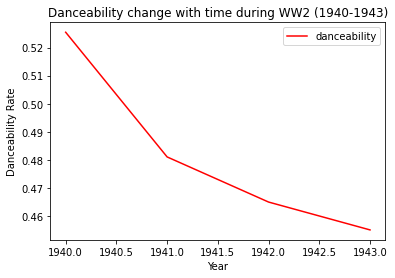

In [ ]:
ax1 = df[(df["year"] >=1940) & (df["year"] <= 1943)].plot(x="year", y="danceability", color='red')  # s-> marker size
ax1.set_title("Danceability change with time during WW2 (1940-1943)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Danceability Rate")
plt.show()

If we limit our range between 1940 and 1943 there exists a negative correlation so during intense times of WW2 songs' dance abilities are decreased and this may reflect that happiness decreased during those times.

##### <font color='#92A8D1'> **Energy of songs change with time during WW2 (1939-1945)** 

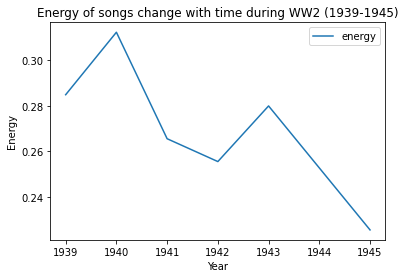

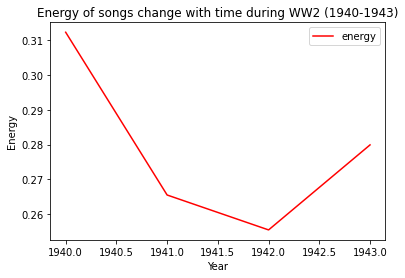

In [ ]:
ax = df[(df["year"] >=1939) & (df["year"] <= 1945)].plot(x="year", y="energy")  # s-> marker size
ax.set_xlabel("Year")
ax.set_ylabel("Energy")
ax.set_title("Energy of songs change with time during WW2 (1939-1945)")
plt.show()

ax1 = df[(df["year"] >=1940) & (df["year"] <= 1943)].plot(x="year", y="energy", color='red')  # s-> marker size
ax1.set_title("Energy of songs change with time during WW2 (1940-1943)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy")
plt.show()

For energy of the songs duringn WW2 we have a similar condition with danceability but in this example we have gradual transition and if we restrict our scale especially between 1940-1942 there exist huge fall and negative correlation.

##### <font color='#92A8D1'> **Liveness of songs change with time during WW2 (1939-1945)** 

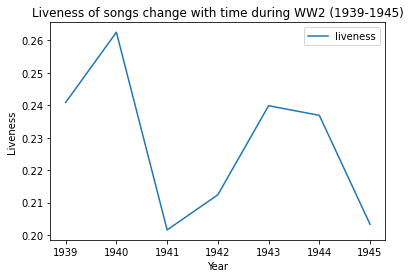

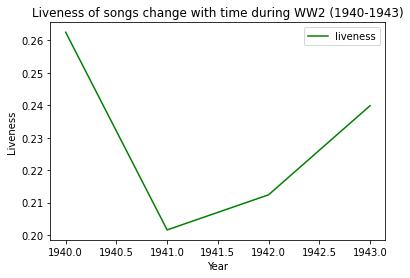

In [ ]:
ax = df[(df["year"] >=1939) & (df["year"] <= 1945)].plot(x="year", y="liveness")  # s-> marker size
ax.set_xlabel("Year")
ax.set_ylabel("Liveness")
ax.set_title("Liveness of songs change with time during WW2 (1939-1945)")
plt.show()

ax1 = df[(df["year"] >=1940) & (df["year"] <= 1943)].plot(x="year", y="liveness", color='green')  # s-> marker size
ax1.set_title("Liveness of songs change with time during WW2 (1940-1943)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Liveness")
plt.show()


For liveness similar to danceability and energy rates, it points out a sharp fall. If we further interpret these data with U.S.A entrance to WW2 there exists a huge fall. Towards the ending rates a bit increases.

#### <font color='#92A8D1'>Are there any differences between the features of the pop songs which are released in summer and released in fall?

In [ ]:
summerdf1 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "06"]
summerdf2 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "07"]
summerdf3 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "08"]
summerdfList = [summerdf1, summerdf2, summerdf3]
summerdf = pd.concat(summerdfList)
summerdf = summerdf[summerdf['genres'].apply(lambda x: 'pop' in x)]
summerdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
4235,0.994,Shamshad Begum,0.484,288747,0.2620,0,0tRvY9pltK0cDNQr4TtwMa,0.845000,0,0.150,-12.783,0,Dil Toot Gaya Ji,0,1948-06-08,0.0312,85.470,0.400,1948,"['classic bollywood', 'classic pakistani pop',..."
4310,0.984,Shamshad Begum,0.462,205000,0.5300,0,3OG3dR7ED5hQvJNu5ESZQl,0.959000,8,0.207,-7.203,1,Kahe Koyal Shor Machaye Re,3,1948-06-08,0.0460,180.356,0.851,1948,"['classic bollywood', 'classic pakistani pop',..."
4366,0.988,Shamshad Begum,0.387,233848,0.2860,0,5wkP7MWqUIM47fhtvcy8QY,0.857000,9,0.303,-11.996,1,Na Aankhon Mein Ansoo,0,1948-06-08,0.0500,104.497,0.251,1948,"['classic bollywood', 'classic pakistani pop',..."
4797,0.765,Asha Bhosle,0.491,156000,0.5480,0,2P7oyMgABQnLs7X5OLPe8X,0.335000,2,0.629,-8.241,0,"Dum Maro Dum, Pt. 1",36,1971-06-04,0.0504,127.566,0.445,1971,"['chutney', 'classic bollywood', 'desi pop', '..."
5014,0.982,Luciano Tajoli,0.325,216503,0.0566,0,0KAteU302MDRsHJhmFIxOK,0.000339,8,0.423,-15.801,1,Buongiorno tristezza,0,1940-06-29,0.0675,68.603,0.215,1940,"['canzone napoletana', 'classic italian folk p..."


In [ ]:
falldf1 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "09"]
falldf2 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "10"]
falldf3 = tracksdf.loc[tracksdf['release_date'].str[5: 7] == "11"]
falldfList = [falldf1, falldf2, falldf3]
falldf = pd.concat(falldfList)
falldf = falldf[falldf['genres'].apply(lambda x: 'pop' in x)]
falldf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
1590,0.148,THE GUY,0.604,204957,0.418,1,0QQmUf4aPFaN9U2yRko595,0.0382,4,0.1020,-11.566,0,When We Die,0,1921-09-11,0.0417,80.073,0.0778,1921,"['bow pop', 'classify']"
1591,0.185,THE GUY,0.577,404062,0.422,1,1T2NGVgAoXjQPEjxTGFRZV,0.0349,1,0.1780,-11.108,1,Love for Guns,0,1921-09-11,0.0575,79.997,0.5440,1921,"['bow pop', 'classify']"
1592,0.588,THE GUY,0.341,323840,0.256,1,3YVy92W44JmU6KeF6UMldm,0.1570,9,0.1050,-16.012,1,Tigers,0,1921-09-11,0.0461,121.051,0.0779,1921,"['bow pop', 'classify']"
1593,0.447,THE GUY,0.708,279171,0.544,1,4SU8RBlxrOtlHjkUxkpDCY,0.0375,0,0.0733,-8.124,1,Don't Run,0,1921-09-11,0.0316,120.000,0.4060,1921,"['bow pop', 'classify']"
1594,0.104,THE GUY,0.605,133669,0.329,1,4rkLztWpftdp6wJXtwmNWP,0.0923,11,0.3340,-11.636,0,I Don't Need You,0,1921-09-11,0.0354,79.934,0.2720,1921,"['bow pop', 'classify']"


>Reduced the tracks dataframe into only pop genres and summer and fall months seperately.

In [ ]:
sumAcoMean = summerdf['acousticness'].mean()
sumDanceMean = summerdf['danceability'].mean()
sumDurMean = summerdf['duration_ms'].mean()
sumEnergyMean = summerdf['energy'].mean()
sumExpOccMean = len(summerdf[summerdf['explicit'] == 1])/len(summerdf)
sumInstMean = summerdf['instrumentalness'].mean()
sumLivMean = summerdf['liveness'].mean()
sumLoudMean = summerdf['loudness'].mean()
sumMajOccMean = len(summerdf[summerdf['mode'] == 1])/len(summerdf)
sumPopMean = summerdf['popularity'].mean()
sumSpeechMean = summerdf['speechiness'].mean()
sumTempoMean = summerdf['tempo'].mean()
sumValMean = summerdf['valence'].mean()

fallAcoMean = falldf['acousticness'].mean()
fallDanceMean = falldf['danceability'].mean()
fallDurMean = falldf['duration_ms'].mean()
fallEnergyMean = falldf['energy'].mean()
fallExpOccMean = len(falldf[falldf['explicit'] == 1])/len(falldf)
fallInstMean = falldf['instrumentalness'].mean()
fallLivMean = falldf['liveness'].mean()
fallLoudMean = falldf['loudness'].mean()
fallMajOccMean = len(falldf[falldf['mode'] == 1])/len(falldf)
fallPopMean = falldf['popularity'].mean()
fallSpeechMean = falldf['speechiness'].mean()
fallTempoMean = falldf['tempo'].mean()
fallValMean = falldf['valence'].mean()

>Found the means of all features in summer months and fall months seperately.

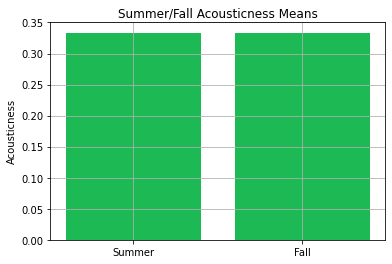

In [ ]:
axAcousticness =  plt.bar(["Summer", "Fall"], [sumAcoMean, fallAcoMean], color = '#1DB954')
plt.title("Summer/Fall Acousticness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Acousticness")
plt.grid()

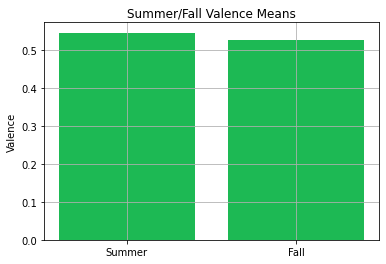

In [ ]:
axVal = plt.bar(["Summer", "Fall"], [sumValMean, fallValMean], color = '#1DB954')
plt.title("Summer/Fall Valence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Valence")
plt.grid()

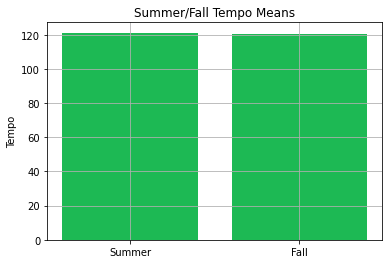

In [ ]:
axTempo = plt.bar(["Summer", "Fall"], [sumTempoMean, fallTempoMean], color = '#1DB954')
plt.title("Summer/Fall Tempo Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Tempo")
plt.grid()

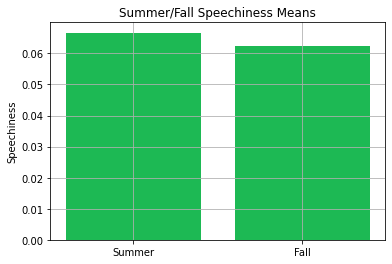

In [ ]:
axSpeech= plt.bar(["Summer", "Fall"], [sumSpeechMean, fallSpeechMean], color = '#1DB954')
plt.title("Summer/Fall Speechiness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Speechiness")
plt.grid()

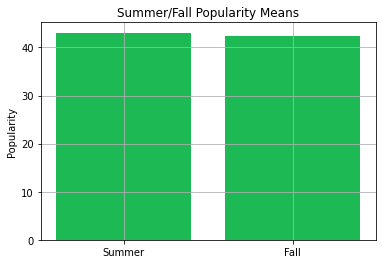

In [ ]:
axPop = plt.bar(["Summer", "Fall"], [sumPopMean, fallPopMean], color = '#1DB954')
plt.title("Summer/Fall Popularity Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Popularity")
plt.grid()

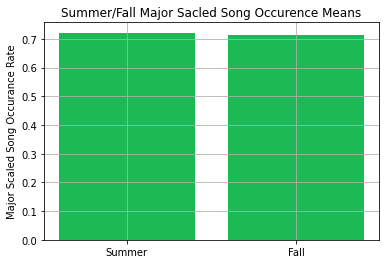

In [ ]:
axMajOcc = plt.bar(["Summer", "Fall"], [sumMajOccMean, fallMajOccMean], color = '#1DB954')
plt.title("Summer/Fall Major Sacled Song Occurence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Major Scaled Song Occurance Rate")
plt.grid()

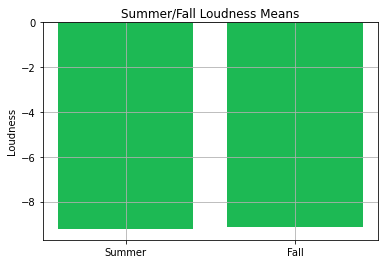

In [ ]:
axLoud = plt.bar(["Summer", "Fall"], [sumLoudMean, fallLoudMean], color = '#1DB954')
plt.title("Summer/Fall Loudness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Loudness")
plt.grid()

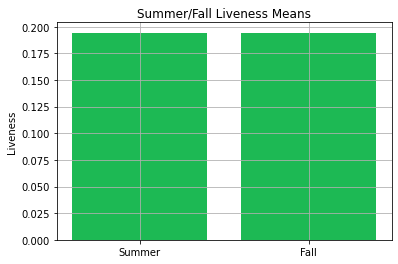

In [ ]:
axLiv = plt.bar(["Summer", "Fall"], [sumLivMean, fallLivMean], color = '#1DB954')
plt.title("Summer/Fall Liveness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Liveness")
plt.grid()

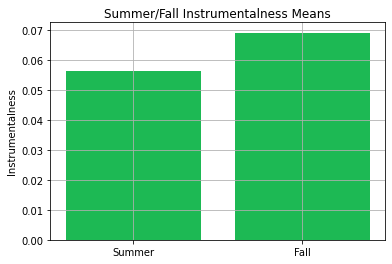

In [ ]:
axInst = plt.bar(["Summer", "Fall"], [sumInstMean, fallInstMean], color = '#1DB954')
plt.title("Summer/Fall Instrumentalness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Instrumentalness")
plt.grid()

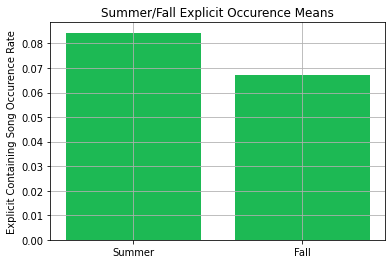

In [ ]:
axExpOcc = plt.bar(["Summer", "Fall"], [sumExpOccMean, fallExpOccMean], color = '#1DB954')
plt.title("Summer/Fall Explicit Occurence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Explicit Containing Song Occurence Rate")
plt.grid()

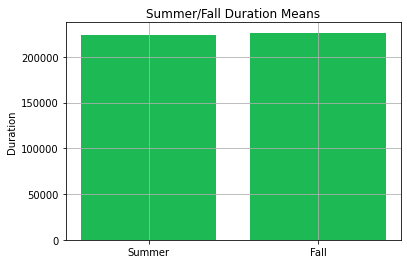

In [ ]:
axDurr = plt.bar(["Summer", "Fall"], [sumDurMean, fallDurMean], color = '#1DB954')
plt.title("Summer/Fall Duration Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Duration")
plt.grid()

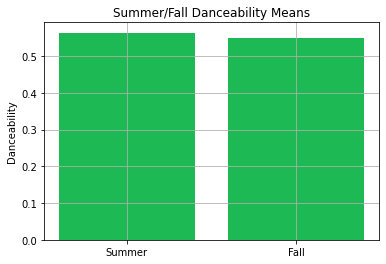

In [ ]:
axDance = plt.bar(["Summer", "Fall"], [sumDanceMean, fallDanceMean], color = '#1DB954')
plt.title("Summer/Fall Danceability Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Danceability")
plt.grid()

When I asked this question, I actually expected that, the average danceability, liveness, and occurences of songs which start with a major chord progression will be higher in summer pop songs. Apparently, only the diference between the average speechness, instrumentalness, and the number of songs which includes explicit content, actually visible. However, even though the numbers are so close, the 0.02 difference between summer and fall danceability is actually strange since, all of the songs are in the same genre.

###<font color="orange">Analysis of the Most Popular Artists and Songs

In [ ]:
most_populars= df_artist.sort_values("popularity", ascending=False).head(10)
most_populars


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4212,CJ,0.1900,0.711,123429.0,0.5980,0.000000,0.1500,-7.621,0.1820,140.175,0.7370,94.0,3,0,2
3767,Boza,0.3620,0.725,186133.0,0.7560,0.000685,0.1030,-5.013,0.0572,100.070,0.8280,92.0,4,1,2
14688,Juhn,0.1220,0.713,232853.0,0.6170,0.000000,0.0962,-4.637,0.0887,168.021,0.6820,91.0,8,1,2
13963,Joel Corry,0.1680,0.734,166028.0,0.8740,0.000011,0.0489,-3.158,0.0662,122.953,0.9050,91.0,8,1,1
17173,Los Legendarios,0.3100,0.823,213314.0,0.8210,0.000004,0.1430,-3.402,0.1660,99.999,0.7910,89.0,8,0,2
16413,Lele Pons,0.0907,0.905,155825.0,0.6860,0.000000,0.2660,-3.152,0.0664,103.013,0.9630,89.0,0,1,1
23922,Ritt Momney,0.0563,0.399,210463.0,0.4910,0.000890,0.1100,-10.778,0.0538,91.066,0.1510,89.0,6,0,2
14918,KIDDO,0.2860,0.504,190218.0,0.7600,0.000000,0.1510,-4.246,0.0426,183.933,0.6400,87.0,4,1,2
27057,Surf Mesa,0.0686,0.674,176547.0,0.7740,0.001880,0.3930,-7.567,0.0892,112.050,0.3300,86.0,11,0,1
6259,DJ Nelson,0.1865,0.843,300801.5,0.6755,0.000458,0.1195,-5.074,0.1161,90.010,0.7205,86.0,11,1,2


In [ ]:
mid = df_artist.sort_values("popularity", ascending=False).iloc[16254:16264]
mid

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
31151,Wilfrid Hyde-White,0.798667,0.542667,187248.666667,0.343333,0.000000,0.253633,-14.148000,0.254733,109.937667,0.677667,22.666667,5,1,3
11489,Hank Mobley,0.745312,0.545292,437243.833333,0.399050,0.072356,0.169833,-12.392437,0.055369,120.908208,0.630417,22.645833,5,1,48
13825,Jo Stafford,0.932455,0.491091,180720.000000,0.142745,0.012556,0.161045,-15.070000,0.038727,100.906455,0.418364,22.636364,4,1,11
13025,James Dymond,0.001471,0.458545,177990.636364,0.941818,0.606604,0.370000,-7.775909,0.094218,137.976909,0.333509,22.636364,11,0,11
28116,The Dave Clark Five,0.257244,0.513615,139013.192308,0.619423,0.000010,0.182585,-9.089000,0.055785,131.594385,0.708769,22.615385,7,1,52
2931,Bert & Ernie,0.392600,0.565800,203059.400000,0.304400,0.000000,0.251760,-13.127800,0.382400,93.783800,0.415200,22.600000,10,1,5
4638,Cassandra Grey,0.002159,0.581600,137419.600000,0.847200,0.282580,0.373600,-7.742200,0.055200,130.217000,0.418800,22.600000,5,1,10
16529,Leoš Janáček,0.962600,0.249000,185418.000000,0.181260,0.539270,0.266320,-18.712400,0.048880,77.279200,0.133500,22.600000,8,0,5
26708,Steve Harley,0.137944,0.577500,254199.916667,0.592233,0.000821,0.176717,-10.678500,0.037608,119.435333,0.587750,22.583333,0,1,12
14224,Johnny Burnette & The Rock 'N' Roll Trio,0.731333,0.658583,137560.083333,0.618083,0.000341,0.160600,-8.780000,0.044608,112.288917,0.871500,22.583333,9,1,24


(0.0, 100.0)

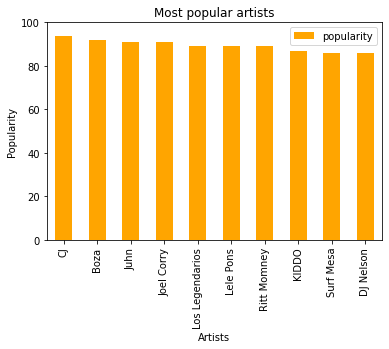

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="popularity", color = "orange")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Popularity")
most_populars.set_title("Most popular artists")
plt.ylim(0,100)


(0.0, 100.0)

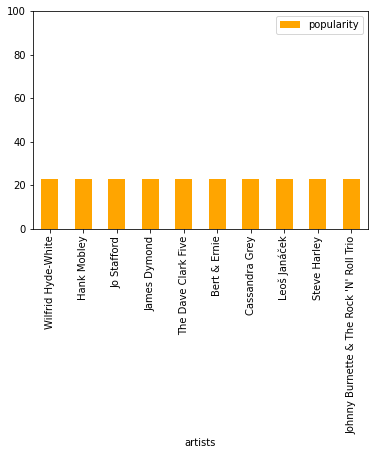

In [ ]:
mid.plot.bar(x="artists",y="popularity", color = "orange")
plt.ylim(0,100)

####<font color='#92A8D1'>Analysis of the Most Popular Artists

At this part, we try to analysize most popular artists and to answer which kind of features have role to determine popularity of artists and also which kind of differences they have compare to other artists.

For analysing top 10 popular artists and understanding these differences, we divided our data two parts as top 10 popular artists and middle 10 popular artists. Then we looked at the acousticness, danceablity, energy, instrumentalness, liveness, speechiness, tempo and valence level to see that whether there is difference between most popular and middle popular artists. 

#####<font color='#B565A7'> Danceability Analysis

(0.0, 1.0)

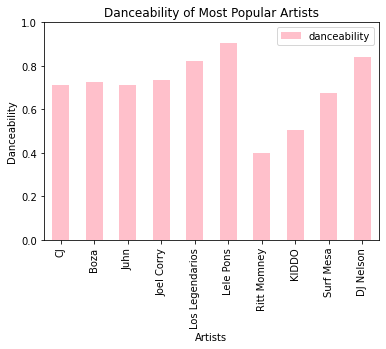

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="danceability", color = "pink")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Danceability")
most_populars.set_title("Danceability of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

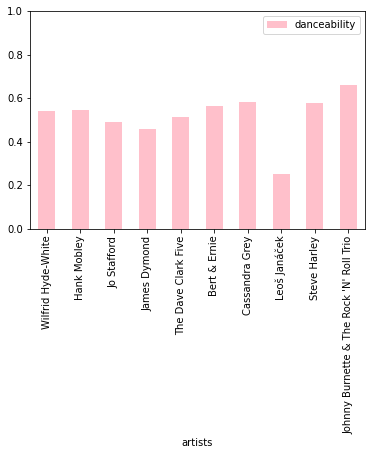

In [ ]:
mid.plot.bar(x="artists",y="danceability", color = "pink")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Acousticness Analysis

(0.0, 1.0)

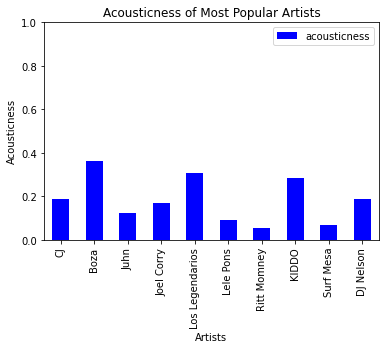

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="acousticness", color = "blue")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Acousticness")
most_populars.set_title("Acousticness of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

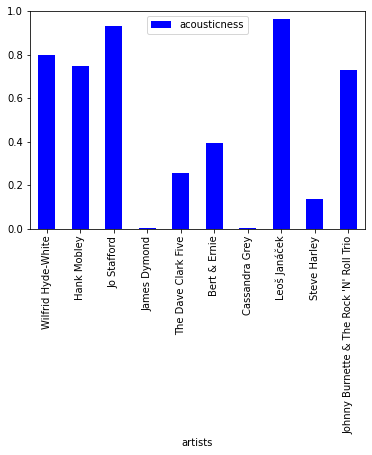

In [ ]:
mid.plot.bar(x="artists",y="acousticness", color = "blue")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Energy Analysis

(0.0, 1.0)

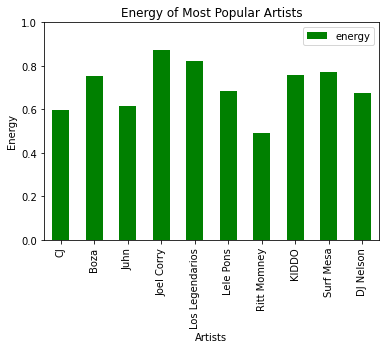

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="energy", color = "green")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Energy")
most_populars.set_title("Energy of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

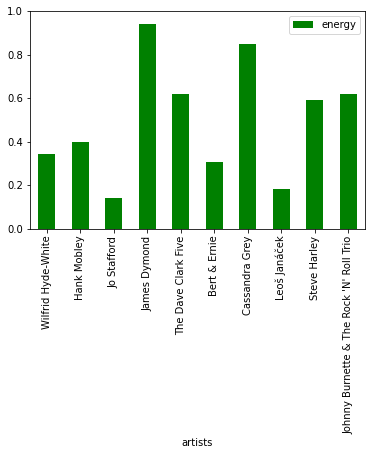

In [ ]:
mid.plot.bar(x="artists",y="energy", color = "green")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Instrumentalness Analysis

(0.0, 1.0)

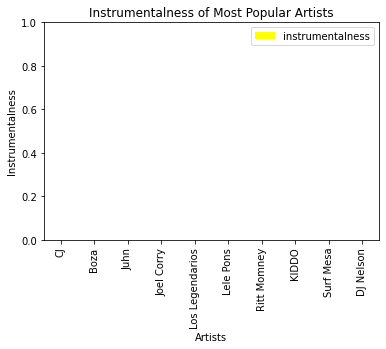

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="instrumentalness", color = "yellow")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Instrumentalness")
most_populars.set_title("Instrumentalness of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

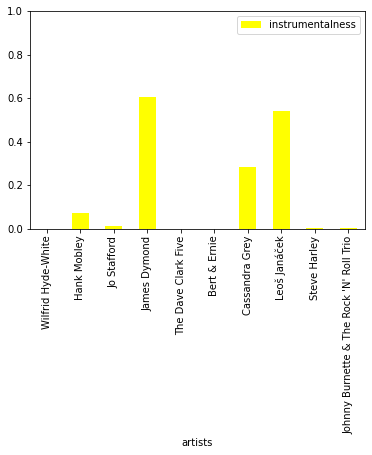

In [ ]:
mid.plot.bar(x="artists",y="instrumentalness", color = "yellow")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Liveness Analysis

(0.0, 1.0)

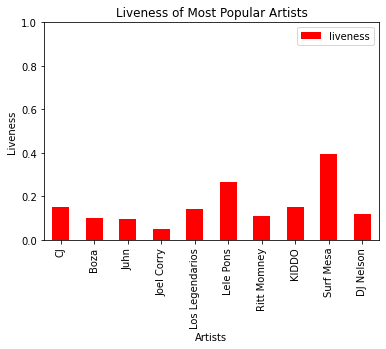

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="liveness", color = "red")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Liveness")
most_populars.set_title("Liveness of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

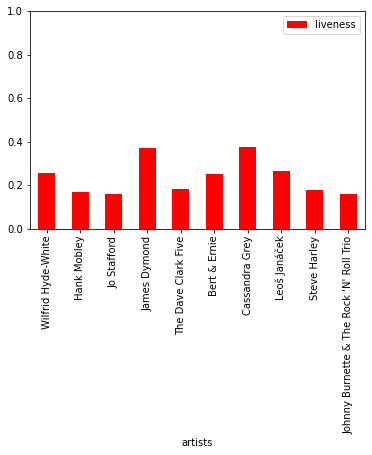

In [ ]:
mid.plot.bar(x="artists",y="liveness", color = "red")
plt.ylim(0,1)

#####<font color='#B565A7'> Speechiness Analysis

(0.0, 1.0)

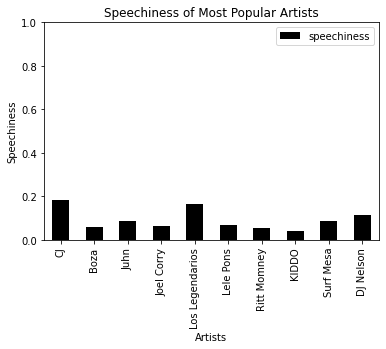

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="speechiness", color = "black")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Speechiness")
most_populars.set_title("Speechiness of Most Popular Artists")
plt.ylim(0,1.0)

(0.0, 1.0)

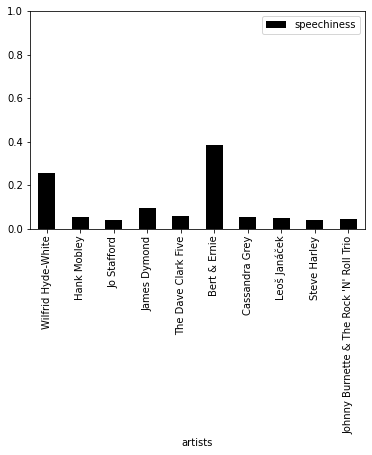

In [ ]:
mid.plot.bar(x="artists",y="speechiness", color = "black")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Tempo Analysis

(50.0, 200.0)

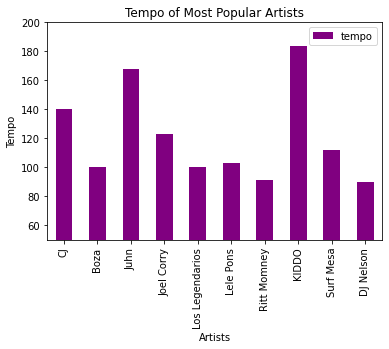

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="tempo", color = "purple")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Tempo")
most_populars.set_title("Tempo of Most Popular Artists")
plt.ylim(50,200)

(50.0, 200.0)

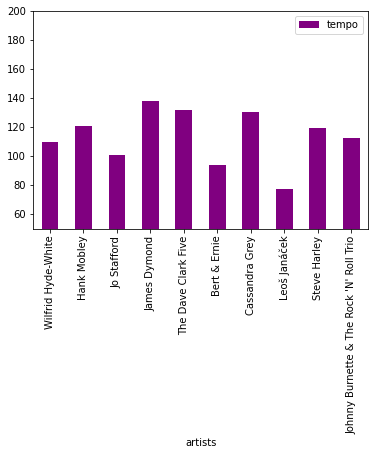

In [ ]:
mid.plot.bar(x="artists",y="tempo", color = "purple")
plt.ylim(50,200)

#####<font color='#B565A7'> Valence Analysis

(0.0, 1.0)

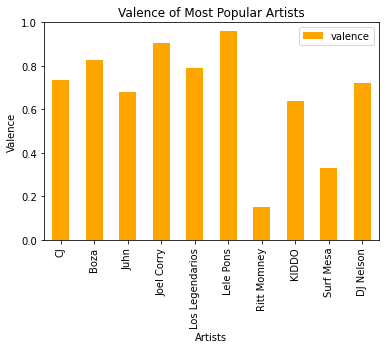

In [ ]:
most_populars = df_artist.sort_values("popularity", ascending=False).head(10).plot.bar(x="artists",y="valence", color = "orange")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Valence")
most_populars.set_title("Valence of Most Popular Artists")
plt.ylim(0,1)

(0.0, 1.0)

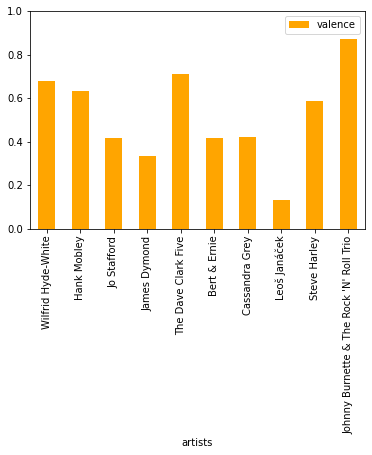

In [ ]:
mid.plot.bar(x="artists",y="valence", color = "orange")
plt.ylim(0,1)

In conclusion, we see some different features between top 10 popular and middle popular artists. 

One of them is acousticness. If we look at the the mean of acousticness of most popular artists (0.18) and the mean of middle popular artists (0.50) , we see that there is a huge difference between them. We could conclude that acousticness level has a deterministic way to classify popularity of artists. Artists who has less acousticness level in their musics are more popular.

Another difference between most popular and least popular artists is dancebility. 
The mean of danceability of most popular artists is (0.70).
The mean of danceability of middle popular artists is (0.52).
We could say that artists whose songs have more danceability features are more popular.

Moreover, there is also differences between energy level and tempo level of artists. The mean of energy and tempo of most popular artists is (0.71), (121.12) and the mean of less popular artists is (0.50), (113.44) respectively. Therefore, the energy and tempo level has also a deterministic role to classify popularity of artists.

Furthermore, we can see the difference between instrumentalness and liveness level of artists. The mean of top 10 artists is (0.0003), (0.16) and the mean of middle popular artists is (0.15), (0.26) respectively . The artists who are most popular have less instrumentallness and liveness level. 

At the second part, we would try to analysize hypothesis testing and to see the features which lead to popularity differences is enough for rejecting null-hypothesis or not. 



In [ ]:
df_artist.sort_values("popularity", ascending=False).head(10).mean()

acousticness             0.184010
danceability             0.703100
duration_ms         195561.150000
energy                   0.705250
instrumentalness         0.000393
liveness                 0.158060
loudness                -5.464800
speechiness              0.092820
tempo                  121.129000
valence                  0.674750
popularity              89.400000
key                      6.300000
mode                     0.600000
count                    1.700000
dtype: float64

In [ ]:
mid.mean()

acousticness             0.496179
danceability             0.518369
duration_ms         203987.332867
energy                   0.498955
instrumentalness         0.151454
liveness                 0.236609
loudness               -11.751625
speechiness              0.106753
tempo                  113.432787
valence                  0.519548
popularity              22.616728
key                      6.400000
mode                     0.800000
count                   18.100000
dtype: float64

####<font color='#92A8D1'>Analysis of Most Popular Songs

We try to analyze top 10 popular songs and show that what the name of the these songs are and which kind of differences they have compare to other songs.

Due to this comparison, we divide our data 3 parts as most 10 popular songs, middle 10 popular songs and least 10 popular songs.

Then, we compare acousticness, danceability, duration in ms, energy, instrumentalness, liveness, speechiness, tempo, valence and year of these three parts to see which kind of features determines popularity of songs.  

In [ ]:
df_data = tracksdf
popular_song = df_data.sort_values("popularity", ascending=False).head(10)
popular_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
60723,0.721,Olivia Rodrigo,0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.1320,2021,"['pop', 'post-teen pop']"
58839,0.468,Ariana Grande,0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.6820,2020,"['dance pop', 'pop', 'post-teen pop']"
61041,0.212,KAROL G,0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.8380,2020,"['latin', 'reggaeton', 'reggaeton colombiano',..."
60076,0.218,Billie Eilish,0.889,174321,0.340,0,54bFM56PmE4YLRnqpW6Tha,0.130000,11,0.0550,-7.773,0,Therefore I Am,94,2020-11-12,0.0697,94.009,0.7160,2020,"['electropop', 'pop']"
60903,0.213,The Kid LAROI,0.662,161385,0.413,1,27OeeYzk6klgBh83TSvGMA,0.000000,0,0.1340,-7.357,1,WITHOUT YOU,94,2020-11-06,0.0299,93.005,0.4670,2020,['australian hip hop']
58840,0.237,Ariana Grande,0.830,173711,0.585,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,94,2020-10-30,0.0940,109.978,0.4850,2020,"['dance pop', 'pop', 'post-teen pop']"
60702,0.650,Pop Smoke,0.709,160000,0.548,1,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,93,2020-07-03,0.3530,83.995,0.5430,2020,['brooklyn drill']
60941,0.786,Tate McRae,0.642,169266,0.374,0,45bE4HXI0AwGZXfZtMp8JR,0.000000,4,0.0906,-9.386,1,you broke me first,93,2020-04-17,0.0545,124.099,0.0799,2020,"['dance pop', 'electropop', 'pop', 'post-teen ..."
57308,0.181,Justin Bieber,0.686,190779,0.538,0,31qCy5ZaophVA81wtlwLc4,0.000003,2,0.1130,-8.026,1,Anyone,92,2021-01-01,0.0345,115.884,0.5840,2021,"['canadian pop', 'pop', 'post-teen pop']"
67886,0.414,Tiësto,0.798,164000,0.620,0,6f3Slt0GbA2bPZlz0aIFXN,0.019200,8,0.1120,-7.079,0,The Business,92,2020-09-16,0.2320,120.031,0.2350,2020,"['big room', 'brostep', 'dance pop', 'dutch ed..."


In [ ]:
rest_songs = df_data.sort_values("popularity", ascending=False)
dropSName = rest_songs[rest_songs['name'].apply(lambda x: '$' in x)].index
rest_songs.drop(dropSName,inplace = True)
mid_song = rest_songs.iloc[57943:57952]
mid_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
9244,0.2590,Frank Sinatra,0.399,184773,0.6540,0,0kxsVuPjFfaMuZ5OsTIPq0,0.000000,5,0.3570,-6.110,0,My Kind Of Town - Live At The Sands Hotel And ...,25,1966-07,0.1100,168.631,0.590,1966,"['adult standards', 'easy listening', 'lounge']"
41790,0.2340,Reba McEntire,0.611,196173,0.3340,0,5A0Z5CMOrgM6fSdaMqiZgh,0.000006,7,0.1560,-15.620,1,I'll Be Home For Christmas,25,1987-11-27,0.0353,124.866,0.412,1987,"['contemporary country', 'country', 'country d..."
29183,0.2410,Daryl Hall & John Oates,0.773,195160,0.7930,0,2zBKc3OxJSvCLw3b23PzHA,0.000001,2,0.0297,-11.219,1,Guessing Games,25,1982-10-04,0.0330,117.393,0.969,1982,"['album rock', 'classic rock', 'mellow gold', ..."
33212,0.2240,Styx,0.363,322493,0.4930,0,05YHP0ORZyXvcJhpCm1URq,0.000129,2,0.2000,-11.536,1,Love In The Midnight,25,1979-01-01,0.0385,144.141,0.479,1979,"['album rock', 'art rock', 'classic rock', 'fo..."
29182,0.3760,Daryl Hall & John Oates,0.708,277800,0.4730,0,3DfilayPHgEy3EDsfvr4HH,0.000000,2,0.1080,-11.422,0,Go Solo,25,1982-10-04,0.0284,90.473,0.815,1982,"['album rock', 'classic rock', 'mellow gold', ..."
29181,0.0928,Daryl Hall & John Oates,0.638,197920,0.7430,0,4sJtdODESGXr8qMFYZmau5,0.000004,5,0.1080,-11.295,1,Italian Girls,25,1982-10-04,0.0298,131.766,0.961,1982,"['album rock', 'classic rock', 'mellow gold', ..."
79523,0.9760,Narciso Yepes,0.677,143853,0.0907,0,6N6PovdkbnsrQp8JYnltfR,0.892000,9,0.0995,-26.534,0,Jeux interdits (Romance),25,1971-04-01,0.0510,108.006,0.191,1971,"['classical guitar', 'classical performance', ..."
29179,0.9680,Daryl Hall & John Oates,0.281,209840,0.0835,0,3ql3Ob1HM23hNuwfw35GOb,0.000074,7,0.1140,-19.901,1,Laughing Boy,25,1973-01-01,0.0371,87.110,0.114,1973,"['album rock', 'classic rock', 'mellow gold', ..."
84469,0.0264,External Menace,0.194,170960,0.8570,0,1TMbE6YzRLGkyw5OzlaiEw,0.000000,9,0.3190,-10.326,1,Someday,25,1983-01-01,0.0518,204.901,0.649,1983,"['oi', 'street punk', 'uk82']"


In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10)
least_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
3050,0.9720,Lata Mangeshkar,0.449,223115,0.1320,0,071EH1HwTXXN0x8ndlpTqa,0.000000,2,0.591,-11.343,1,Dil Tod Ke Jane Wale,0,1949-12-31,0.0619,106.322,0.381,1949,"['classic bollywood', 'desi pop', 'filmi', 'su..."
5264,0.9900,Amirbai Karnataki,0.392,177157,0.3500,0,6Rqu3Cz0Kf3tITAZDaI7HI,0.293000,2,0.121,-8.143,1,Bijli Girane Wale,0,1944-12-31,0.0850,80.077,0.216,1944,"['classic bollywood', 'filmi']"
3046,0.9950,Lata Mangeshkar,0.444,191425,0.2010,0,1VzprdYpMeb8tPWQXRgl05,0.378000,4,0.131,-13.606,1,Mohan Kyon Nahin Aaye,0,1948-12-31,0.0587,110.090,0.685,1948,"['classic bollywood', 'desi pop', 'filmi', 'su..."
61820,0.9940,Meena Kapoor,0.561,191792,0.1040,0,11asufcHaBN0XUvmvDLhSb,0.000044,8,0.144,-7.333,1,He Man Bhooleli,0,1948-07-23,0.0721,71.713,0.578,1948,['classic bollywood']
5265,0.9820,Amirbai Karnataki,0.722,192911,0.3360,0,6vzUhzY6uoRFCdvgFSHYhJ,0.001730,1,0.383,-8.886,0,Sham Huyi O Panchhi Aa,0,1944-12-01,0.0438,136.033,0.949,1944,"['classic bollywood', 'filmi']"
56919,0.3460,Armin van Buuren,0.389,47033,0.6680,0,6dY9ITlC5f6rU68d3d4QPb,0.000231,1,0.629,-14.639,1,Outro - A Matter Of What You Believe In - A St...,0,2014-01-03,0.4090,59.595,0.861,2014,"['dutch trance', 'edm', 'pop dance', 'progress..."
56918,0.1430,Armin van Buuren,0.432,104415,0.6860,0,2mj9pxHhXaBA9T57kufWPZ,0.000000,0,0.339,-12.599,1,Intro - The Oath - A State Of Trance Year Mix ...,0,2014-01-03,0.7580,84.936,0.362,2014,"['dutch trance', 'edm', 'pop dance', 'progress..."
56916,0.1040,Armin van Buuren,0.287,80571,0.3830,0,2JUszLbnJo8wSH6zGngYE6,0.000113,3,0.526,-17.778,1,Every End Is A New Beginning - A State Of Tran...,0,2013-01-03,0.0550,79.380,0.408,2013,"['dutch trance', 'edm', 'pop dance', 'progress..."
61821,0.9930,Meena Kapoor,0.402,199395,0.0867,0,1Bpu8Dw32svpODJQUNeyMA,0.520000,5,0.106,-13.952,0,Nagari Lage Sooni Sooni,0,1948-12-31,0.0505,71.852,0.437,1948,['classic bollywood']
78762,0.0166,MC Shakie,0.756,214962,0.9330,1,5FbGpj9RYpaPEmROo8OiGW,0.103000,7,0.356,-6.240,1,Lost Yo Mind Bounce,0,2018-08-29,0.1790,105.055,0.469,2018,['bounce']


(0.0, 100.0)

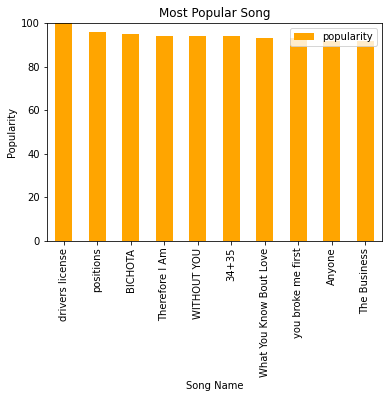

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="popularity", color = "orange")
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Popularity")
popular_song.set_title("Most Popular Song")
plt.ylim(0,100)

(0.0, 100.0)

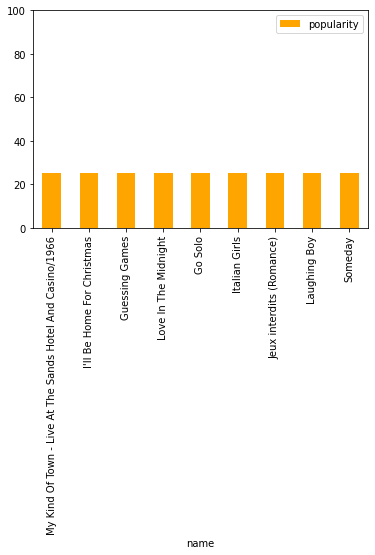

In [ ]:
mid_song.plot.bar(x="name",y="popularity", color = "orange")
plt.ylim(0,100)

Text(0.5, 1.0, 'Least Popular Song')

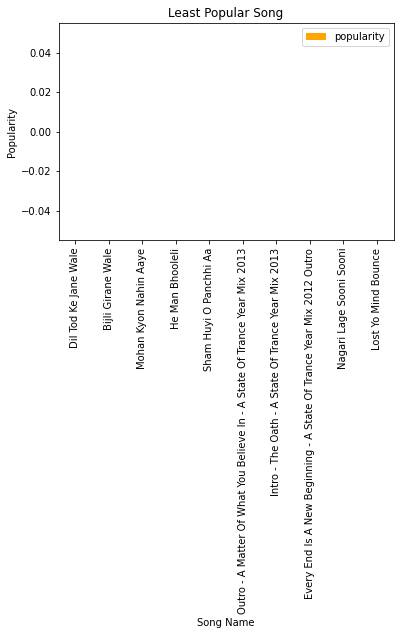

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="popularity", color = "orange")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Popularity")
least_song.set_title("Least Popular Song")

#####<font color='#B565A7'> Acousticness Analysis

Text(0.5, 1.0, 'Acousticness Level of Most Popular Songs')

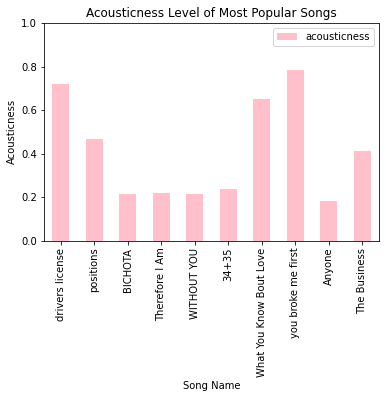

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="acousticness", color = "pink")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Acousticness")
popular_song.set_title("Acousticness Level of Most Popular Songs")

(0.0, 1.0)

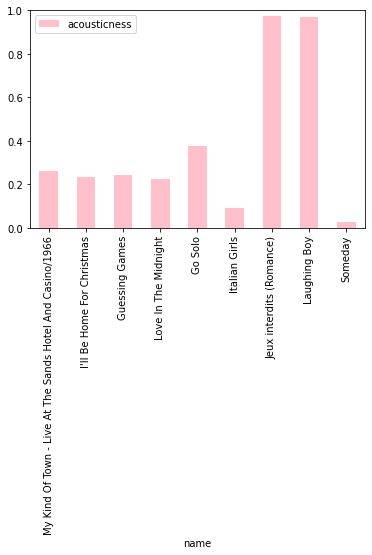

In [ ]:
mid_song.plot.bar(x="name",y="acousticness", color = "pink")
plt.ylim(0,1.0)

(0.0, 1.0)

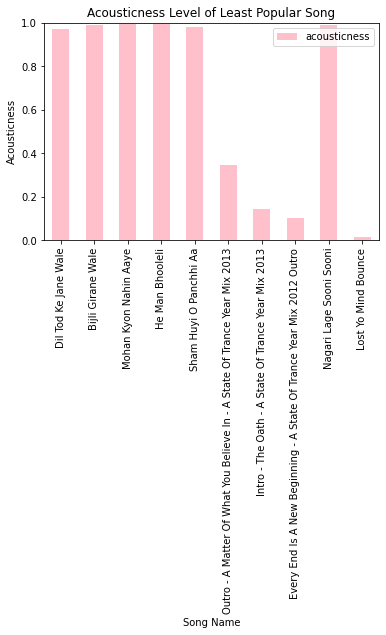

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="acousticness", color = "pink")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Acousticness")
least_song.set_title("Acousticness Level of Least Popular Song")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Danceability Analysis

Text(0.5, 1.0, 'Danceability Level of Most Popular Songs')

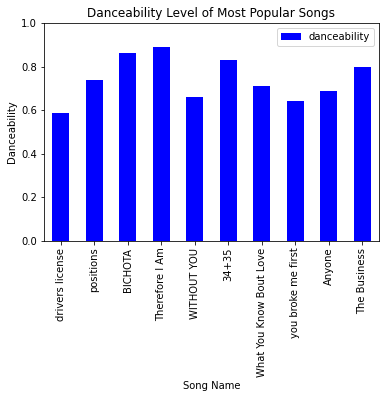

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="danceability", color = "blue")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Danceability")
popular_song.set_title("Danceability Level of Most Popular Songs")

(0.0, 1.0)

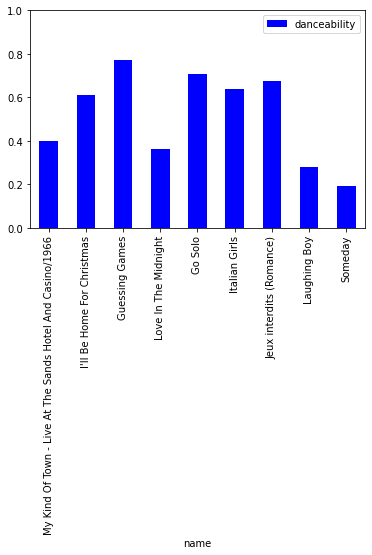

In [ ]:
mid_song.plot.bar(x="name",y="danceability", color = "blue")
plt.ylim(0,1.0)

(0.0, 1.0)

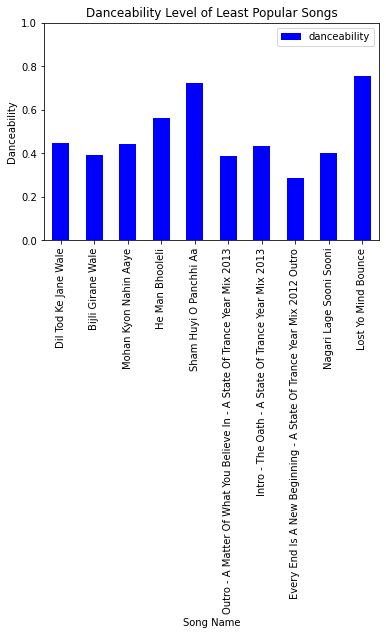

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="danceability", color = "blue")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Danceability")
least_song.set_title("Danceability Level of Least Popular Songs")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Duration Analysis

Text(0.5, 1.0, 'The Length of Most Popular Songs in Milliseconds (ms)')

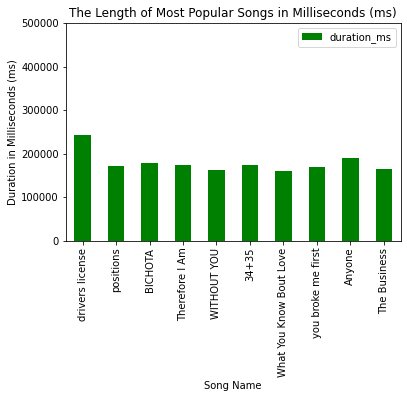

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="duration_ms", color = "green")
plt.ylim(0,500000)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Duration in Milliseconds (ms)")
popular_song.set_title("The Length of Most Popular Songs in Milliseconds (ms)")

(0.0, 500000.0)

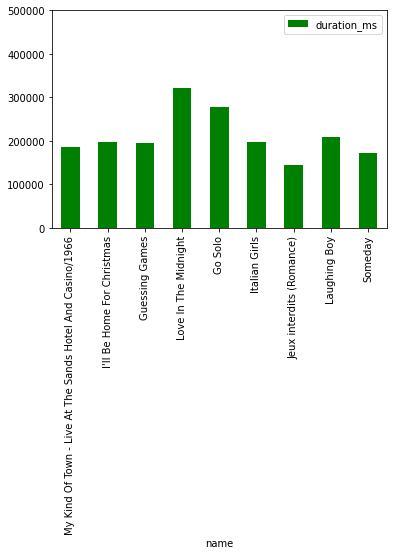

In [ ]:
mid_song.plot.bar(x="name",y="duration_ms", color = "green")
plt.ylim(0,500000)

(0.0, 500000.0)

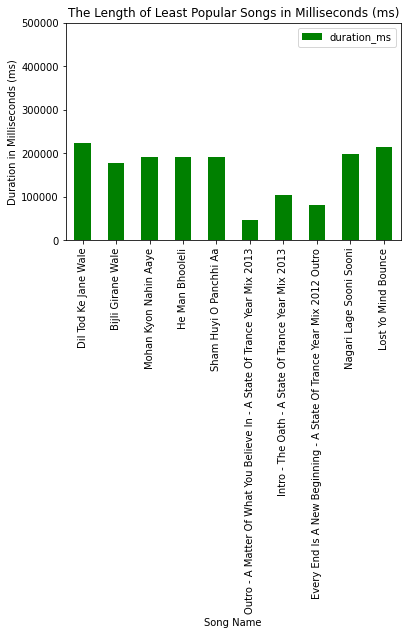

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="duration_ms", color = "green")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Duration in Milliseconds (ms)")
least_song.set_title("The Length of Least Popular Songs in Milliseconds (ms)")
plt.ylim(0,500000)

#####<font color='#B565A7'> Energy Analysis

Text(0.5, 1.0, 'The Energy Level of Most Popular Songs')

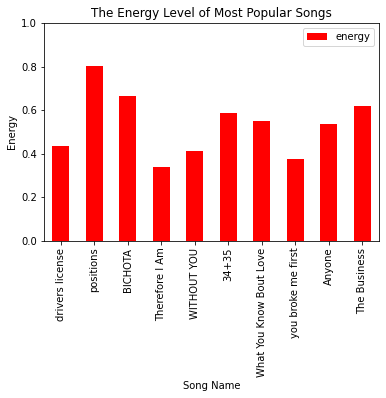

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="energy", color = "red")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Energy")
popular_song.set_title("The Energy Level of Most Popular Songs")

(0.0, 1.0)

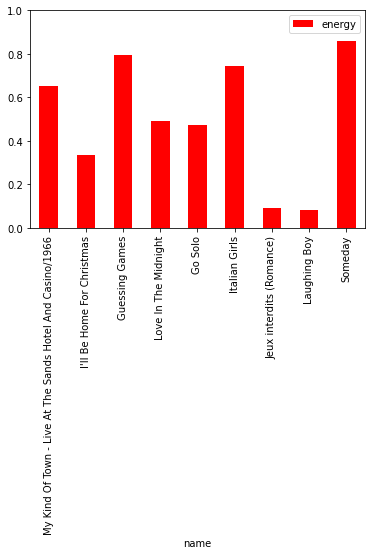

In [ ]:
mid_song.plot.bar(x="name",y="energy", color = "red")
plt.ylim(0,1.0)

(0.0, 1.0)

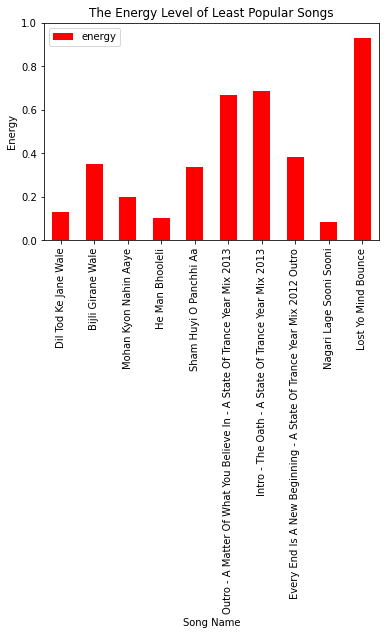

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="energy", color = "red")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Energy")
least_song.set_title("The Energy Level of Least Popular Songs")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Instrumentalness Analysis

Text(0.5, 1.0, 'The Instrumentalness Level of Most Popular Songs')

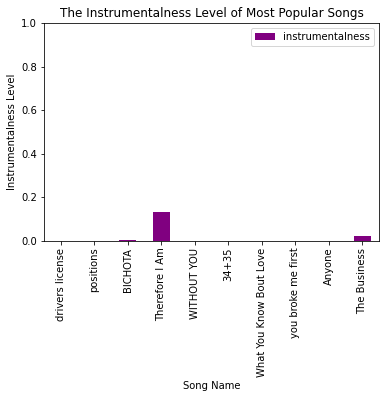

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="instrumentalness", color = "purple")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Instrumentalness Level")
popular_song.set_title("The Instrumentalness Level of Most Popular Songs")

(0.0, 1.0)

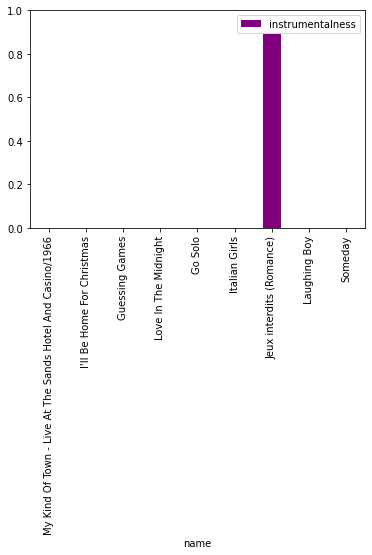

In [ ]:
mid_song.plot.bar(x="name",y="instrumentalness", color = "purple")
plt.ylim(0,1.0)

(0.0, 1.0)

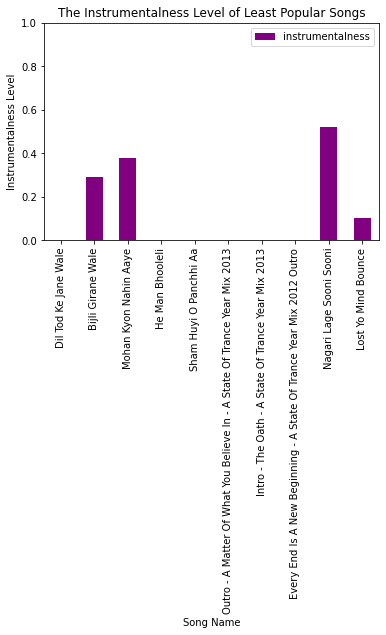

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="instrumentalness", color = "purple")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Instrumentalness Level")
least_song.set_title("The Instrumentalness Level of Least Popular Songs")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Liveness Analysis

Text(0.5, 1.0, 'The Liveness Level of Most Popular Songs')

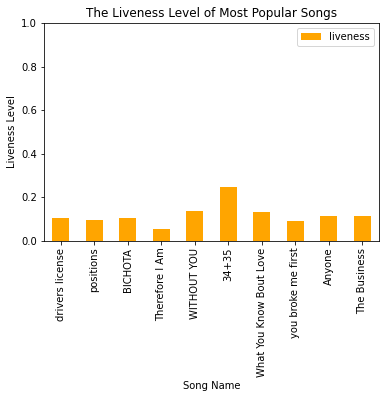

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="liveness", color = "orange")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Liveness Level")
popular_song.set_title("The Liveness Level of Most Popular Songs")

(0.0, 1.0)

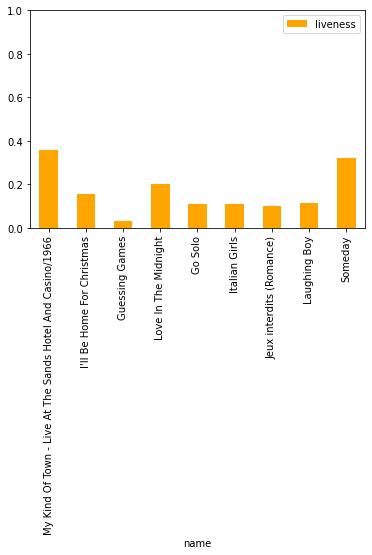

In [ ]:
mid_song.plot.bar(x="name",y="liveness", color = "orange")
plt.ylim(0,1.0)

(0.0, 12.0)

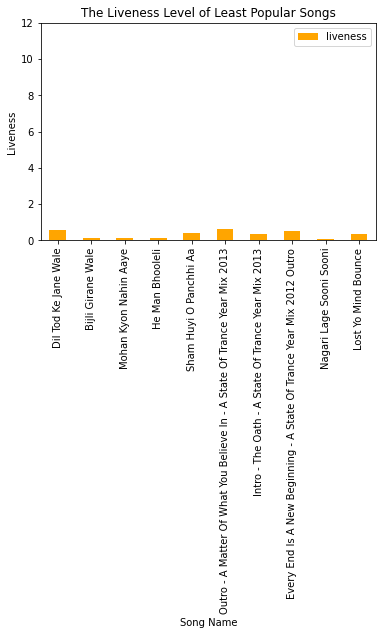

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="liveness", color = "orange")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Liveness")
least_song.set_title("The Liveness Level of Least Popular Songs")
plt.ylim(0,12.0)

#####<font color='#B565A7'> Speechiness Level

Text(0.5, 1.0, 'The Speechiness Level of Most Popular Songs')

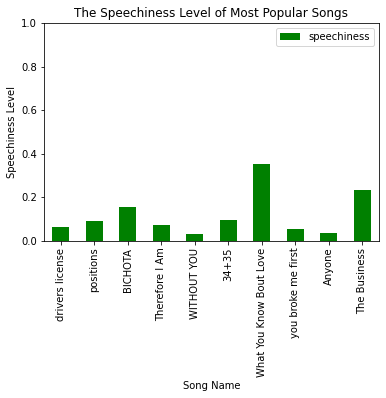

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="speechiness", color = "green")
plt.ylim(0,1.0)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Speechiness Level")
popular_song.set_title("The Speechiness Level of Most Popular Songs")

(0.0, 1.0)

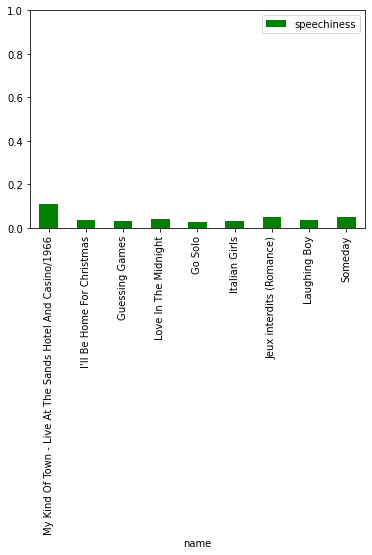

In [ ]:
mid_song.plot.bar(x="name",y="speechiness", color = "green")
plt.ylim(0,1.0)

(0.0, 1.0)

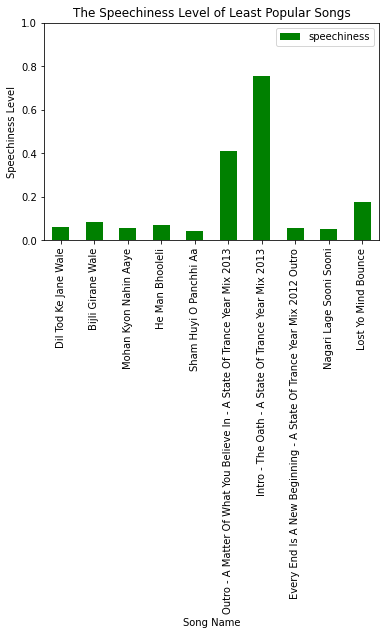

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="speechiness", color = "green")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Speechiness Level")
least_song.set_title("The Speechiness Level of Least Popular Songs")
plt.ylim(0,1.0)

#####<font color='#B565A7'> Tempo Analysis

Text(0.5, 1.0, 'The Tempo Level of Most Popular Songs')

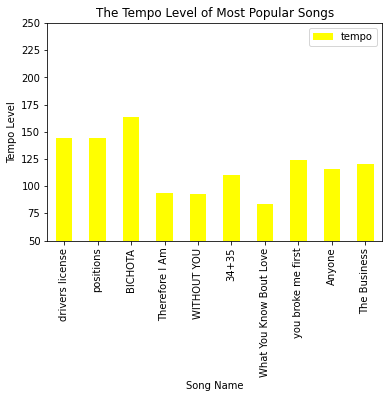

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="tempo", color = "yellow")
plt.ylim(50,250)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Tempo Level")
popular_song.set_title("The Tempo Level of Most Popular Songs")

(50.0, 250.0)

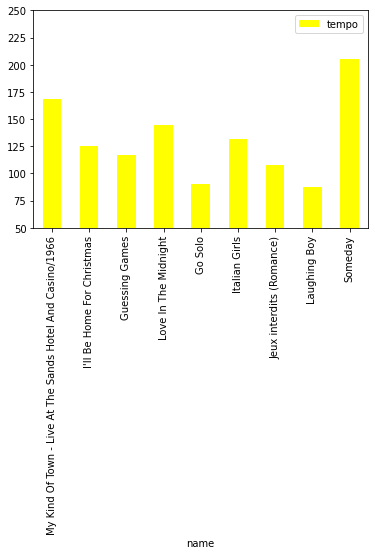

In [ ]:
mid_song.plot.bar(x="name",y= "tempo", color = "yellow")
plt.ylim(50,250)

(50.0, 250.0)

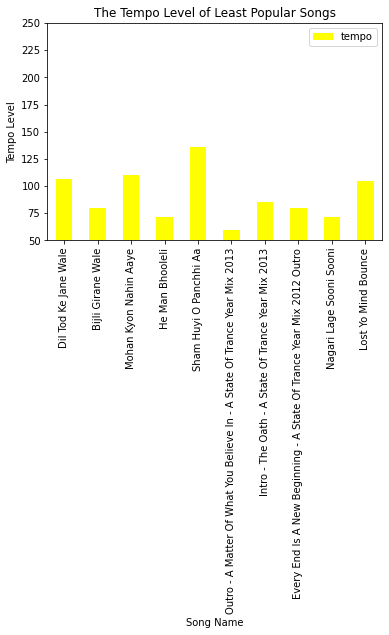

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="tempo", color = "yellow")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Tempo Level")
least_song.set_title("The Tempo Level of Least Popular Songs")
plt.ylim(50,250)

#####<font color='#B565A7'> Valence Level

Text(0.5, 1.0, 'Valence of Most Popular Songs')

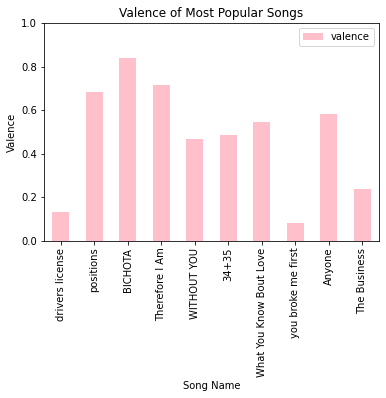

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="valence", color = "pink")
plt.ylim(0,1)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Valence")
popular_song.set_title("Valence of Most Popular Songs")

(0.0, 1.0)

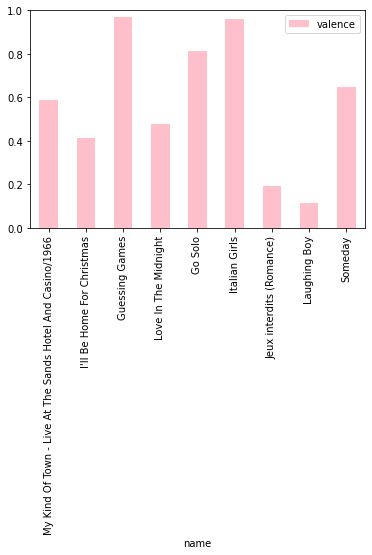

In [ ]:
mid_song.plot.bar(x="name",y= "valence", color = "pink")
plt.ylim(0,1)

(0.0, 1.0)

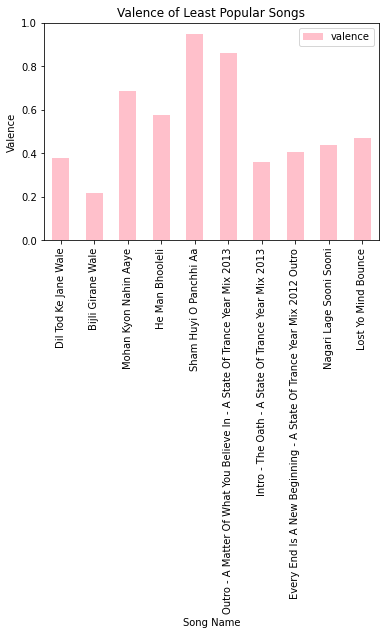

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="valence", color = "pink")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Valence")
least_song.set_title("Valence of Least Popular Songs")
plt.ylim(0,1)

#####<font color='#B565A7'> Year Analysis

Text(0.5, 1.0, 'The Release Year of Most Popular Songs')

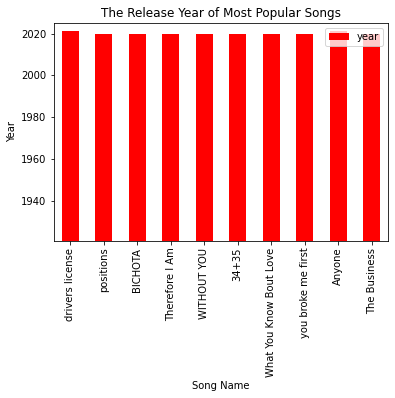

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).plot.bar(x="name",y="year", color = "red")
plt.ylim(1921,2025)
popular_song.set_xlabel("Song Name")
popular_song.set_ylabel("Year")
popular_song.set_title("The Release Year of Most Popular Songs")

(1921.0, 2025.0)

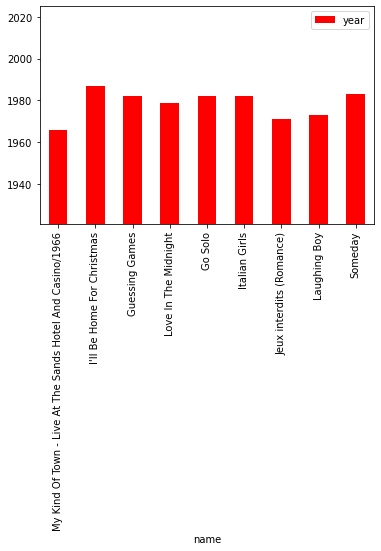

In [ ]:
mid_song.plot.bar(x="name",y= "year", color = "red")
plt.ylim(1921,2025)

(1921.0, 2025.0)

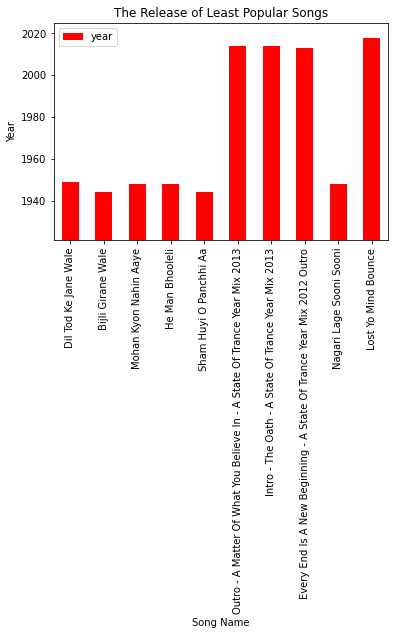

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).plot.bar(x="name",y="year", color = "red")
least_song.set_xlabel("Song Name")
least_song.set_ylabel("Year")
least_song.set_title("The Release of Least Popular Songs")
plt.ylim(1921,2025)

 As a result of looking and comparing each features within most popular, middle popular, least popular songs, we saw that some features have deterministic role to classify popularity.

First of all, the mean of danceability is decreasing from most popular songs (0.74) to least popular songs (0.48) and the mean of energy from most popular songs (0.53) to least popular songs (0.38) is also decreasing. It means that songs with high dancebility and energy are more popular.

Secondly, we see that mean of instrumentalness level increases from most populars songs(0.01) to least popular songs (0.13). We could say that instrumentalness has deterministic level for popularity of songs. 
It means that songs which has high instrumentalness level are less popular.

Like instrumentalness, the mean of liveness is also increasing from most popular (0.12) to least popular songs (0.33). It means that we could conclude that liveness has a role to determine the popularity of songs.

Moreover, the mean of year is decreasing from most popular (2020.20) to least popular (1974). It means that songs which were released recently have higher popularity than middle and least popular songs.

In [ ]:
popular_song = df_data.sort_values("popularity", ascending=False).head(10).mean()
popular_song

acousticness             0.410000
danceability             0.740100
duration_ms         178674.800000
energy                   0.532200
explicit                 0.600000
instrumentalness         0.014971
key                      4.600000
liveness                 0.118670
loudness                -7.228000
mode                     0.700000
popularity              94.300000
speechiness              0.116750
tempo                  119.279800
valence                  0.476190
year                  2020.200000
dtype: float64

In [ ]:
mid_song.mean()

acousticness             0.377467
danceability             0.516000
duration_ms         210996.888889
energy                   0.502356
explicit                 0.000000
instrumentalness         0.099135
key                      5.333333
liveness                 0.165689
loudness               -13.773667
mode                     0.666667
popularity              25.000000
speechiness              0.046100
tempo                  130.809667
valence                  0.575556
year                  1978.333333
dtype: float64

In [ ]:
least_song = df_data.sort_values("popularity", ascending=False).tail(10).mean()
least_song

acousticness             0.653560
danceability             0.483400
duration_ms         162277.600000
energy                   0.387970
explicit                 0.100000
instrumentalness         0.129612
key                      3.300000
liveness                 0.332600
loudness               -11.451900
mode                     0.800000
popularity               0.000000
speechiness              0.177300
tempo                   90.505300
valence                  0.534600
year                  1974.000000
dtype: float64

###<font color="orange">How Songs of Different Genres Change Over Time?

Text(0.5, 1.0, 'Change of Acousticness Over the Years')

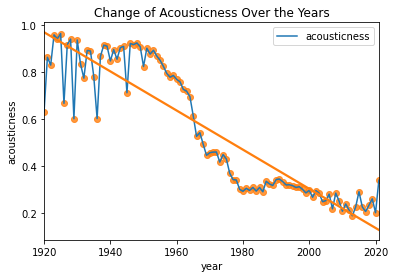

In [ ]:
axAcousticness = yearsdf.plot(x = "year", y = "acousticness", )
sns.regplot(yearsdf["year"], yearsdf["acousticness"], ci = None)
axAcousticness.set_title("Change of Acousticness Over the Years")
#Plotted Acousticness, Loudness, Energy, Tempo, Instrumentalness, Danceability, Liveness, and Speechness features of all times, to see the change with time.

Text(0.5, 1.0, 'Change of Loudness Over the Years')

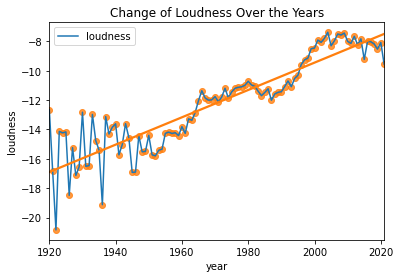

In [ ]:
axLoudness = yearsdf.plot(x = "year", y = "loudness")
sns.regplot(yearsdf["year"], yearsdf["loudness"], ci = None)
axLoudness.set_title("Change of Loudness Over the Years")

Text(0.5, 1.0, 'Change of Energy Over the Years')

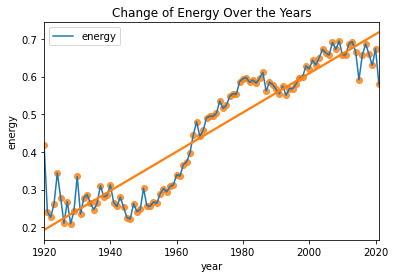

In [ ]:
axEnergy = yearsdf.plot(x = "year", y = "energy")
sns.regplot(yearsdf["year"], yearsdf["energy"], ci = None)
axEnergy.set_title("Change of Energy Over the Years")

Text(0.5, 1.0, 'Change of Tempo Over the Years')

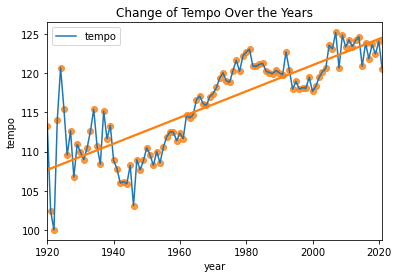

In [ ]:
axTempo = yearsdf.plot(x = "year", y = "tempo")
sns.regplot(yearsdf["year"], yearsdf["tempo"], ci = None)
axTempo.set_title("Change of Tempo Over the Years")

Text(0.5, 1.0, 'Change of Instrumentalness Over the Years')

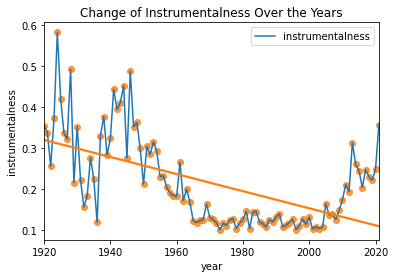

In [ ]:
axInstrumentalness = yearsdf.plot(x = "year", y = "instrumentalness", )
sns.regplot(yearsdf["year"], yearsdf["instrumentalness"], ci = None)
axInstrumentalness.set_title("Change of Instrumentalness Over the Years")

Text(0.5, 1.0, 'Change of Danceability Over the Years')

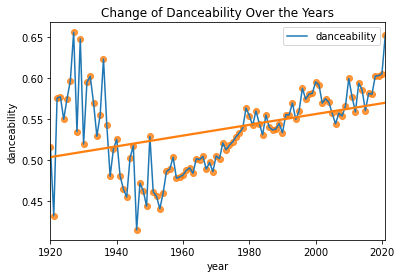

In [ ]:
axDanceability = yearsdf.plot(x = "year", y = "danceability", )
sns.regplot(yearsdf["year"], yearsdf["danceability"], ci = None)
axDanceability.set_title("Change of Danceability Over the Years")

Text(0.5, 1.0, 'Change of Speechiness Over the Years')

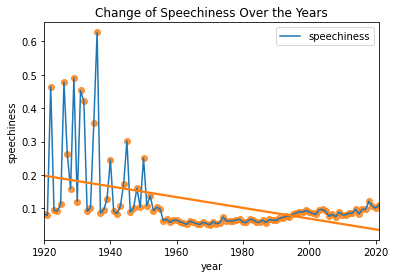

In [ ]:
axSpeechiness = yearsdf.plot(x = "year", y = "speechiness", )
sns.regplot(yearsdf["year"], yearsdf["speechiness"], ci = None)
axSpeechiness.set_title("Change of Speechiness Over the Years")

Speechiness had dropped below 0.1 after 1950s, at the same time, instrumentalness had dropped below 0.2 after 1960s. This is strange because songs should either be speeach heavy or instrument heavy.

  According to the visualisations, one can see that acousticness, instrumentalness, and speechiness of all songs decreased. On the other hand, loudness, energy, tempo and dancability increased. Since, increases and decreases of loudness, energy, and tempo graphs happens at the same years, we think that these features are corralated. 

#### <font color='#92A8D1'>How different Indie, Synth, Pop, and Classical Music change with time?

In [ ]:
indieTracksdf = tracksdf[tracksdf['genres'].apply(lambda x: 'indie' in x)]
grouped_indieTracksdf = indieTracksdf.groupby("year").mean()
grouped_indieTracksdf = grouped_indieTracksdf.reset_index()
grouped_indieTracksdf.head()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1920,0.791000,0.494000,126642.000000,0.584000,0.0,0.044500,1.000000,0.1040,-10.902000,1.000000,0.000000,0.239000,84.27300,0.44300
1,1930,0.958500,0.678500,170936.500000,0.433750,0.0,0.003300,6.500000,0.1205,-10.121250,0.750000,10.000000,0.168225,91.17525,0.90225
2,1938,0.937500,0.557000,174737.000000,0.347500,0.0,0.001757,4.000000,0.4485,-16.030000,0.000000,1.000000,0.068950,85.17650,0.69550
3,1939,0.886000,0.603500,172582.500000,0.268500,0.0,0.000000,6.500000,0.4785,-15.634000,0.500000,1.500000,0.088100,84.00400,0.71950
4,1940,0.965333,0.538667,180273.333333,0.364333,0.0,0.000625,7.666667,0.2094,-13.115667,0.333333,0.666667,0.238000,130.49000,0.87500


In [ ]:
synthTracksdf = tracksdf[tracksdf['genres'].apply(lambda x: 'synth' in x)]
grouped_synthTracksdf = synthTracksdf.groupby("year").mean()
grouped_synthTracksdf = grouped_synthTracksdf.reset_index()
grouped_synthTracksdf.head()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1966,0.409000,0.734000,157173.000000,0.477000,0.000000,0.000662,6.000000,0.076800,-10.822000,1.000000,43.000000,0.048500,145.188000,0.939000
1,1978,0.221327,0.556273,339230.272727,0.711364,0.000000,0.018303,5.000000,0.260209,-7.935727,0.181818,34.090909,0.073427,130.160909,0.763273
2,1979,0.223764,0.619917,320473.416667,0.778667,0.000000,0.012626,4.166667,0.163533,-8.323417,0.750000,36.333333,0.101425,128.001583,0.757333
3,1980,0.127948,0.597926,259589.333333,0.733074,0.000000,0.252124,5.370370,0.194993,-10.137111,0.592593,36.814815,0.055844,136.931889,0.676593
4,1981,0.104261,0.646064,253740.427273,0.731391,0.045455,0.225557,5.527273,0.173081,-10.058791,0.672727,33.536364,0.065692,131.591373,0.658443


In [ ]:
popTracksdf = tracksdf[tracksdf['genres'].apply(lambda x: 'pop' in x)]
grouped_popTracksdf = popTracksdf.groupby("year").mean()
grouped_popTracksdf = grouped_popTracksdf.reset_index()
grouped_popTracksdf.head()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1920,0.791000,0.494000,126642.000000,0.584000,0.0,0.044500,1.000000,0.104000,-10.902000,1.000000,0.000000,0.239000,84.273000,0.443000
1,1921,0.248150,0.591333,261664.333333,0.398167,1.0,0.141317,5.333333,0.149883,-11.733833,0.500000,0.000000,0.040750,100.171333,0.261450
2,1926,0.964400,0.358133,393317.333333,0.157193,0.0,0.307569,5.800000,0.270773,-19.956733,0.800000,0.466667,0.088627,96.269267,0.289667
3,1927,0.985500,0.350500,421277.500000,0.239000,0.0,0.486400,9.500000,0.215500,-15.803500,0.500000,0.500000,0.071050,101.523000,0.274000
4,1928,0.984778,0.296556,368519.888889,0.107478,0.0,0.210768,6.333333,0.250400,-25.464889,0.777778,0.333333,0.069367,101.511778,0.194400


In [ ]:
classicalTracksdf = tracksdf[tracksdf['genres'].apply(lambda x: 'classical' in x)]
grouped_classicalTracksdf = classicalTracksdf.groupby("year").mean()
grouped_classicalTracksdf = grouped_classicalTracksdf.reset_index()
grouped_classicalTracksdf.head()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1921,0.994000,0.362000,182335.000000,0.315000,0.0,0.636000,2.000000,0.380000,-14.111000,1.000000,0.000000,0.064600,91.551000,0.286000
1,1923,0.994000,0.227000,204173.000000,0.423000,0.0,0.787000,6.000000,0.439000,-8.111000,1.000000,0.000000,0.095000,81.239000,0.182000
2,1926,0.977200,0.282850,201149.350000,0.301850,0.0,0.057138,4.400000,0.185465,-9.984550,0.850000,1.050000,0.037360,83.424150,0.263970
3,1930,0.980367,0.673567,147394.166667,0.305733,0.0,0.044252,4.866667,0.171453,-12.218333,0.600000,3.200000,0.159113,111.567567,0.707833
4,1931,0.995667,0.397333,170639.666667,0.104067,0.0,0.862333,4.333333,0.132067,-18.434333,0.666667,1.666667,0.062767,89.784000,0.469333


>Created four different dataframes, for each genre, which includes the mean informations of features according to years.

Text(0.5, 1.0, 'Change of Acousticness Over Time')

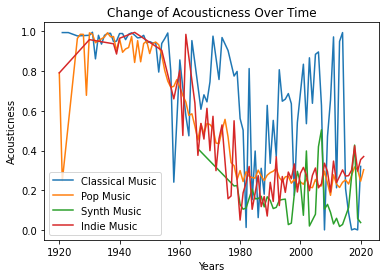

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['acousticness'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['acousticness'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['acousticness'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['acousticness'], label = 'Indie Music')
plt.ylabel("Acousticness")
plt.xlabel("Years")
plt.legend(loc = 'lower left')
plt.title("Change of Acousticness Over Time")

Text(0.5, 1.0, 'Change of Loudness Over Time')

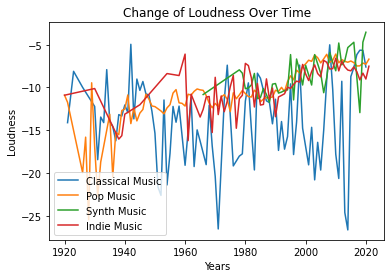

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['loudness'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['loudness'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['loudness'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['loudness'], label = 'Indie Music')
plt.ylabel("Loudness")
plt.xlabel("Years")
plt.legend(loc = 'lower left')
plt.title("Change of Loudness Over Time")

Text(0.5, 1.0, 'Change of Energy Over Time')

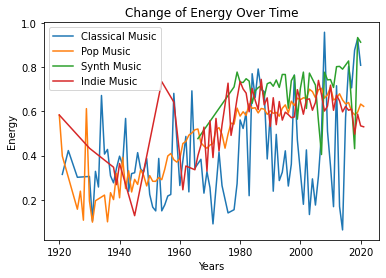

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['energy'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['energy'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['energy'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['energy'], label = 'Indie Music')
plt.ylabel("Energy")
plt.xlabel("Years")
plt.legend(loc = 'upper left')
plt.title("Change of Energy Over Time")

Text(0.5, 1.0, 'Change of Tempo Over Time')

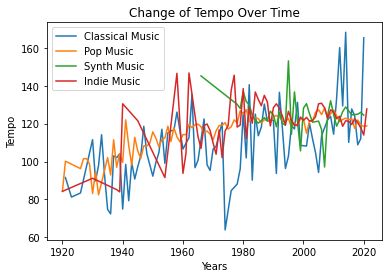

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['tempo'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['tempo'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['tempo'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['tempo'], label = 'Indie Music')
plt.ylabel("Tempo")
plt.xlabel("Years")
plt.legend(loc = 'upper left')
plt.title("Change of Tempo Over Time")

Text(0.5, 1.0, 'Change of Instrumentalness Over Time')

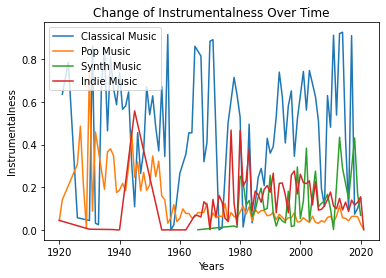

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['instrumentalness'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['instrumentalness'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['instrumentalness'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['instrumentalness'], label = 'Indie Music')
plt.ylabel("Instrumentalness")
plt.xlabel("Years")
plt.legend(loc = 'upper left')
plt.title("Change of Instrumentalness Over Time")

Text(0.5, 1.0, 'Change of Danceability Over Time')

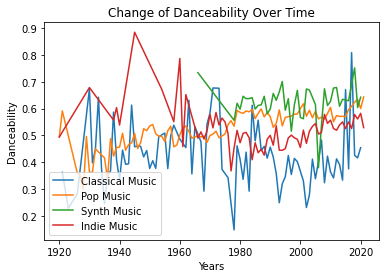

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['danceability'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['danceability'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['danceability'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['danceability'], label = 'Indie Music')
plt.ylabel("Danceability")
plt.xlabel("Years")
plt.legend(loc = 'lower left')
plt.title("Change of Danceability Over Time")

Text(0.5, 1.0, 'Change of Speechiness Over Time')

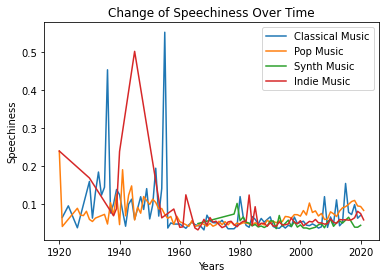

In [ ]:
plt.plot(grouped_classicalTracksdf['year'], grouped_classicalTracksdf['speechiness'], label = 'Classical Music')
plt.plot(grouped_popTracksdf['year'], grouped_popTracksdf['speechiness'], label = 'Pop Music')
plt.plot(grouped_synthTracksdf['year'], grouped_synthTracksdf['speechiness'], label = 'Synth Music')
plt.plot(grouped_indieTracksdf['year'], grouped_indieTracksdf['speechiness'], label = 'Indie Music')
plt.ylabel("Speechiness")
plt.xlabel("Years")
plt.legend(loc = 'upper right')
plt.title("Change of Speechiness Over Time")

Loudness, instrumentalness, danceability of classical songs did not change over time. Acousticness, liveness, speeechiness had decreased, and energy had increased over time.

The change most similar to the change of all songs over time was that of pop songs. Acousticness, instrumentalness, liveness, and speechiness decreased and loudness, energy, tempo, and danceability increased over time.

Acousticness, tempo, and speechiness, features of sytnh music decreased, loudness, energy, instrumentalness, and liveness features increased and danceability feture did not change over time. Additionally, we can not see the correlation in tempo, loudness and energy of all songs, on synth music.

It is visible that acousticness of indie songs had rapidly decreased over time. Even though it is not as rapid, decrease in speechines, danceability and liveness levels is also visible. On the other hand, loudness, tempo, energy and instrumentalness had increased over time. In addition, correlation between loudness, tempo and energy is similar with correlation of these features of all songs. However, in contrast to instrumentalness of all songs, instrumentalness of indie songs had increased over time.

#####<font color='#B565A7'> Checking the Correlations Between Tempo and Loudness

I realised a correlation between Tempo and Loudnes of all songs, beacuse their changes were similar. Therefore, I wanted to check genre by genre. 

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Classical Tracks')

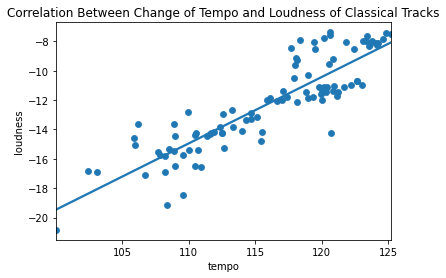

In [ ]:
axCorr_tempoLoudness = yearsdf.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(yearsdf["tempo"], yearsdf["loudness"], ci = None)
axCorr_tempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Classical Tracks")

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Classical Tracks')

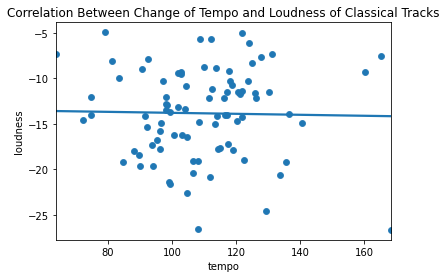

In [ ]:
axCorr_Classical_TempoLoudness = grouped_classicalTracksdf.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(grouped_classicalTracksdf["tempo"], grouped_classicalTracksdf["loudness"], ci = None)
axCorr_Classical_TempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Classical Tracks")

In [ ]:
grouped_classicalTracksdf['tempo'].corr(grouped_classicalTracksdf['loudness'])


-0.020818170599372937

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Pop Tracks Over Time')

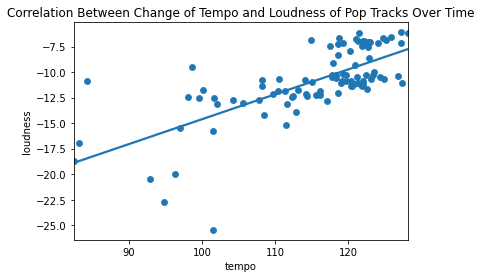

In [ ]:
axCorr_Pop_TempoLoudness = grouped_popTracksdf.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(grouped_popTracksdf["tempo"], grouped_popTracksdf["loudness"], ci = None)
axCorr_Pop_TempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Pop Tracks Over Time")

In [ ]:
grouped_popTracksdf['tempo'].corr(grouped_popTracksdf['loudness'])

0.7091810760145005

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Synth Tracks Over Time')

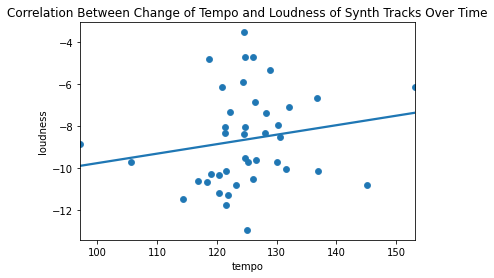

In [ ]:
axCorr_Synth_TempoLoudness = grouped_synthTracksdf.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(grouped_synthTracksdf["tempo"], grouped_synthTracksdf["loudness"], ci = None)
axCorr_Synth_TempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Synth Tracks Over Time")

In [ ]:
grouped_synthTracksdf['tempo'].corr(grouped_synthTracksdf['loudness'])

0.18058640646216617

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Indie Tracks Over Time')

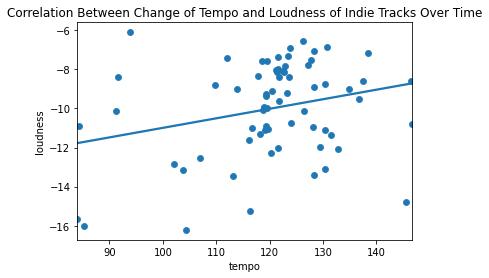

In [ ]:
axCorr_Indie_TempoLoudness = grouped_indieTracksdf.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(grouped_indieTracksdf["tempo"], grouped_indieTracksdf["loudness"], ci = None)
axCorr_Indie_TempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Indie Tracks Over Time")

In [ ]:
grouped_indieTracksdf['tempo'].corr(grouped_indieTracksdf['loudness'])

0.26759803692887574

Except classical music, all the other songs have the similar correlation between their loudness and tempo. However, unlike others, classical music has a negative correlation even though it is very small.

In [ ]:
popdf_50s = popTracksdf.loc[(popTracksdf['year'] <= 1959) & (popTracksdf['year'] >= 1950)]
popdf_50s.head() #filtered the 50s pop songs

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
2592,0.809,Umm Kulthum,0.353,1917347,0.393,0,79e1zzqsh9jtgnkxfObAfa,0.000034,5,0.687,-10.853,0,El Hob Keda,20,1958-01-01,0.0675,132.146,0.241,1958,"['arab folk', 'belly dance', 'classic arab pop']"
2593,0.778,Umm Kulthum,0.384,2126600,0.444,0,7JDxRdll9oUEPbGGVCZVr2,0.001870,10,0.959,-10.201,1,Qesat Al Ams,18,1958-01-01,0.0860,126.955,0.354,1958,"['arab folk', 'belly dance', 'classic arab pop']"
2614,0.948,Umm Kulthum,0.335,2310231,0.458,0,1mgmuIC0urgc3V0gnRmcEF,0.144000,8,0.976,-8.930,1,Sahran Lewahde,0,1950-01-01,0.0735,143.398,0.338,1950,"['arab folk', 'belly dance', 'classic arab pop']"
3015,0.876,Lata Mangeshkar,0.588,339613,0.556,0,2NptrDJFXKX6U7Xcrcg9F8,0.001050,7,0.143,-9.305,1,Bangle Ke Peechhe,21,1950-12-01,0.0568,119.392,0.824,1950,"['classic bollywood', 'desi pop', 'filmi', 'su..."
3026,0.933,Lata Mangeshkar,0.548,291388,0.607,0,4Vb1yy1CuBdEMPDPgtDGsK,0.000009,2,0.104,-5.734,0,Milti Hai Zindagi Men,10,1950-12-01,0.0454,129.192,0.567,1950,"['classic bollywood', 'desi pop', 'filmi', 'su..."


In [ ]:
popdf_60s = popTracksdf.loc[(popTracksdf['year'] <= 1969) & (popTracksdf['year'] >= 1960)]
popdf_60s.head() #filtered the 60s pop songs

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
2446,0.888,Umm Kulthum,0.368,3577800,0.391,0,4ejiWxKQCKiv184LTpA6ym,0.000156,8,0.695,-9.693,1,Fakarouny,37,1960-01-01,0.0519,96.624,0.331,1960,"['arab folk', 'belly dance', 'classic arab pop']"
2494,0.626,Umm Kulthum,0.424,2353813,0.441,0,1PkyJNFqmxHhwGhphkcy5y,0.000013,2,0.692,-11.442,1,Seret El Hob,37,1960-01-01,0.1130,110.475,0.418,1960,"['arab folk', 'belly dance', 'classic arab pop']"
2522,0.851,Umm Kulthum,0.390,2586427,0.296,0,4EmXjrMg5Wl51WCvuVDn6L,0.000054,3,0.953,-13.668,1,Hob Eh,31,1960-01-01,0.0691,106.828,0.340,1960,"['arab folk', 'belly dance', 'classic arab pop']"
2523,0.813,Umm Kulthum,0.395,2497280,0.405,0,7kOtvS6igRttHxNnJDyaQD,0.000040,0,0.745,-8.097,1,Alf Leila We Leila,45,1966-04-07,0.0463,132.295,0.434,1966,"['arab folk', 'belly dance', 'classic arab pop']"
2543,0.900,Umm Kulthum,0.413,3550974,0.451,0,20Do21Zj0KVsM8ol1iFWhN,0.000039,8,0.706,-10.219,0,Enta Omry,43,1966-04-07,0.1410,118.072,0.408,1966,"['arab folk', 'belly dance', 'classic arab pop']"


## <font color="#1DB954"> Hypothesis Testing

### <font color='#92A8D1'> How songs' energy, liveness, and danceability changed during World War 2?

##### <font color='	#ff9933'> **Description of Hypothesis for Energy** 

In [ ]:
ww2_years_tracks=tracksdf.loc[(tracksdf['year'] >= 1939) & (tracksdf['year'] <= 1945)]
other_years_tracks = tracksdf

First we are partition the dataframe as WW2 years and the all the years to understand difference in this era. As our main dataset is sample these partition olsa points out another sample.

In [ ]:
ww2_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
232,0.967,Francisco Canaro,0.467,158493,0.546,0,02HifoNqdIeUqRiq2cWyYF,0.325,7,0.3730,-7.799,0,Muchachita Porteña - Remasterizado,0,1940-01-24,0.0411,95.759,0.847,1940,"['tango', 'vintage tango']"
233,0.954,Francisco Canaro,0.570,194333,0.275,0,4zAvosNBDBwOUjCCDCOLSt,0.122,1,0.1650,-12.992,0,Soñar y Nada Mas - Remasterizado,24,1944-01-22,0.0636,92.709,0.664,1944,"['tango', 'vintage tango']"
234,0.977,Francisco Canaro,0.544,207693,0.251,0,0gQS6i19fmsT0qIjzC8efa,0.203,7,0.1140,-11.849,1,Uno - Remasterizado,0,1944-01-22,0.0706,125.393,0.400,1944,"['tango', 'vintage tango']"
440,0.960,Francisco Canaro,0.650,219560,0.422,0,1Eh7kEvMweqE52rYa8JFO3,0.801,0,0.0909,-9.611,0,El Rey del Bosque - Instrumental (Remasterizado),0,1939-01-24,0.1130,135.670,0.715,1939,"['tango', 'vintage tango']"
441,0.917,Francisco Canaro,0.591,160187,0.543,0,0M3nhN4qJ9svYLxUZs962b,0.836,7,0.1310,-8.211,1,Pimienta - Instrumental (Remasterizado),0,1940-01-24,0.0608,144.115,0.735,1940,"['tango', 'vintage tango']"


In [ ]:
other_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.0264,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,"['blues', 'traditional blues']"
1,0.583000,Screamin' Jay Hawkins,0.744,144360,0.434,0,1YwoYPfhuZlLDbJUH1cKSi,0.0151,5,0.0715,-10.807,0,I Put a Spell on You,44,1999-10-08,0.0845,173.871,0.9390,1999,"['blues', 'traditional blues']"
2,0.639000,Screamin' Jay Hawkins,0.717,145867,0.442,0,7rCchsJktyFH0MB5SIpnbN,0.0233,5,0.1060,-11.594,0,I Put a Spell On You,38,1991-08-13,0.0715,174.060,0.9440,1991,"['blues', 'traditional blues']"
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.8010,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,['circuit']
4,0.000012,Oscar Velazquez,0.568,386287,0.729,0,0TIfXVGqyiOTuWkuxEzQzc,0.9120,2,0.0613,-8.293,1,True House Music - Original Massive Mix,3,1920-01-01,0.0312,129.987,0.1750,1920,['circuit']


In [ ]:
print(f"Mean score of song's energy score during WW2 is {ww2_years_tracks['energy'].mean():.2f}")
print(f"Mean score of song's energy score of all songs is {other_years_tracks['energy'].mean():.2f}")

Mean score of song's energy score during WW2 is 0.30
Mean score of song's energy score of all songs is 0.54




**Hypothesis Test:** We want to test whether there is significant differences in terms of song's energy during WW2. 


**Hyptohesis Question:** Is the average energy score is more than WW2 average energy score which is 0.27?

**Population: Whole songs between 1921-2020**

**Parameter of Interest: p (proportion)**

**Null Hypothesis ($H_0$)**: Means of `energy` samples for all songs are same 

$ H_0: p=0.27$

**Alternative Hypothesis ($H_A$)**: Means of `energy` samples for all songs are more than 0.27

$ H_A: p>0.27$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. Which mean we are going to interpret hypothesis test p value depend on whether `p<0.05` or `p>0.05` to reject or not reject $ H_0$

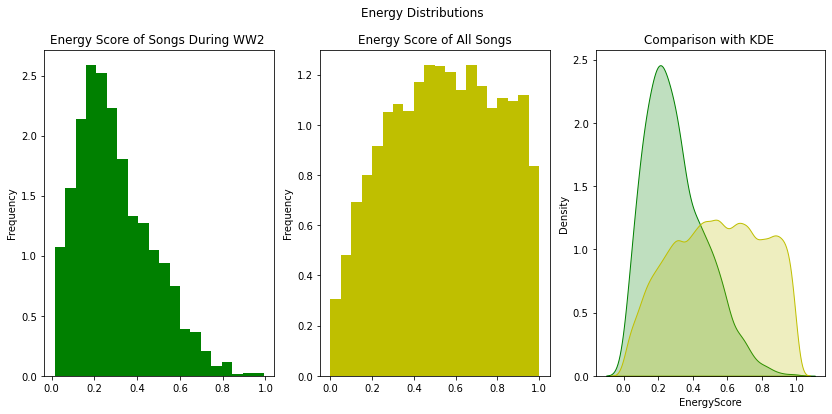

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
                                                                          
        
ww2_years_tracks['energy'].plot(kind="hist", ax=ax[0], bins=20, label="Energy", color="g", density=True)
ax[0].set_title("Energy Score of Songs During WW2 ")

other_years_tracks['energy'].plot(kind="hist", ax=ax[1], bins=20, label="Energy", color="y", density=True)
ax[1].set_title("Energy Score of All Songs")

sns.kdeplot(ww2_years_tracks['energy'], shade=True, label="Energy During WW2", ax=ax[2], color="g")
sns.kdeplot(other_years_tracks['energy'], shade=True, label="Energy of All Songs", ax=ax[2], color="y")
ax[2].set_title("Comparison with KDE ")
ax[2].set_xlabel("EnergyScore")

plt.suptitle("Energy Distributions")
plt.show()

From the figure above, we can see that the songs' energy score durig WW2 years obtained less than the whole data.
Now, let's show this difference statistically by applying a significance test.

###### <font color='	#ff0040'> **Statistical testig and Conclusion of Hypothesis for Energy** 

In [ ]:
meanOfww2_years_tracksE= ww2_years_tracks['energy'].mean()

meanOfother_years_tracksE= other_years_tracks['energy'].mean()
stdOfother_years_tracksE= other_years_tracks['energy'].std()

z_scoreOfEnergy = (meanOfww2_years_tracksE - meanOfother_years_tracksE )/stdOfother_years_tracksE
print("z-score: {}".format(z_scoreOfEnergy))

z-score: -0.9486118714787795


We calculate the z-score as  -0.9486 and find out how many standard deviations away our sample mean is.

The Energy of songs during WW2 0.9486 standard deviatians below the mean

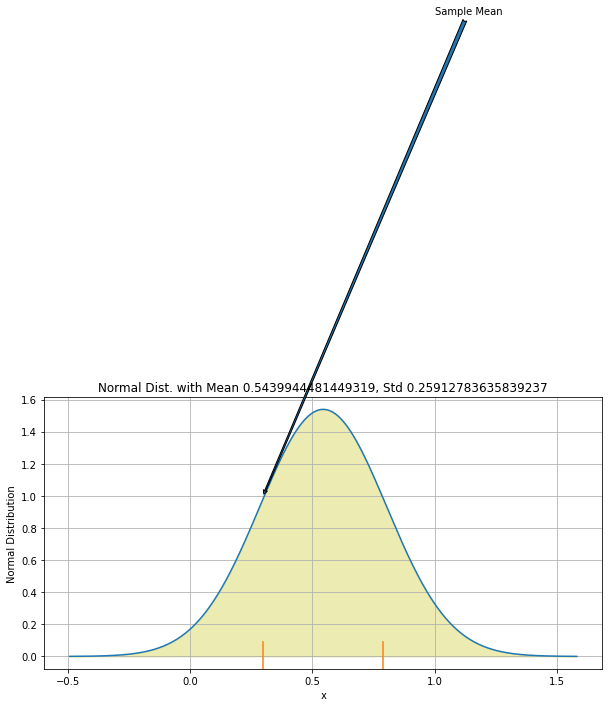

In [ ]:
# mean and std values from the sample
offsetE = 4*other_years_tracks['energy'].std()

x = np.linspace(meanOfother_years_tracksE - offsetE, meanOfother_years_tracksE + offsetE, len(other_years_tracks))

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,meanOfother_years_tracksE,other_years_tracks['energy'].std())

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='y')
# display the z-score locations
plt.axvline(meanOfother_years_tracksE - z_scoreOfEnergy*other_years_tracks['energy'].std(), ymax=0.1, color="C1")
plt.axvline(meanOfother_years_tracksE + z_scoreOfEnergy*other_years_tracks['energy'].std(), ymax=0.1, color="C1")
# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(meanOfother_years_tracksE + z_scoreOfEnergy*other_years_tracks['energy'].std(), 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "fancy"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(meanOfother_years_tracksE, other_years_tracks['energy'].std(),".2f"))
plt.show()

In [ ]:
probOfEnergy = stats.norm.cdf(z_scoreOfEnergy)

print(f"Probability: {probOfEnergy}")

Probability: 0.1714090254543535


**Interpreting Results of Energy:**

If we look at probability value of z score (Probability: 0.1714) from Z table we can see that it greater than the 0.05 (%5) because of that we fail to reject $ H_0$. Therefore, means of energy samples for all songs are same.

##### <font color='	#8000ff'> **Description of Hypothesis for Liveness** 

In [ ]:
ww2_years_tracks=tracksdf.loc[(tracksdf['year'] >= 1939) & (tracksdf['year'] <= 1945)]
other_years_tracks = tracksdf

First we are partition the dataframe as WW2 years and the all the years to understand difference in this era. As our main dataset is sample these partition olsa points out another sample.

In [ ]:
ww2_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
232,0.967,Francisco Canaro,0.467,158493,0.546,0,02HifoNqdIeUqRiq2cWyYF,0.325,7,0.3730,-7.799,0,Muchachita Porteña - Remasterizado,0,1940-01-24,0.0411,95.759,0.847,1940,"['tango', 'vintage tango']"
233,0.954,Francisco Canaro,0.570,194333,0.275,0,4zAvosNBDBwOUjCCDCOLSt,0.122,1,0.1650,-12.992,0,Soñar y Nada Mas - Remasterizado,24,1944-01-22,0.0636,92.709,0.664,1944,"['tango', 'vintage tango']"
234,0.977,Francisco Canaro,0.544,207693,0.251,0,0gQS6i19fmsT0qIjzC8efa,0.203,7,0.1140,-11.849,1,Uno - Remasterizado,0,1944-01-22,0.0706,125.393,0.400,1944,"['tango', 'vintage tango']"
440,0.960,Francisco Canaro,0.650,219560,0.422,0,1Eh7kEvMweqE52rYa8JFO3,0.801,0,0.0909,-9.611,0,El Rey del Bosque - Instrumental (Remasterizado),0,1939-01-24,0.1130,135.670,0.715,1939,"['tango', 'vintage tango']"
441,0.917,Francisco Canaro,0.591,160187,0.543,0,0M3nhN4qJ9svYLxUZs962b,0.836,7,0.1310,-8.211,1,Pimienta - Instrumental (Remasterizado),0,1940-01-24,0.0608,144.115,0.735,1940,"['tango', 'vintage tango']"


In [ ]:
other_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.0264,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,"['blues', 'traditional blues']"
1,0.583000,Screamin' Jay Hawkins,0.744,144360,0.434,0,1YwoYPfhuZlLDbJUH1cKSi,0.0151,5,0.0715,-10.807,0,I Put a Spell on You,44,1999-10-08,0.0845,173.871,0.9390,1999,"['blues', 'traditional blues']"
2,0.639000,Screamin' Jay Hawkins,0.717,145867,0.442,0,7rCchsJktyFH0MB5SIpnbN,0.0233,5,0.1060,-11.594,0,I Put a Spell On You,38,1991-08-13,0.0715,174.060,0.9440,1991,"['blues', 'traditional blues']"
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.8010,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,['circuit']
4,0.000012,Oscar Velazquez,0.568,386287,0.729,0,0TIfXVGqyiOTuWkuxEzQzc,0.9120,2,0.0613,-8.293,1,True House Music - Original Massive Mix,3,1920-01-01,0.0312,129.987,0.1750,1920,['circuit']


In [ ]:
print(f"Mean score of song's liveness during WW2 is {ww2_years_tracks['liveness'].mean():.2f}")
print(f"Mean score of song's liveness of all songs is {other_years_tracks['liveness'].mean():.2f}")

Mean score of song's liveness during WW2 is 0.22
Mean score of song's liveness of all songs is 0.21




**Hypothesis Test:** We want to test whether there is significant differences in terms of song's liveness during WW2. 


**Hyptohesis Question:** Is the average liveness score is more than WW2 average liveness score which is 0.23?

**Population: Whole songs between 1921-2020**

**Parameter of Interest: p (proportion)**

**Null Hypothesis ($H_0$)**: Means of `liveness` samples for all songs  are same 

$ H_0: p=0.23$

**Alternative Hypothesis ($H_A$)**: Means of `liveness` samples for all songs are more than 0.23

$ H_A: p>0.23$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. Which mean we are going to interpret hypothesis test p value depend on whether `p<0.05` or `p>0.05` to reject or not reject $ H_0$

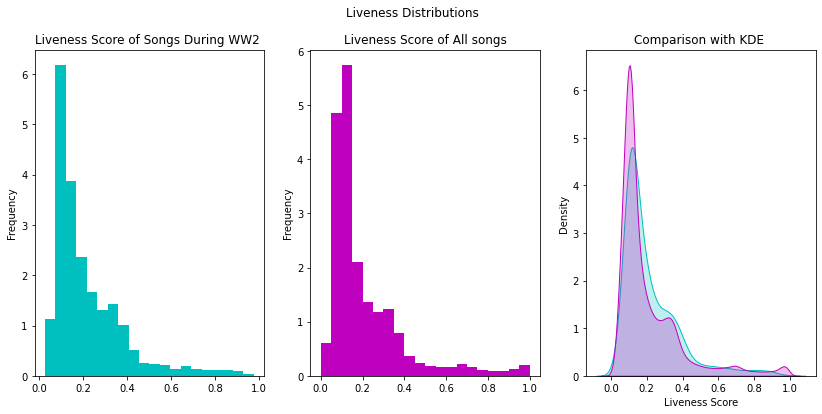

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
                                                                          
        
ww2_years_tracks['liveness'].plot(kind="hist", ax=ax[0], bins=20, label="Liveness", color="c", density=True)
ax[0].set_title("Liveness Score of Songs During WW2 ")

other_years_tracks['liveness'].plot(kind="hist", ax=ax[1], bins=20, label="Liveness", color="m", density=True)
ax[1].set_title("Liveness Score of All songs")

sns.kdeplot(ww2_years_tracks['liveness'], shade=True, label="Liveness During WW2", ax=ax[2], color="c")
sns.kdeplot(other_years_tracks['liveness'], shade=True, label="Liveness During of All songs", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE ")
ax[2].set_xlabel("Liveness Score")

plt.suptitle("Liveness Distributions")
plt.show()

From the figure above, we can see that the songs' liveness durig WW2 years obtained similar distrubition with other years however there exist more songs in other_years data which has less livenness (0.0-0.2) and more liveness score (0.8-1.0)
Now, let's show this difference statistically by applying a significance test.

###### <font color='	#ff0040'> **Statistical testig and Conclusion of Hypothesis for Liveness** 

In [ ]:
meanOfww2_years_tracks= ww2_years_tracks['liveness'].mean()

meanOfother_years_tracks= other_years_tracks['liveness'].mean()
stdOfother_years_tracks= other_years_tracks['liveness'].std()

z_scoreOfLiveness = (meanOfww2_years_tracks - meanOfother_years_tracks )/stdOfother_years_tracks
print("z-score: {}".format(z_scoreOfLiveness))

z-score: 0.06438992012351324


We calculate the z-score as 0.0643 and find out how many standard deviations away our sample mean is.

The liveness of songs during WW2 0.0643 standard deviatians above the mean

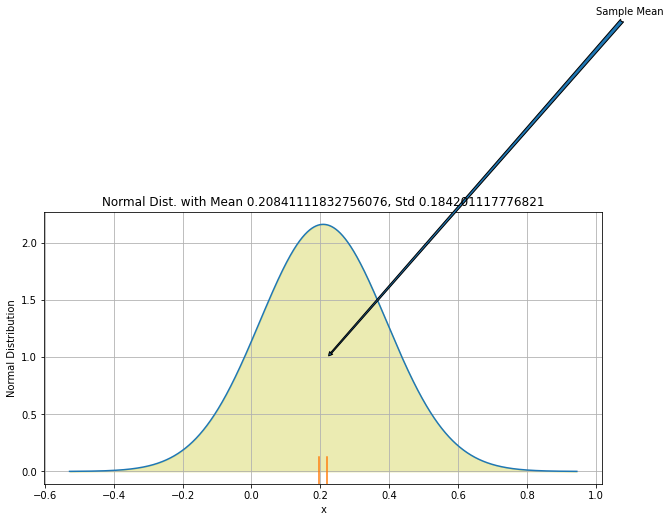

In [ ]:

# mean and std values from the sample
offset = 4*other_years_tracks['liveness'].std()

x = np.linspace(meanOfother_years_tracks - offset, meanOfother_years_tracks + offset, len(other_years_tracks))

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,meanOfother_years_tracks,other_years_tracks['liveness'].std())

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='y')
# display the z-score locations
plt.axvline(meanOfother_years_tracks - z_scoreOfLiveness*other_years_tracks['liveness'].std(), ymax=0.1, color="C1")
plt.axvline(meanOfother_years_tracks + z_scoreOfLiveness*other_years_tracks['liveness'].std(), ymax=0.1, color="C1")
# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(meanOfother_years_tracks + z_scoreOfLiveness*other_years_tracks['liveness'].std(), 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "fancy"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(meanOfother_years_tracks, other_years_tracks['liveness'].std(),".2f"))
plt.show()

In [ ]:
probOfLiveness = stats.norm.cdf(z_scoreOfLiveness)

print(f"Probability: {probOfLiveness}")

Probability: 0.5256701220257554


**Interpreting Results of Liveness:**

If we look at probability value of z score (Probability: 0.5256) from Z table we can see that it greater than the 0.05 (%5) because of that we fail to reject $ H_0$. Therefore, means of liveness samples for all songs are same.

##### <font color='	#00cc00'> **Description of Hypothesis for Danceability** 

In [ ]:
ww2_years_tracks=tracksdf.loc[(tracksdf['year'] >= 1939) & (tracksdf['year'] <= 1945)]
other_years_tracks = tracksdf

First we are partition the dataframe as WW2 years and the all the years to understand difference in this era. As our main dataset is sample these partition olsa points out another sample.

In [ ]:
ww2_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
232,0.967,Francisco Canaro,0.467,158493,0.546,0,02HifoNqdIeUqRiq2cWyYF,0.325,7,0.3730,-7.799,0,Muchachita Porteña - Remasterizado,0,1940-01-24,0.0411,95.759,0.847,1940,"['tango', 'vintage tango']"
233,0.954,Francisco Canaro,0.570,194333,0.275,0,4zAvosNBDBwOUjCCDCOLSt,0.122,1,0.1650,-12.992,0,Soñar y Nada Mas - Remasterizado,24,1944-01-22,0.0636,92.709,0.664,1944,"['tango', 'vintage tango']"
234,0.977,Francisco Canaro,0.544,207693,0.251,0,0gQS6i19fmsT0qIjzC8efa,0.203,7,0.1140,-11.849,1,Uno - Remasterizado,0,1944-01-22,0.0706,125.393,0.400,1944,"['tango', 'vintage tango']"
440,0.960,Francisco Canaro,0.650,219560,0.422,0,1Eh7kEvMweqE52rYa8JFO3,0.801,0,0.0909,-9.611,0,El Rey del Bosque - Instrumental (Remasterizado),0,1939-01-24,0.1130,135.670,0.715,1939,"['tango', 'vintage tango']"
441,0.917,Francisco Canaro,0.591,160187,0.543,0,0M3nhN4qJ9svYLxUZs962b,0.836,7,0.1310,-8.211,1,Pimienta - Instrumental (Remasterizado),0,1940-01-24,0.0608,144.115,0.735,1940,"['tango', 'vintage tango']"


In [ ]:
other_years_tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres
0,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.0264,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,"['blues', 'traditional blues']"
1,0.583000,Screamin' Jay Hawkins,0.744,144360,0.434,0,1YwoYPfhuZlLDbJUH1cKSi,0.0151,5,0.0715,-10.807,0,I Put a Spell on You,44,1999-10-08,0.0845,173.871,0.9390,1999,"['blues', 'traditional blues']"
2,0.639000,Screamin' Jay Hawkins,0.717,145867,0.442,0,7rCchsJktyFH0MB5SIpnbN,0.0233,5,0.1060,-11.594,0,I Put a Spell On You,38,1991-08-13,0.0715,174.060,0.9440,1991,"['blues', 'traditional blues']"
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.8010,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,['circuit']
4,0.000012,Oscar Velazquez,0.568,386287,0.729,0,0TIfXVGqyiOTuWkuxEzQzc,0.9120,2,0.0613,-8.293,1,True House Music - Original Massive Mix,3,1920-01-01,0.0312,129.987,0.1750,1920,['circuit']


In [ ]:
print(f"Mean score of song's energy score during WW2 is {ww2_years_tracks['danceability'].mean():.2f}")
print(f"Mean score of song's energy score of all songs is {other_years_tracks['danceability'].mean():.2f}")

Mean score of song's energy score during WW2 is 0.49
Mean score of song's energy score of all songs is 0.54




**Hypothesis Test:** We want to test whether there is significant differences in terms of song's danceability during WW2. 


**Hyptohesis Question:** Is the average danceability score is more than WW2 average danceability score which is 0.5?

**Population: Whole songs between 1921-2020**

**Parameter of Interest: p (proportion)**

**Null Hypothesis ($H_0$)**: Means of `danceability` samples for all songs are same 

$ H_0: p=0.5$

**Alternative Hypothesis ($H_A$)**: Means of `danceability` samples for all songs are more than 0.5

$ H_A: p>0.5$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. Which mean we are going to interpret hypothesis test p value depend on whether `p<0.05` or `p>0.05` to reject or not reject $ H_0$

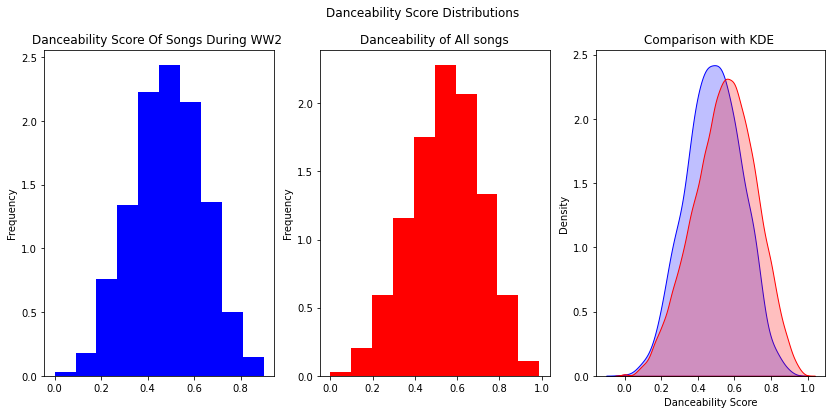

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
ww2_years_tracks['danceability'].plot(kind="hist", ax=ax[0], bins=10, label="Danceability_Score", color="b", density=True)
ax[0].set_title("Danceability Score Of Songs During WW2 ")

other_years_tracks['danceability'].plot(kind="hist", ax=ax[1], bins=10, label="Danceability_Score", color="r", density=True)
ax[1].set_title("Danceability of All songs")

sns.kdeplot(ww2_years_tracks['danceability'], shade=True, label="Danceability Score During WW2", ax=ax[2], color="b")
sns.kdeplot(other_years_tracks['danceability'], shade=True, label="Danceability Score of All songs", ax=ax[2], color="r")
ax[2].set_title("Comparison with KDE ")
ax[2].set_xlabel("Danceability Score")

plt.suptitle("Danceability Score Distributions")
plt.show()

From the figure above, we can see that the songs' danceability score durig WW2 years obtained a bit less than the whole data.
Now, let's show this difference statistically by applying a significance test.

###### <font color='	#ff0040'> **Statistical testig and Conclusion of Hypothesis for Energy** 

In [ ]:
meanOfww2_years_tracksD= ww2_years_tracks['danceability'].mean()

meanOfother_years_tracksD= other_years_tracks['danceability'].mean()
stdOfother_years_tracksD= other_years_tracks['danceability'].std()

z_scoreOfDanceability = (meanOfww2_years_tracksD - meanOfother_years_tracksD )/stdOfother_years_tracksD
print("z-score: {}".format(z_scoreOfDanceability))

z-score: -0.34583695509969165


We calculate the z-score as  -0.3458 and find out how many standard deviations away our sample mean is.

The danceability of songs during WW2 0.3458 standard deviatians below the mean

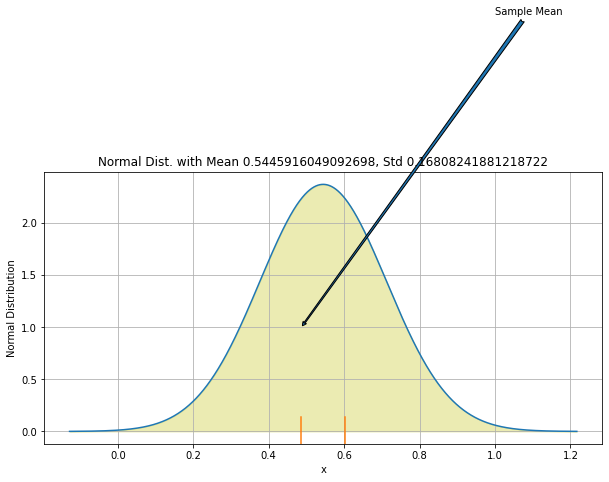

In [ ]:
# mean and std values from the sample
offsetD = 4*other_years_tracks['danceability'].std()

x = np.linspace(meanOfother_years_tracksD - offsetD, meanOfother_years_tracksD + offsetD, len(other_years_tracks))

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,meanOfother_years_tracksD,other_years_tracks['danceability'].std())

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='y')
# display the z-score locations
plt.axvline(meanOfother_years_tracksD - z_scoreOfDanceability*other_years_tracks['danceability'].std(), ymax=0.1, color="C1")
plt.axvline(meanOfother_years_tracksD + z_scoreOfDanceability*other_years_tracks['danceability'].std(), ymax=0.1, color="C1")
# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(meanOfother_years_tracksD + z_scoreOfDanceability*other_years_tracks['danceability'].std(), 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "fancy"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(meanOfother_years_tracksD, other_years_tracks['danceability'].std(),".2f"))
plt.show()

In [ ]:
probOfDanceabilityy= stats.norm.cdf(z_scoreOfDanceability)

print(f"Probability: {probOfDanceabilityy}")

Probability: 0.3647326253448736


**Interpreting Results of Danceability:**

If we look at probability value of z score (Probability: 0.3647) from Z table we can see that it greater than the 0.05 (%5) because of that we fail to reject $ H_0$. Therefore, means of liveness samples for all songs are same.

### <font color='#92A8D1'>How did technological advancements affect accousticness of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Acousticness Mean of 50s Pop Songs 

$\large{μ_2}$: Acousticness Mean of 60s Pop Songs


Null Hypothesis ($\large{H_0}$): Acousticness of pop songs did not change 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Acousticness of pop songs increased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

In [ ]:
AcousticnessMean_50s = popdf_50s['acousticness'].mean()
print("Acousticness Mean of 50s Pop Songs:", AcousticnessMean_50s)
AcousticnessMean_60s = popdf_60s['acousticness'].mean()
print("Acousticness Mean of 60s Pop Songs:", AcousticnessMean_60s)
print("---")

AcousticnessStd_50s = popdf_50s['acousticness'].std()
print("Acousticness Standard Deviation of 50s Pop Songs:", AcousticnessStd_50s)
AcousticnessStd_60s = popdf_60s['acousticness'].std()
print("Acousticness Standard Deviation of 60s Pop Songs:", AcousticnessStd_60s)

Acousticness Mean of 50s Pop Songs: 0.8356064381720443
Acousticness Mean of 60s Pop Songs: 0.5705102398742824
---
Acousticness Standard Deviation of 50s Pop Songs: 0.19880118900765054
Acousticness Standard Deviation of 60s Pop Songs: 0.2791050802524513


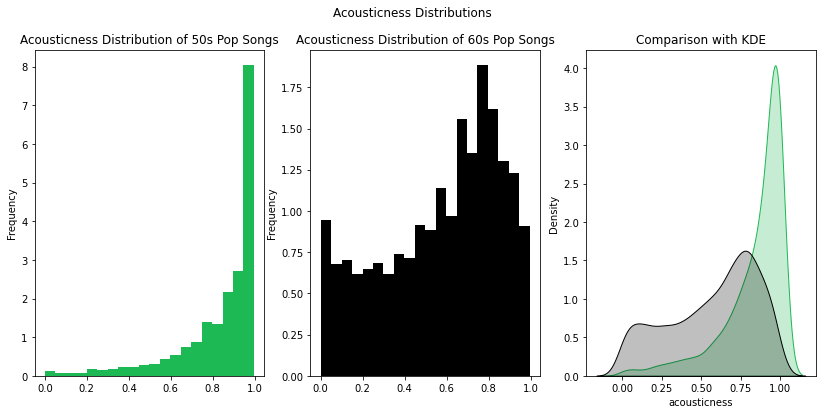

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
popdf_50s['acousticness'].plot(kind="hist", ax=ax[0], bins=20, label="50s", color="#1DB954", density=True)
ax[0].set_title("Acousticness Distribution of 50s Pop Songs")

popdf_60s['acousticness'].plot(kind="hist", ax=ax[1], bins=20, label="60s", color="000000", density=True)
ax[1].set_title("Acousticness Distribution of 60s Pop Songs")

sns.kdeplot(popdf_50s['acousticness'], shade=True, label="50s Acousticness", ax=ax[2], color="#1DB954")
sns.kdeplot(popdf_60s['acousticness'], shade=True, label="60s Acousticness", ax=ax[2], color="000000")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Acousticness Distributions")
plt.show()

From the figure and means above, we can clearly see that 50s Pop songs have a higher Acousticness on avarage compared to 60s Pop songs.

In [ ]:
stats.ttest_ind(popdf_50s['acousticness'], popdf_60s['acousticness'], equal_var = False)

Ttest_indResult(statistic=38.32314783681449, pvalue=2.9447454801970155e-272)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is positive, acousticness mean of 50s pop songs is higher than 60s'.

### <font color='#92A8D1'>How did technological advancements affect energy of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Energy Mean of 50s Pop Songs 

$\large{μ_2}$: Energy Mean of 60s Pop Songs

Null Hypothesis ($\large{H_0}$): Energy of pop songs did not change between 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Energy of pop songs decreased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

In [ ]:
EnergyMean_50s = popdf_50s['energy'].mean()
print("Energy Mean of 50s Pop Songs:", EnergyMean_50s)
EnergyMean_60s = popdf_60s['energy'].mean()
print("Energy Mean of 60s Pop Songs:", EnergyMean_60s)
print("---")

EnergyStd_50s = popdf_50s['energy'].std()
print("Energy Standard Deviation of 50s Pop Songs:", EnergyStd_50s)
EnergyStd_60s = popdf_60s['energy'].std()
print("Energy Standard Deviation of 60s Pop Songs:", EnergyStd_60s)

Energy Mean of 50s Pop Songs: 0.3352053561827962
Energy Mean of 60s Pop Songs: 0.46942724788193374
---
Energy Standard Deviation of 50s Pop Songs: 0.19755881845627493
Energy Standard Deviation of 60s Pop Songs: 0.20742066064625025


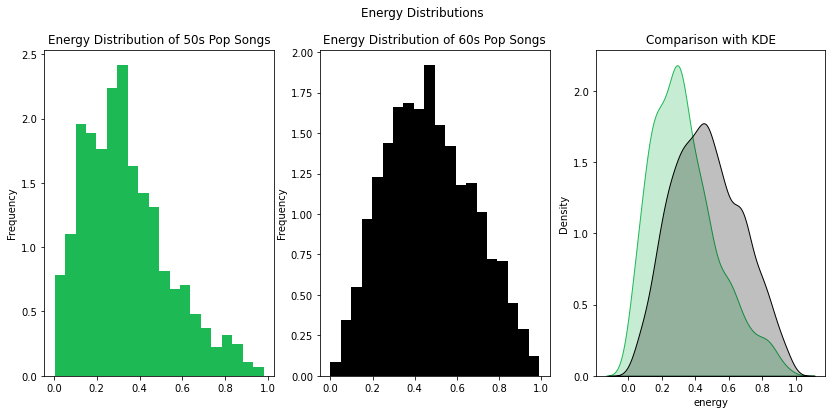

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
popdf_50s['energy'].plot(kind="hist", ax=ax[0], bins=20, label="50s", color="#1DB954", density=True)
ax[0].set_title("Energy Distribution of 50s Pop Songs")

popdf_60s['energy'].plot(kind="hist", ax=ax[1], bins=20, label="60s", color="000000", density=True)
ax[1].set_title("Energy Distribution of 60s Pop Songs")

sns.kdeplot(popdf_50s['energy'], shade=True, label="50s Energy", ax=ax[2], color="#1DB954")
sns.kdeplot(popdf_60s['energy'], shade=True, label="60s Energy", ax=ax[2], color="000000")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
plt.show()

From the figure and means above, we can clearly see that 60s Pop songs have a higher Energy on avarage compared to 50s Pop songs.

In [ ]:
stats.ttest_ind(popdf_50s['energy'], popdf_60s['energy'], equal_var = False)

Ttest_indResult(statistic=-21.777186546275203, pvalue=1.8042232321115885e-97)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is negative, energy mean of 50s pop songs is smaller than 60s'.

### <font color='#92A8D1'>How did technological advancements affect speechiness of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Speechiness Mean of 50s Pop Songs 

$\large{μ_2}$: Speechiness Mean of 60s Pop Songs


Null Hypothesis ($\large{H_0}$): Speechiness of pop songs did not change 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Speechiness of pop songs increased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

In [ ]:
InstrumentalnessMean_50s = popdf_50s['instrumentalness'].mean()
print("Instrumentalness Mean of 50s Pop Songs:", InstrumentalnessMean_50s)
InstrumentalnessMean_60s = popdf_60s['instrumentalness'].mean()
print("Instrumentalness Mean of 60s Pop Songs:", InstrumentalnessMean_60s)
print("---")

InstrumentalnessStd_50s = popdf_50s['instrumentalness'].std()
print("Instrumentalness Standard Deviation of 50s Pop Songs:", InstrumentalnessStd_50s)
InstrumentalnessStd_60s = popdf_60s['instrumentalness'].std()
print("Instrumentalness Standard Deviation of 60s Pop Songs:", InstrumentalnessStd_60s)

Instrumentalness Mean of 50s Pop Songs: 0.16861625849462383
Instrumentalness Mean of 60s Pop Songs: 0.07825291128177106
---
Instrumentalness Standard Deviation of 50s Pop Songs: 0.3094546316258834
Instrumentalness Standard Deviation of 60s Pop Songs: 0.22531848622709347


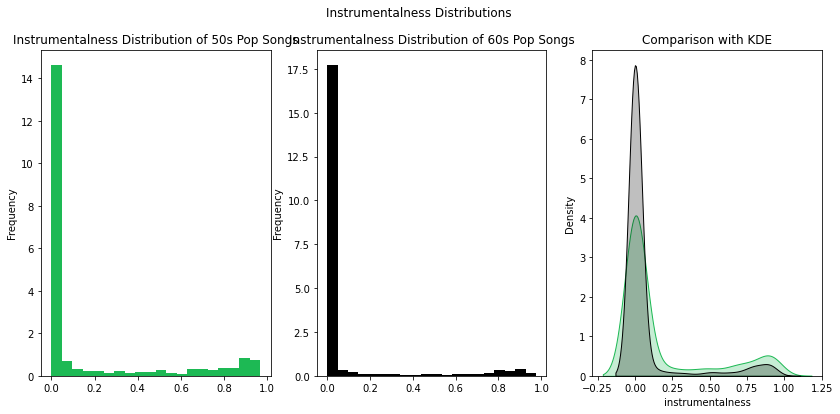

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
popdf_50s['instrumentalness'].plot(kind="hist", ax=ax[0], bins=20, label="50s", color="#1DB954", density=True)
ax[0].set_title("Instrumentalness Distribution of 50s Pop Songs")

popdf_60s['instrumentalness'].plot(kind="hist", ax=ax[1], bins=20, label="60s", color="000000", density=True)
ax[1].set_title("Instrumentalness Distribution of 60s Pop Songs")

sns.kdeplot(popdf_50s['instrumentalness'], shade=True, label="50s Instrumentalness", ax=ax[2], color="#1DB954")
sns.kdeplot(popdf_60s['instrumentalness'], shade=True, label="60s Instrumentalness", ax=ax[2], color="000000")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Instrumentalness Distributions")
plt.show()

From the figure and means above, we can see that 50s Pop songs have a higher instrumentalness on avarage compared to 60s Pop songs.

In [ ]:
stats.ttest_ind(popdf_50s['instrumentalness'], popdf_60s['instrumentalness'], equal_var = False)

Ttest_indResult(statistic=10.216501458200424, pvalue=5.8216872713060226e-24)

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is positive, instrumentalness mean of 50s pop songs is higher than 60s'.

In conclusion, acousticness and instrumentalness of pop songs had decreased while energy had increased 50s to 60s. This change might be the effect of the synthesizers which had started to be used in the 50s as a result of advencing technology. Growing interest in electronic music could cause to a drecrease in acousticness and instrumentalness, but an increase in energy of pop songs.

### <font color='#6600cc'>Which kind of features determine the popularity of the songs?

In [ ]:
df_data = tracksdf
popular_song = df_data.sort_values("popularity", ascending=False).head(100)
middle_song = df_data.sort_values("popularity", ascending=False).iloc[87144:87244]
least_song = df_data.sort_values("popularity", ascending=False).tail(100)

In [ ]:
popular_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.72100,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.21200,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93854,0.28600,"['Robin Schulz', 'KIDDO']",0.504,190218,0.760,1,1FP9s72rDYty6mfoOEYKnE,0.000000,4,0.1510,-4.246,1,All We Got (feat. KIDDO),87,2020-10-16,0.0426,183.933,0.640,2020
19962,0.48700,"['Pop Smoke', 'Lil Tjay']",0.480,213333,0.602,1,5rZlwNFl01HqLWBQGryKSm,0.000000,10,0.0848,-6.335,0,Mood Swings (feat. Lil Tjay),87,2020-07-03,0.3680,179.798,0.269,2020
19960,0.05700,"['DJ Khaled', 'Drake']",0.800,200221,0.560,1,6EDO9iiTtwNv6waLwa1UUq,0.000000,5,0.1340,-4.818,0,POPSTAR (feat. Drake),87,2020-07-17,0.2610,163.071,0.450,2020
19914,0.00473,"['Machine Gun Kelly', 'blackbear']",0.731,139461,0.675,1,7kDUspsoYfLkWnZR7qwHZl,0.000000,5,0.1410,-5.134,0,my ex's best friend (with blackbear),87,2020-09-25,0.0434,124.939,0.298,2020


In [ ]:
middle_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
149465,0.810000,['Bobby Bare'],0.582,178053,0.2870,0,1xJ48q7HyZ9RWsTcYIjgNr,0.002910,7,0.4910,-14.584,1,Ride Me Down Easy,25,1973-03-01,0.0267,77.343,0.8540,1973
149468,0.388000,['Fleetwood Mac'],0.660,304027,0.5540,0,2irAfr7CYn38eIa6gKBu6w,0.446000,5,0.0915,-15.080,0,Somebody,25,1973-10-15,0.0344,121.825,0.8510,1973
64099,0.908000,['Julie London'],0.325,140200,0.0730,0,3cvPT7z9vGwot70G5Li3I5,0.000015,0,0.2360,-17.992,0,If I'm Lucky,25,1958,0.0482,41.962,0.2100,1958
136552,0.995000,['Liz Story'],0.374,142187,0.0679,0,0QxOQaEShpQOLVWdzLTunU,0.949000,0,0.1300,-22.976,1,Have Yourself A Merry Little Christmas,25,1988,0.0454,134.940,0.0623,1988
149489,0.118000,['Al Green'],0.851,191187,0.3690,0,3EE6q1OdyIxeBs8T9aAnSk,0.011500,6,0.1330,-13.339,0,Your Love Is Like the Morning Sun,25,1973,0.0626,94.617,0.7000,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148621,0.522000,['Albert King'],0.476,174040,0.2280,0,6jzzlzLNat6qtz5NGKFQKA,0.000065,6,0.0764,-12.292,1,Won't Be Hangin' Around,25,1969-10-01,0.1130,205.615,0.7290,1969
16879,0.006090,['The Wonder Years'],0.420,179969,0.9230,0,3wNhtNnEkp940yrvv3KUSn,0.000000,11,0.0430,-4.121,1,Won’t Be Pathetic Forever,25,2013-02-12,0.2210,164.117,0.4910,2013
16875,0.000743,['The Wonder Years'],0.481,222664,0.9050,0,6HpJri9Q9YVE8yN3JZdwQu,0.000000,1,0.3490,-3.660,1,You’re not Salinger. Get over It.,25,2013-02-12,0.0622,99.214,0.6000,2013
16869,0.001230,['The Cure'],0.436,401000,0.8810,0,0ZaPSa1mLgKNgK3lUrMBJL,0.509000,7,0.1080,-5.998,1,One Hundred Years - 2005 Remaster,25,1982-05-03,0.0439,132.590,0.2620,1982


In [ ]:
least_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
62950,0.993,"['Geeta Dutt', 'G. M. Durrani', 'Talat Mahmood']",0.816,190537,0.1190,0,0EbZvT52WiN8Qc8ClAcH5j,0.010600,3,0.0952,-9.359,1,Yeh Pyar Ki Baten,0,1952-12-31,0.4770,89.036,0.704,1952
63028,0.991,['Lata Mangeshkar'],0.528,196062,0.1920,0,0Od9e2mSF3zgzJlwMuyB6R,0.000036,1,0.3620,-8.203,1,Khushiyon Ki Baharen Laut Gayi,0,1952-12-31,0.0528,57.388,0.386,1952
63030,0.664,['Unspecified'],0.121,110853,0.4150,0,0OiLDaRftiVLQpbcSgIjTF,0.926000,5,0.1710,-8.468,0,Hebrides Bagpipes,0,1952-01-01,0.0329,80.767,0.056,1952
63143,0.995,"['Ludwig van Beethoven', 'Robert Casadesus']",0.370,350773,0.0161,0,08jGbFv8G1XYzarNdArvbU,0.934000,2,0.0742,-25.823,1,"Piano Sonata No. 2 in A Major, Op. 2, No. 2: I...",0,1953,0.0424,84.093,0.274,1953
63088,0.983,['Shamshad Begum'],0.768,251195,0.3320,0,0WT85ZTVuwEHq7pYUXtqe8,0.002670,4,0.1420,-10.060,1,Chhoti Badi Suiyan Re,0,1952-01-01,0.5470,100.315,0.908,1952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,0.982,['Tarun Banerjee'],0.530,199227,0.2040,0,0UJPWXDSQDfIBtEpZYWlK4,0.004510,11,0.1430,-15.468,0,Phul Nebe Go,0,1952-12-01,0.1080,79.712,0.320,1952
63063,0.994,['Georges Derveaux'],0.209,162623,0.2450,0,0UEEHpJgY8di7fbAn7Z8lr,0.916000,2,0.1280,-15.440,1,Habanera,0,1952-01-01,0.0415,139.475,0.148,1952
63062,0.154,['Эрнест Хемингуэй'],0.800,95700,0.3280,1,0Tyr2WpQlXyPq9VI4Ir7Fw,0.000000,6,0.2670,-17.704,1,Часть 44.3 - Старик и море,0,1952,0.9250,42.490,0.344,1952
63061,0.958,"['Hector Berlioz', 'Concertgebouworkest', 'Edu...",0.276,370787,0.1720,0,0TqGhvkmiAiYg7YZ3CH6mj,0.633000,9,0.0651,-16.904,1,"Symphonie fantastique, Op. 14, H 48: 2. Un bal...",0,1952-01-01,0.0441,89.437,0.164,1952


#### <font color='#6600cc'>What is the effect of the danceability to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of danceability for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of danceability for all songs which have different popularity level are same.

$ H_0: \mu_{d Most Popular Songs} = \mu_{d Middle Popular Songs} = \mu_{d Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of danceability for all songs which have different popularity level are not the same.

$ H_A:$ Means $\mu_{d Most Popular Songs}, \mu_{d Middle Popular Songs}, \mu_{d Least Popular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the danceability of songs of different popularity level because we try to measure three samples simultaneously.

**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.


In [ ]:
print("The mean of danceability of most popular 100 songs is:", popular_song['danceability'].mean())

The mean of danceability of most popular 100 songs is: 0.6956000000000002


In [ ]:
print("The mean of danceability of middle popular 100 songs is:", middle_song['danceability'].mean())

The mean of danceability of middle popular 100 songs is: 0.51406


In [ ]:
print("The mean of danceability of least popular 100 songs is:", least_song['danceability'].mean())

The mean of danceability of least popular 100 songs is: 0.4364800000000001


Text(0.5, 1.0, 'Comparison with KDE')

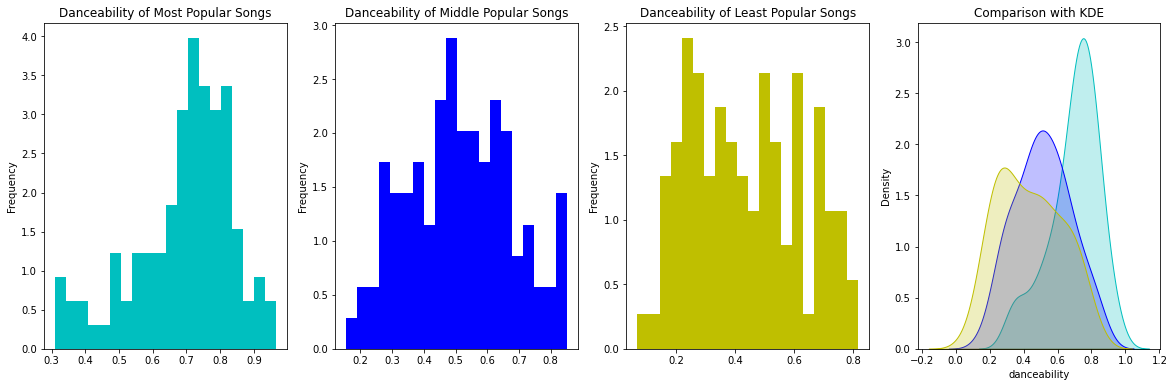

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['danceability'].plot(kind="hist", ax=ax[0], bins = 20, label = "danceability", color = "c", density=True)
ax[0].set_title("Danceability of Most Popular Songs")

middle_song['danceability'].plot(kind="hist", ax=ax[1], bins = 20, label = "danceability", color = "b", density=True)
ax[1].set_title("Danceability of Middle Popular Songs")

least_song['danceability'].plot(kind="hist", ax=ax[2], bins = 20, label = "danceability", color = "y", density=True)
ax[2].set_title("Danceability of Least Popular Songs")

sns.kdeplot(popular_song['danceability'], shade=True, label="danceability", ax=ax[3], color="c")
sns.kdeplot(middle_song['danceability'], shade=True, label="danceability", ax=ax[3], color="b")
sns.kdeplot(least_song['danceability'], shade=True, label="danceability", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")


From the figure above, we can see that the songs which are more popular have higher danceability level compared to the songs which are middle and least popular. 


In [ ]:
f_stats, p_values = f_oneway(popular_song['danceability'].values, middle_song['danceability'].values, least_song['danceability'].values)
print("p-value of the danceability for songs who have different popularity level:", p_values)

p-value of the danceability for songs who have different popularity level: 1.8912026848407807e-23


**Interpreting Results of Danceability:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of danceability of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

#### <font color='#6600cc'>What is the effect of the liveness to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of liveness for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of liveness for all songs which have different popularity level are same.

$ H_0: \mu_{l Most Popular Songs} = \mu_{l Middle Popular Songs} = \mu_{l Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of liveness for all songs which have different popularity level are not the same.


$ H_A:$ Means $\mu_{l Most Popular Songs}, \mu_{l Middle Popular Songs}, \mu_{l LeastPopular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the liveness of songs of different popularity level because we try to measure three samples simultaneously.


**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
print("The mean of liveness of most popular 100 songs is:", popular_song['liveness'].mean())

The mean of liveness of most popular 100 songs is: 0.161967


In [ ]:
print("The mean of liveness of middle popular 100 songs is:", middle_song['liveness'].mean())

The mean of liveness of middle popular 100 songs is: 0.21250099999999997


In [ ]:
print("The mean of liveness of least popular 100 songs is:", least_song['liveness'].mean())

The mean of liveness of least popular 100 songs is: 0.2566660000000001


Text(0.5, 1.0, 'Comparison with KDE')

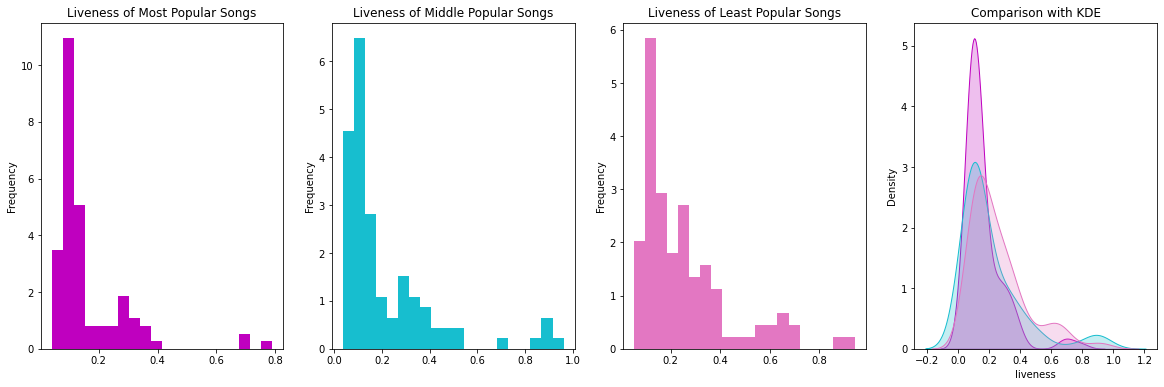

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['liveness'].plot(kind="hist", ax=ax[0], bins = 20, label = "liveness", color = "m", density=True)
ax[0].set_title("Liveness of Most Popular Songs")

middle_song['liveness'].plot(kind="hist", ax=ax[1], bins = 20, label = "liveness", color = "C9", density=True)
ax[1].set_title("Liveness of Middle Popular Songs")

least_song['liveness'].plot(kind="hist", ax=ax[2], bins = 20, label = "liveness", color = "C6", density=True)
ax[2].set_title("Liveness of Least Popular Songs")

sns.kdeplot(popular_song['liveness'], shade=True, label="liveness", ax=ax[3], color="m")
sns.kdeplot(middle_song['liveness'], shade=True, label="liveness", ax=ax[3], color="C9")
sns.kdeplot(least_song['liveness'], shade=True, label="liveness", ax=ax[3], color="C6")
ax[3].set_title("Comparison with KDE")


From the figure above, we can see that there is a little difference between songs which have different popularity level. However, if we try to explain more detail the difference of songs, we can conclude that songs which are least popular have higher liveness level compared to the songs which have most and middle popular.

In [ ]:
f_stats, p_values = f_oneway(popular_song['liveness'].values, middle_song['liveness'].values, least_song['liveness'].values)
print("p-value of the liveness for songs who have different popularity level:", p_values)

p-value of the liveness for songs who have different popularity level: 0.0009062934518433481


**Interpreting Results of Liveness:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of liveness of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

#### <font color='#6600cc'>What is the effect of the acousticness to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of acousticness for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of acousticness for all songs which have different popularity level are same.

$ H_0: \mu_{a Most Popular Songs} = \mu_{a Middle Popular Songs} = \mu_{a Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of acousticness for all songs which have different popularity level are not the same.

$ H_A:$ Means $\mu_{a Most Popular Songs}, \mu_{a Middle Popular Songs}, \mu_{a LeastPopular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the acousticness of songs of different popularity level because we try to measure three samples simultaneously.

**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
print("The mean of acousticness of most popular 100 songs is:", popular_song['acousticness'].mean())

The mean of acousticness of most popular 100 songs is: 0.26586389999999993


In [ ]:
print("The mean of acousticness of middle popular 100 songs is:", middle_song['acousticness'].mean())

The mean of acousticness of middle popular 100 songs is: 0.4185692099999999


In [ ]:
print("The mean of acousticness of least popular 100 songs is:", least_song['acousticness'].mean())

The mean of acousticness of least popular 100 songs is: 0.8838492000000001


Text(0.5, 1.0, 'Comparison with KDE')

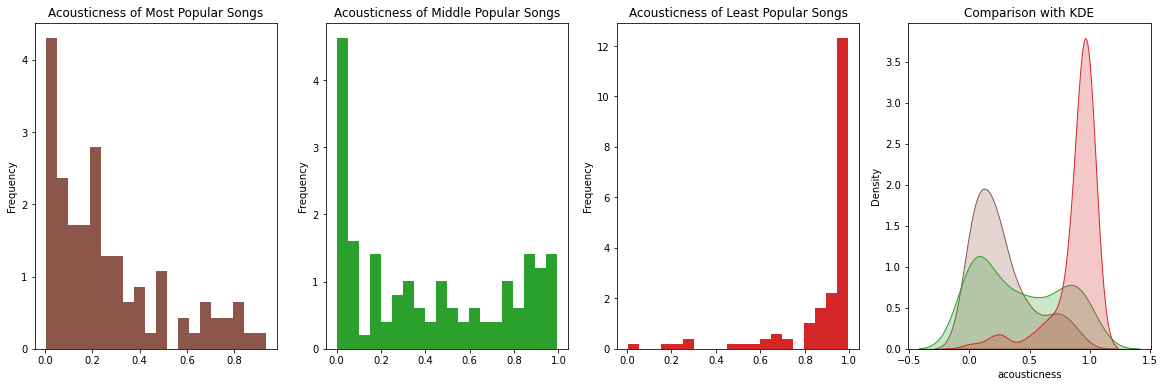

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['acousticness'].plot(kind="hist", ax=ax[0], bins = 20, label = "acousticness", color = "C5", density=True)
ax[0].set_title("Acousticness of Most Popular Songs")

middle_song['acousticness'].plot(kind="hist", ax=ax[1], bins = 20, label = "acousticness", color = "C2", density=True)
ax[1].set_title("Acousticness of Middle Popular Songs")

least_song['acousticness'].plot(kind="hist", ax=ax[2], bins = 20, label = "acousticness", color = "C3", density=True)
ax[2].set_title("Acousticness of Least Popular Songs")

sns.kdeplot(popular_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C5")
sns.kdeplot(middle_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C2")
sns.kdeplot(least_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C3")
ax[3].set_title("Comparison with KDE")

From the figure above, we can see that the songs which are least popular have high acousticness level compared to the songs which are popular and middle popular. 

In [ ]:
f_stats, p_values = f_oneway(popular_song['acousticness'].values, middle_song['acousticness'].values, least_song['acousticness'].values)
print("p-value of the acousticness for songs who have different popularity level:", p_values)

p-value of the acousticness for songs who have different popularity level: 1.3278406668183206e-43


**Interpreting Results of Acousticness:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of acousticness of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

#### <font color='#6600cc'>Is there any difference of the mean of valence between most popular and all songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of valence ofpopularity level of songs. 


**Hyptohesis Question:** Is the average valence level is more than most popular songs average valence score which is 0.50?

*Population: Whole songs between 1921-2020*

*Parameter of Interest: p (proportion)*

**Null Hypothesis ($H_0$):** Means of `valence` samples for all songs which have different popularity level are same.

$ H_0: p=0.50$

**Alternative Hypothesis ($H_A$):** Means of `valence` samples for all songs which have different popularity level are more than 0.50.

$ H_A: p>0.50$

**Significance level:** As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. Which mean we are going to interpret hypothesis test p value depend on whether `p<0.05` or `p>0.05` to reject or not reject $ H_0$

We use z-score to compare the sample of valence of the most popular songs with the sampling distribution mean and tell how significantly distant the means are from each other. 

Thanks to **z-scores**, we can find how many standard deviations away the sample mean (valence of the most popular songs) is from the population mean. To calculate the z-scores, We use the formula below.

$\Large{Z = \frac{\bar{x}_{sample} - \mu_{sampling \, dist.}}{\sigma_{sampling \, dist.}}}$

In [ ]:
df_data['valence'].mean()

0.5245326904454883

In [ ]:
df_data['valence'].std()

0.264476797859951

In [ ]:
popular_song['valence'].mean()

0.5060370000000001

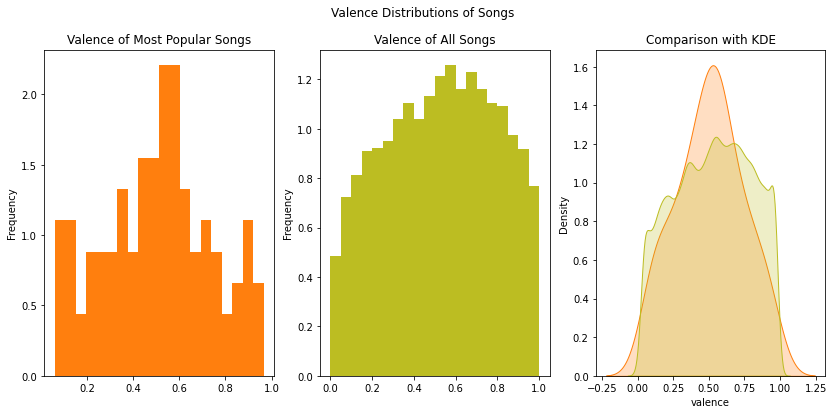

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
        
popular_song['valence'].plot(kind="hist", ax=ax[0], bins=20, label="valence", color="C1", density=True)
ax[0].set_title("Valence of Most Popular Songs")

df_data['valence'].plot(kind="hist", ax=ax[1], bins=20, label="valence", color="C8", density=True)
ax[1].set_title("Valence of All Songs")

sns.kdeplot(popular_song['valence'], shade=True, label="valence", ax=ax[2], color="C1")
sns.kdeplot(df_data['valence'], shade=True, label="valence", ax=ax[2], color="C8")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Valence Distributions of Songs")
plt.show()

In [ ]:
meanOfPopularSongV = popular_song['valence'].mean()

meanOfSamplingV= df_data['valence'].mean()
stdOfSamplingV= df_data['valence'].std()

z_scoreOfValence = (meanOfPopularSongV - meanOfSamplingV )/stdOfSamplingV
print("z-score of valence of the most popular song: {}".format(z_scoreOfValence))

z-score of valence of the most popular song: -0.06993313060029686


We calculate the z-score as -0.069 and find out how many standard deviations away our sample mean is.

The most popular songs 0.069 standard deviatians below the mean.

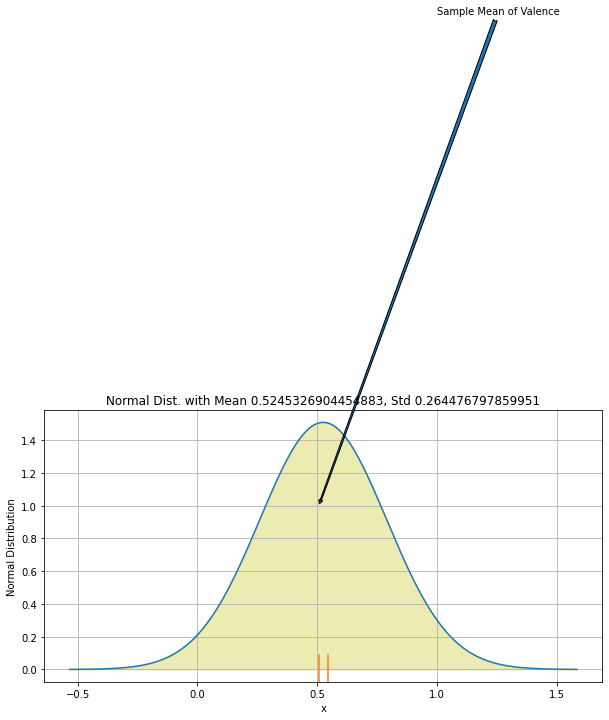

In [ ]:
offset = 4*df_data['valence'].std()

x = np.linspace(meanOfSamplingV - offset, meanOfSamplingV + offset, len(df_data))

y = stats.norm.pdf(x,meanOfSamplingV,df_data['valence'].std())

plt.figure(figsize=(10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='y')

plt.axvline(meanOfSamplingV - z_scoreOfValence*df_data['valence'].std(), ymax=0.1, color="C1")
plt.axvline(meanOfSamplingV + z_scoreOfValence*df_data['valence'].std(), ymax=0.1, color="C1")

plt.annotate(
    "Sample Mean of Valence", # annotation text
    xy=(meanOfSamplingV + z_scoreOfValence*df_data['valence'].std(), 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "fancy"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(meanOfSamplingV, df_data['valence'].std(),".2f"))
plt.show()

In [ ]:
probOfValence = stats.norm.cdf(z_scoreOfValence)
print(f"probability of valence of most popular songs: {probOfValence}")

probability of valence of most popular songs: 0.47212344163382236


**Interpreting Results of Valence:**

If we look at probability value of z score (probability: 0.47) from Z table we can see that it greater than the 0.05 (%5) because of that we fail to reject $ H_0$. Therefore, means of valence samples for all songs which have different popularity level are same.

#### <font color='#6600cc'>Is there any difference of the mean of energy between least popular and all songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of energy of popularity level of songs. 


**Hyptohesis Question:** Is the average energy level is more than least popular songs average energy score which is 0.60?

*Population: Whole songs between 1921-2020*

*Parameter of Interest: p (proportion)*

**Null Hypothesis ($H_0$):** Means of `energy` samples for all songs which have different popularity level are same.

$ H_0: p=0.60$

**Alternative Hypothesis ($H_A$):** Means of `energy` samples for all songs which have different popularity level are more than 0.60.

$ H_A: p>0.60$

**Significance level:** As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. Which mean we are going to interpret hypothesis test p value depend on whether `p<0.05` or `p>0.05` to reject or not reject $ H_0$

We use z-score to compare the sample of energy of the least popular songs with the sampling distribution mean and tell how significantly distant the means are from each other. 

Thanks to **z-scores**, we can find how many standard deviations away the sample mean (energy of the least popular songs) is from the mean of all songs. To calculate the z-scores, We use the formula below.

In [ ]:
df_data['energy'].mean()

0.4827208433255605

In [ ]:
df_data['energy'].std()

0.2726854798927745

In [ ]:
least_song['energy'].mean()

0.24877520000000003

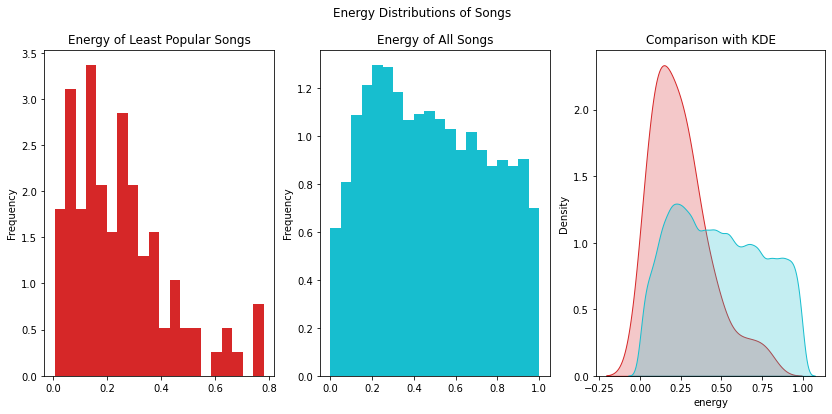

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
        
least_song['energy'].plot(kind="hist", ax=ax[0], bins=20, label="energy", color="C3", density=True)
ax[0].set_title("Energy of Least Popular Songs")

df_data['energy'].plot(kind="hist", ax=ax[1], bins=20, label="energy", color="C9", density=True)
ax[1].set_title("Energy of All Songs")

sns.kdeplot(least_song['energy'], shade=True, label="energy", ax=ax[2], color="C3")
sns.kdeplot(df_data['energy'], shade=True, label="energy", ax=ax[2], color="C9")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions of Songs")
plt.show()

In [ ]:
meanOfLeastSongE = least_song['energy'].mean()

meanOfSamplingE= df_data['energy'].mean()
stdOfSamplingE= df_data['energy'].std()

z_scoreofEnergy = (meanOfLeastSongE- meanOfSamplingE )/stdOfSamplingE
print("z-score of energy of least popular songs: {}".format(z_scoreofEnergy))

z-score of energy of least popular songs: -0.8579321620555399


We calculate the z-score as -0.85 and find out how many standard deviations away our sample mean is.

The least popular songs 0.85 standard deviatians above the mean.

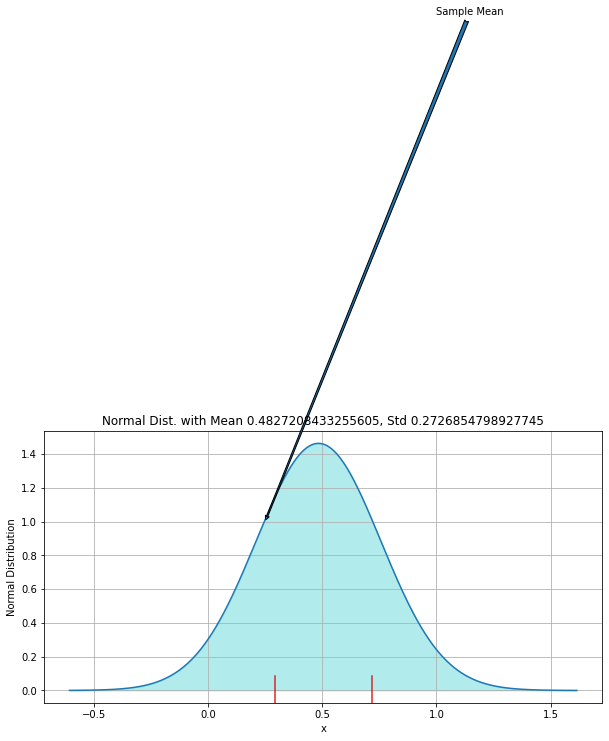

In [ ]:
# mean and std values from the sample
offset = 4*df_data['energy'].std()

x = np.linspace(meanOfSamplingE - offset, meanOfSamplingV + offset, len(df_data))

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,meanOfSamplingE,df_data['energy'].std())

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='c')
# display the z-score locations
plt.axvline(meanOfSamplingE - z_scoreofEnergy*df_data['energy'].std(), ymax=0.1, color="C3")
plt.axvline(meanOfSamplingV + z_scoreofEnergy*df_data['energy'].std(), ymax=0.1, color="C3")
# annotate the sample mean
plt.annotate(
    "Sample Mean", # annotation text
    xy=(meanOfSamplingE + z_scoreofEnergy*df_data['energy'].std(), 1), # annotated coordinate
    xytext=(1, 4), # annotation text coordinate
    arrowprops={"arrowstyle": "fancy"}) # arrow style
plt.title('Normal Dist. with Mean {}, Std {}'.format(meanOfSamplingE, df_data['energy'].std()))
plt.show()

In [ ]:
probOfEnergy = stats.norm.cdf(z_scoreofEnergy)
print(f"probability of energy level of least popular songs: {probOfEnergy}")

probability of energy level of least popular songs: 0.19546496178356237


**Interpreting Results of Energy:**

If we look at probability value of z score (0.19) from Z table we can see that it greater than the 0.05 (%5) because of that we fail to reject $ H_0$. Therefore, means of energy samples for all songs which have different popularity level are same.

## <font color="#ff9900"> Machine Learning

### <font color="#0099ff"> Prediction of song popularity with various machine learning models

#### <font color="#cc0099"> Preprocessing Dataset for Linear Regression Model

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
df_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [ ]:
X = df_data.drop(['popularity', "artists","id", "name", "genres", "release_date"], axis=1)
y = df_data['popularity']

In [ ]:
X.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990,1920


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [ ]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size= 0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

First of all, we dropped the some features which have not numerical values.
We splitted out data as test, train and validation to check whether it has over-fitting and under-fitting.
We measured the errors and we used metrics to be as minimum as possible for a good performing model.


#### <font color="#1aff1a"> Linear Regression Model

First of all, we used the Linear Regression Model for the examining popularity of the songs. Thanks to Linear Regression, we thought that some features such as acousticness, danceability, duration_ms, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence, year. 
Especially, at the hypothesis testing part, we found that acousticnes, danceability and liveness have effect on the popularity of the songs. 
Therefore, we also tried to understand the prediction of popularity of the songs looking at the another features. For this aim, we use linear regression.

In [ ]:
print(X)

[[ 1.29435782  0.34791933 -0.4344949  ...  1.08975345  0.41390256
  -2.12063451]
 [ 0.37841108  1.79089823 -0.55668873 ... -0.99548519  1.60871779
  -2.12063451]
 [ 1.29962188  0.62628927 -0.46485973 ... -0.64145043  0.62186091
  -2.12063451]
 ...
 [ 0.80743211  0.76263374 -0.09881057 ... -0.29577817  0.71638743
   1.5957499 ]
 [ 1.10748363 -0.4246993   0.07540645 ...  1.79521175 -0.77335055
   1.63291374]
 [-0.6849294   0.79671985 -0.2365305  ... -0.15860664  0.84116244
   1.5957499 ]]


In [ ]:
y.head(1000)

0      12
1       7
2       4
3      17
4       2
       ..
995     0
996     2
997     2
998     0
999     2
Name: popularity, Length: 1000, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
#train the model on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict the test set results
y_predict = ml.predict(X_test)
print(y_predict)

[ 0.44549793 13.45907951  6.85967726 ... 34.0509496  34.3404431
 40.74210492]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [ ]:
#evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.36640067108490937

Then, we calculated the coefficient $R^2$ as using $R^2$ function which takes y_pred and y_true to evaluate our models score.

Text(0.5, 1.0, 'Actual vs. Predicted')

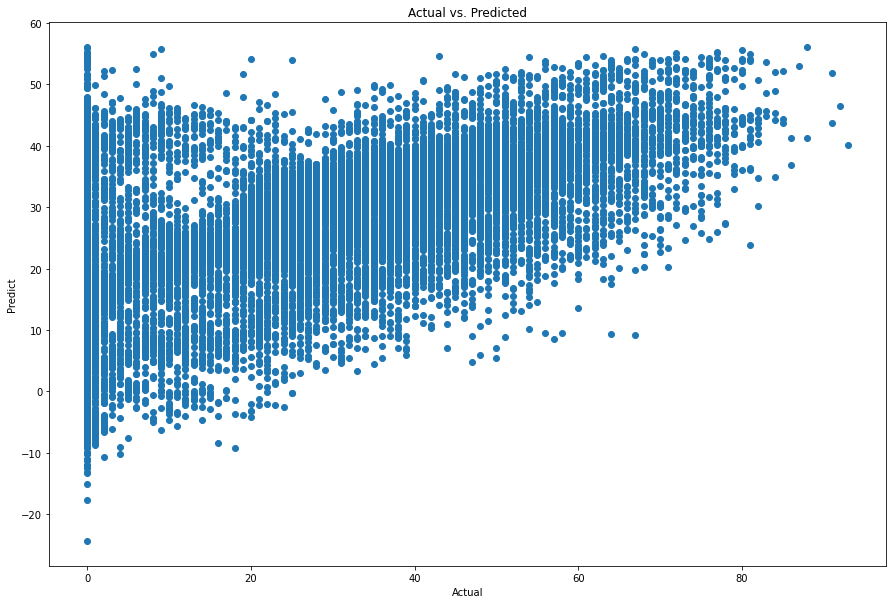

In [ ]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Actual vs. Predicted')


In [ ]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted value": y_predict, "Difference": y_test-y_predict})
pred_y_df.head(3000)

,Actual Value,Predicted value,Difference
159173,0,0.445498,-0.445498
2280,23,13.459080,9.540920
82187,14,6.859677,7.140323
93495,0,26.809975,-26.809975
118695,25,23.486125,1.513875
...,...,...,...
4717,14,-2.511492,16.511492
68912,34,31.215550,2.784450
159185,0,11.474403,-11.474403
138679,33,40.677451,-7.677451


As a result, we found that the score of the regression model is 0.36.

#### <font color="#9999ff"> Preprocessing Dataset for rest of the Machine Learning Models

In [ ]:
tracksRFdf = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])

In [ ]:
cat_tracks = tracksRFdf.select_dtypes('O').columns
cat_tracks = np.append(cat_tracks, ['explicit', 'key', 'mode'])

In [ ]:
tracksRFdf.select_dtypes(exclude='O').columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [ ]:
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year']

In [ ]:
x = tracksRFdf.drop('popularity', axis=1)
y = tracksRFdf['popularity']

In [ ]:
x.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990,1920


In [ ]:
y.head()

0    12
1     7
2     4
3    17
4     2
Name: popularity, dtype: int64

In [ ]:
y.value_counts(normalize=True)

0      0.234562
1      0.022054
33     0.016165
34     0.015999
36     0.015964
         ...   
94     0.000029
93     0.000011
96     0.000011
95     0.000011
100    0.000006
Name: popularity, Length: 98, dtype: float64

In [ ]:
# 80% for training and 20% for testing-validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
ohe = OneHotEncoder(sparse = False)
x_train_cat = ohe.fit_transform(x_train[['explicit', 'key', 'mode']])
x_train[:5]

x_test_cat = ohe.fit_transform(x_test[['explicit', 'key', 'mode']])

In [ ]:
ss = StandardScaler()
x_train_num = ss.fit_transform(x_train[num_cols])
x_train_num[:5]

x_test_num = ss.fit_transform(x_test[num_cols])

In [ ]:
x_train_out = pd.DataFrame(np.concatenate([x_train_cat, x_train_num, x_train[['explicit', 'key', 'mode']]], axis=1))
x_test_out = pd.DataFrame(np.concatenate([x_test_cat, x_test_num, x_test[['explicit', 'key', 'mode']]], axis=1))
x_train_out = x_train_out.iloc[:round(len(tracksRFdf)/2)] #we devided the training dataframe into two since processing the whole dataframe takes so much time
y_train = y_train.iloc[:round(len(tracksRFdf)/2)]

In [ ]:
x_train_out.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.319579,0.358541,-0.415272,-0.095155,-0.564530,-0.717642,-0.214729,-0.377822,1.613595,0.992538,-0.189200,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.980893,0.233533,0.164975,-0.905948,-0.589467,-0.849246,-0.709552,-0.136760,0.256519,0.205578,-0.747015,0.0,5.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.312237,-0.431282,-0.713207,1.390687,-0.589360,-0.333888,1.100519,-0.324986,2.319731,1.329266,-0.003262,0.0,9.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.207292,0.585828,-0.221881,-1.155423,-0.589467,-0.306241,0.184401,-0.330490,0.413000,-0.392208,-1.044517,0.0,3.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.225719,-2.164347,0.111226,-0.781211,-0.332323,-0.013172,-0.453433,-0.383876,-1.059030,-1.375908,1.335495,0.0,2.0,1.0


#### <font color="#9999ff"> Random Forest Model

In [ ]:
rfr_params = {
    'n_estimators' : range(0,10),
    'max_depth' : range(0,10)
}

In [ ]:
rfr_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rfr_params, cv=3)

In [ ]:
rfr_gs.fit(x_train_out, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
print(rfr_gs.best_params_)
print(rfr_gs.best_score_)
print(rfr_gs.best_index_)

{'max_depth': 9, 'n_estimators': 9}
0.6229426805546222
99


In [ ]:
print("AFTER tuning Training w/bin set score: {:.4f}". format(rfr_gs.score(x_train_out, y_train))) 
print("AFTER tuning Test w/bin set score: {:.4f}". format(rfr_gs.score(x_test_out, y_test)))

AFTER tuning Training w/bin set score: 0.6488
AFTER tuning Test w/bin set score: 0.6238


The highest accuracy prediction is with the parametres 'max_depth' = 9, and 'n_estimators' = 9.

In [ ]:
pd.DataFrame(rfr_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011510,0.000899,0.000000,0.000000,0,0,"{'max_depth': 0, 'n_estimators': 0}",NaN,NaN,NaN,NaN,NaN,100
1,0.012845,0.000022,0.000000,0.000000,0,1,"{'max_depth': 0, 'n_estimators': 1}",NaN,NaN,NaN,NaN,NaN,87
2,0.013674,0.000718,0.000000,0.000000,0,2,"{'max_depth': 0, 'n_estimators': 2}",NaN,NaN,NaN,NaN,NaN,86
3,0.013393,0.000224,0.000000,0.000000,0,3,"{'max_depth': 0, 'n_estimators': 3}",NaN,NaN,NaN,NaN,NaN,85
4,0.015934,0.001068,0.000000,0.000000,0,4,"{'max_depth': 0, 'n_estimators': 4}",NaN,NaN,NaN,NaN,NaN,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.777069,0.009234,0.015707,0.000763,9,5,"{'max_depth': 9, 'n_estimators': 5}",0.621519,0.618379,0.618615,0.619504,0.001428,5
96,2.120695,0.001690,0.016942,0.000536,9,6,"{'max_depth': 9, 'n_estimators': 6}",0.624187,0.618914,0.619845,0.620982,0.002298,4
97,2.457409,0.019782,0.019425,0.000838,9,7,"{'max_depth': 9, 'n_estimators': 7}",0.625044,0.621619,0.620247,0.622303,0.002017,3
98,2.825764,0.020160,0.020998,0.000388,9,8,"{'max_depth': 9, 'n_estimators': 8}",0.626198,0.621897,0.620521,0.622872,0.002418,2


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = rfr_gs.predict(x_test_out)
print("Predicted labels: \n", y_pred)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE (mean squared error):  {}".format(mse))
print("MAE (mean absolute error): {}".format(mae))
print("RMSE (root mean squared error):  {}".format(rmse))

Predicted labels: 
 [41.47454742 38.71893607  0.7690986  ... 36.00978727  1.33468653
 49.22845574]
MSE (mean squared error):  180.42570222066206
MAE (mean absolute error): 9.026547775221577
RMSE (root mean squared error):  13.432263480912741


#### <font color="#ff0000"> Decision Tree Model

In [ ]:
dtr_params = {
    "max_depth": range(1,10),
    "min_samples_split": range(1,5),
    "min_samples_leaf":range(1,5)
}

In [ ]:
dtr_gs = GridSearchCV(DecisionTreeRegressor(random_state=42), dtr_params, verbose=1, cv=3)

In [ ]:
dtr_gs.fit(x_train_out, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             pre_dispatch='2*n_j

In [ ]:
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)
print(dtr_gs.best_index_)

{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.5149799225801338
137


In [ ]:
print("AFTER tuning Training w/bin set score: {:.4f}". format(dtr_gs.score(x_train_out, y_train))) 
print("AFTER tuning Test w/bin set score: {:.4f}". format(dtr_gs.score(x_test_out, y_test)))

AFTER tuning Training w/bin set score: 0.5576
AFTER tuning Test w/bin set score: 0.4908


The highest accuracy prediction is with the parametres 'max_depth' = 9,'min_samples_leaf' = 3, and 'min_samples_split' = 2.

In [ ]:
pd.DataFrame(dtr_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012044,0.001080,0.000000,0.000000,1,1,1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,144
1,0.071472,0.002349,0.003773,0.000057,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.285935,0.282768,0.288210,0.285638,0.002231,97
2,0.073260,0.003300,0.003846,0.000027,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.285935,0.282768,0.288210,0.285638,0.002231,97
3,0.074041,0.003378,0.003956,0.000320,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.285935,0.282768,0.288210,0.285638,0.002231,97
4,0.012328,0.002045,0.000000,0.000000,1,2,1,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",NaN,NaN,NaN,NaN,NaN,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.481511,0.003586,0.005412,0.000147,9,3,4,"{'max_depth': 9, 'min_samples_leaf': 3, 'min_s...",0.510379,0.512409,0.522152,0.514980,0.005139,1
140,0.010452,0.000128,0.000000,0.000000,9,4,1,"{'max_depth': 9, 'min_samples_leaf': 4, 'min_s...",NaN,NaN,NaN,NaN,NaN,110
141,0.473196,0.003245,0.005307,0.000028,9,4,2,"{'max_depth': 9, 'min_samples_leaf': 4, 'min_s...",0.510668,0.512842,0.519809,0.514439,0.003899,4
142,0.478909,0.003690,0.005301,0.000051,9,4,3,"{'max_depth': 9, 'min_samples_leaf': 4, 'min_s...",0.510668,0.512842,0.519809,0.514439,0.003899,4


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = dtr_gs.predict(x_test_out)
# print the predicted labels
print("Predicted labels are:", y_pred) 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE (mean squared error):  {}".format(mse))
print("MAE (mean absolute error): {}".format(mae))
print("RMSE (root mean squared error):  {}".format(rmse))

Predicted labels are: [44.05676504 37.43485994 34.55453906 ... 37.44644751  0.93210907
 50.03797468]
MSE (mean squared error):  211.9650606044683
MAE (mean absolute error): 10.294587431025104
RMSE (root mean squared error):  14.559019905353118


#### <font color=black> K-Nearest Neighbors Model 

In [ ]:
knn_params = {
    "n_neighbors": range(2, 19)
}

In [ ]:
knn_gs = GridSearchCV(KNeighborsRegressor(), param_grid = knn_params)

In [ ]:
knn_gs.fit(x_train_out, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(2, 19)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(knn_gs.best_params_)
print(knn_gs.best_score_)
print(knn_gs.best_index_)

{'n_neighbors': 17}
0.5046015014815
15


In [ ]:
print("AFTER tuning Training w/bin set score: {:.4f}". format(knn_gs.score(x_train_out, y_train))) 
print("AFTER tuning Test w/bin set score: {:.4f}". format(knn_gs.score(x_test_out, y_test)))

AFTER tuning Training w/bin set score: 0.5672
AFTER tuning Test w/bin set score: 0.5134


The highest accuracy prediction is with the parametres 'n_neighbors' = 17.

In [ ]:
pd.DataFrame(knn_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.405837,0.011725,11.832918,0.303239,2,{'n_neighbors': 2},0.380664,0.377331,0.367088,0.379171,0.365515,0.373954,0.006356,17
1,0.409997,0.004929,13.758658,0.521447,3,{'n_neighbors': 3},0.433019,0.439444,0.422003,0.436199,0.423366,0.430806,0.006949,16
2,0.409564,0.010061,14.725305,0.691103,4,{'n_neighbors': 4},0.459196,0.468758,0.451535,0.461392,0.452747,0.458726,0.006252,15
3,0.395585,0.007148,15.261299,0.182310,5,{'n_neighbors': 5},0.474562,0.484122,0.467190,0.476414,0.467987,0.474055,0.006182,14
4,0.396352,0.009442,16.431266,0.675126,6,{'n_neighbors': 6},0.482188,0.493522,0.474381,0.486293,0.480457,0.483368,0.006361,13
5,0.394599,0.013630,16.978675,0.721252,7,{'n_neighbors': 7},0.489480,0.499947,0.479440,0.494052,0.488912,0.490366,0.006748,12
6,0.377580,0.003671,17.128929,0.228896,8,{'n_neighbors': 8},0.496121,0.506048,0.484903,0.498105,0.493339,0.495703,0.006859,11
7,0.399220,0.008416,19.073717,0.752375,9,{'n_neighbors': 9},0.498323,0.506432,0.489189,0.500367,0.495563,0.497975,0.005663,10
8,0.389538,0.005878,18.345091,0.237372,10,{'n_neighbors': 10},0.499026,0.507961,0.492752,0.502115,0.497254,0.499821,0.005074,9
9,0.397201,0.007121,19.034875,0.421082,11,{'n_neighbors': 11},0.501410,0.509086,0.494020,0.503476,0.499883,0.501575,0.004899,8


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = knn_gs.predict(x_test_out)
print("Predicted labels: \n", y_pred)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE (mean squared error):  {}".format(mse))
print("MAE (mean absolute error): {}".format(mae))
print("RMSE (root mean squared error):  {}".format(rmse))


Predicted labels: 
 [36.05882353 39.52941176 11.35294118 ... 37.35294118  3.64705882
 36.29411765]
MSE (mean squared error):  233.38630720905357
MAE (mean absolute error): 11.083816530224682
RMSE (root mean squared error):  15.276986195223637


#### <font color=yellow> Effects of Hyper-parameter tuning with Grid Search

When we are applying our ML models with the help of grid search we try different range of values and compare ML model's score to choose optimum one (Hyper-parameter tuning). In our case best score is done by Linear Regression model that why we should apply that for our ML model.

### <font color="#336699"> Song Recommendation System

In [ ]:
def euclidean_distance(row1, row2): # finds the euclidean distance between two points
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return math.sqrt(distance)

In [ ]:
def get_neighbors(train, test_row, num_neighbors): # finds the nearest neighbors to the given point in the data frame
	distances = list()
	for i in range(len(train)):
		dist = euclidean_distance(test_row, train.iloc[i])
		distances.append((train.iloc[i], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
x = input("Please enter the row numbers seperated by a comma (','): " ) # take the index of the wanted songs in the data frame

s = x.split(",")
songs = []

for ss in s:
  songs.append(ss.strip())
# wanted songs appended to the songs list seperately
wantedSongs = [] # a list to save all songs that are in the data frame for sure
                 # later we will suggest a song based on the mean of all features in this list

for song in songs:
  song = int(song)
  if len(tracksdf) > song: # if song is not out of bounds
    track = tracksdf.iloc[song] 
    songIndex = track.name # save the song index to the wanted songs
    wantedSongs.append(songIndex)
    tracksdf_genreFilter = tracksdf[tracksdf['genres'].apply(lambda x: tracksdf.iloc[songIndex]['genres'] in x)] # filter out the songs that are not in the same genre as the wanted song

    if len(tracksdf_genreFilter) > 1: # if there is other songs in the same genre
      newTracksdf = tracksdf_genreFilter.drop(columns=['artists', 'id', 'name', 'genres', 'release_date']) # drop the categorical columns from both data frames
      newTracksdf_song = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2) # find the closest 2 neighbors of the wanted songs, the firs one is the songs itself the second song
                                                                                  # is the first closest song to the wanted song
      print("Recommended song based on '" + track['artists'] + " - " + track['name'] + "' is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
        # print out the which song is reccommended according to which song
    else: # if there is no any other songs in the same genre
      print("There is not another song in the same genre, recommendation will not take genre account.")
      newTracksdf = tracksdf_genreFilter.drop(columns=['artists', 'id', 'name', 'genres', 'release_date']) # drop the categorical columns from both data frames
      newTracksdf_song = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2) # find the closest 2 neighbors of the wanted songs, the firs one is the songs itself the second song
                                                                                  # is the first closest song to the wanted song      
      print("Recommended song based on '" + track['artists'] + " - " + track['name'] + "' is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
        # print out the which song is reccommended according to which song
  else: # ifsong is out of bounds
    print("There is not such song in the data frame.")

featureSums = { # a library which saves the sum of all features in wanted songs list
    'acousticness': 0.0,
    'danceability': 0.0,
    'duration_ms': 0.0,
    'energy': 0.0,
    'instrumentalness': 0.0,
    'liveness': 0.0,
    'loudness': 0.0,
    'popularity': 0.0,
    'speechiness': 0.0,
    'tempo': 0.0,
    'valence': 0.0,
    'year': 0.
}

newTracksdf = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date', 'key']) # drop the categorical columns from the data frame

explicitCount = 0
modeCount = 0

for wantedSong in wantedSongs: # for every song in wanted songs
                               # sum its feature with the same feature in the featureSums library
  featureSums['acousticness'] += newTracksdf.iloc[wantedSong]['acousticness']
  featureSums['danceability'] += newTracksdf.iloc[wantedSong]['danceability']
  featureSums['duration_ms'] += newTracksdf.iloc[wantedSong]['duration_ms']
  featureSums['energy'] += newTracksdf.iloc[wantedSong]['energy']
  featureSums['instrumentalness'] += newTracksdf.iloc[wantedSong]['instrumentalness']
  featureSums['liveness'] += newTracksdf.iloc[wantedSong]['liveness']
  featureSums['loudness'] += newTracksdf.iloc[wantedSong]['loudness']
  featureSums['popularity'] += newTracksdf.iloc[wantedSong]['popularity']
  featureSums['speechiness'] += newTracksdf.iloc[wantedSong]['speechiness']
  featureSums['tempo'] += newTracksdf.iloc[wantedSong]['tempo']
  featureSums['valence'] += newTracksdf.iloc[wantedSong]['valence']
  featureSums['year'] += newTracksdf.iloc[wantedSong]['year']
  explicitCount += newTracksdf.iloc[wantedSong]['explicit']
  modeCount += newTracksdf.iloc[wantedSong]['mode']

newRow = { # a library which will save the mean of every feature as a row
    'acousticness': 0,
    'danceability': 0,
    'duration_ms': 0,
    'energy': 0,
    'explicit': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'loudness': 0,
    'mode': 0,
    'popularity': 0,
    'speechiness': 0,
    'tempo': 0,
    'valence': 0,
    'year': 0
}

if (explicitCount/len(wantedSongs)) > 1/2: # if explicit content occurence is more than half,
  newRow['explicit'] = 1; # newRow will also be explicit

if (modeCount/len(wantedSongs)) > 1/2: # if mode occurence is more than half,
  newRow['mode'] = 1 # newRow's mode will be 1

# save all means to the newRow
newRow['acousticness'] = featureSums['acousticness']/len(wantedSongs)
newRow['danceability'] = featureSums['danceability']/len(wantedSongs)
newRow['duration_ms'] = featureSums['duration_ms']/len(wantedSongs)
newRow['energy'] = featureSums['energy']/len(wantedSongs)
newRow['instrumentalness'] = featureSums['instrumentalness']/len(wantedSongs)
newRow['liveness'] = featureSums['liveness']/len(wantedSongs)
newRow['loudness'] = featureSums['loudness']/len(wantedSongs)
newRow['popularity'] = featureSums['popularity']/len(wantedSongs)
newRow['speechiness'] = featureSums['speechiness']/len(wantedSongs)
newRow['tempo'] = featureSums['tempo']/len(wantedSongs)
newRow['valence'] = featureSums['valence']/len(wantedSongs)
newRow['year'] = featureSums['year']/len(wantedSongs)

newRowData = {
    'acousticness': [newRow['acousticness']],
    'danceability': [newRow['danceability']],
    'duration_ms': [newRow['duration_ms']],
    'energy': [newRow['energy']],
    'explicit': [newRow['explicit']],
    'instrumentalness': [newRow['instrumentalness']],
    'liveness': [newRow['liveness']],
    'loudness': [newRow['loudness']],
    'mode': [newRow['mode']],
    'popularity': [newRow['popularity']],
    'speechiness': [newRow['speechiness']],
    'tempo': [newRow['tempo']],
    'valence': [newRow['valence']],
    'year': [newRow['year']]
}
# turn newRaw into a data frame
songdf = pd.DataFrame(newRowData)

neighbors = get_neighbors(newTracksdf, songdf.iloc[0], 2) # get the closest neighbor to the mean of all songs
print("Recommended song based on the mean of all songs is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
# print out the which song is reccommended according to mean

Please enter the row numbers seperated by a comma (','): 60449, 60349, 60249, 50349
Recommended song based on 'Billie Eilish - Six Feet Under' is 'Ellise - 911'.
Recommended song based on '6LACK - Luving U' is '6LACK - PRBLMS'.
Recommended song based on 'Post Malone - Circles' is 'Post Malone - Takin' Shots'.
Recommended song based on 'Hanson - Little Saint Nick' is 'Hanson - What Christmas Means To Me'.
Recommended song based on the mean of all songs is 'Selena Gomez - Kill Em With Kindness'.
